In [13]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# 定義股票代號和下載期間
stock_symbol = 'MSFT'
start_date = '2019-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

# 下載 Microsoft 股票數據
data = yf.download(stock_symbol, start=start_date, end=end_date)

# 檢查數據的基本結構
print("Data Head:")
print(data.head())


[*********************100%***********************]  1 of 1 completed

Data Head:
Price       Adj Close       Close        High         Low        Open  \
Ticker           MSFT        MSFT        MSFT        MSFT        MSFT   
Date                                                                    
2019-01-02  95.310524  101.120003  101.750000   98.940002   99.550003   
2019-01-03  91.804260   97.400002  100.190002   97.199997  100.099998   
2019-01-04  96.073997  101.930000  102.510002   98.930000   99.720001   
2019-01-07  96.196541  102.059998  103.269997  100.980003  101.639999   
2019-01-08  96.894028  102.800003  103.970001  101.709999  103.040001   

Price         Volume  
Ticker          MSFT  
Date                  
2019-01-02  35329300  
2019-01-03  42579100  
2019-01-04  44060600  
2019-01-07  35656100  
2019-01-08  31514400  


In [14]:
# 添加 'Year' 欄位，用於後續的年度統計分析
data['Year'] = data.index.year

# 檢查添加 'Year' 後的數據
print("Data with 'Year' column:")
print(data[['Close', 'Year']].head())


Data with 'Year' column:
Price            Close  Year
Ticker            MSFT      
Date                        
2019-01-02  101.120003  2019
2019-01-03   97.400002  2019
2019-01-04  101.930000  2019
2019-01-07  102.059998  2019
2019-01-08  102.800003  2019


In [15]:
# 計算每年收盤價的平均值、中位數和標準差
mean_values = data.groupby('Year')['Close'].mean().round(2)
median_values = data.groupby('Year')['Close'].median().round(2)
std_values = data.groupby('Year')['Close'].std().round(2)

# 檢查計算結果
print("Mean values per year:")
print(mean_values)
print("\nMedian values per year:")
print(median_values)
print("\nStandard deviation per year:")
print(std_values)


Mean values per year:
Price    Close
Ticker    MSFT
Year          
2019    130.38
2020    193.03
2021    275.94
2022    268.92
2023    313.95
2024    419.55

Median values per year:
Price    Close
Ticker    MSFT
Year          
2019    135.22
2020    201.91
2021    277.17
2022    265.90
2023    324.65
2024    417.88

Standard deviation per year:
Price   Close
Ticker   MSFT
Year         
2019    14.90
2020    23.00
2021    36.94
2022    25.76
2023    40.98
2024    17.67


In [16]:
# 確保 mean_values, median_values 和 std_values 都為 1 維的 Series
mean_values = mean_values.squeeze()
median_values = median_values.squeeze()
std_values = std_values.squeeze()

# 將計算出的年度統計數據合併為一個 DataFrame
yearly_stats = pd.DataFrame({
    'mean': mean_values,
    'median': median_values,
    'std': std_values
})

# 檢查 yearly_stats 的內容以確保正確性
print("Yearly Statistics (Mean, Median, Standard Deviation):")
print(yearly_stats)


Yearly Statistics (Mean, Median, Standard Deviation):
        mean  median    std
Year                       
2019  130.38  135.22  14.90
2020  193.03  201.91  23.00
2021  275.94  277.17  36.94
2022  268.92  265.90  25.76
2023  313.95  324.65  40.98
2024  419.55  417.88  17.67


In [17]:

# Save the fetched data to a CSV file
data.to_csv('microsoft_stock_data.csv')


In [18]:
import matplotlib.pyplot as plt

# 繪製每日收盤價
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.title(f'Daily Closing Prices of {stock_symbol} (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


In [19]:

# Add a 'Year' column to the DataFrame
data['Year'] = data.index.year

# Group by 'Year' and calculate the mean closing price
yearly_means = data.groupby('Year')['Close'].mean()
print("Yearly Mean Closing Prices:")
print(yearly_means)


Yearly Mean Closing Prices:
Price        Close
Ticker        MSFT
Year              
2019    130.382024
2020    193.026126
2021    275.940754
2022    268.917091
2023    313.951001
2024    419.552199


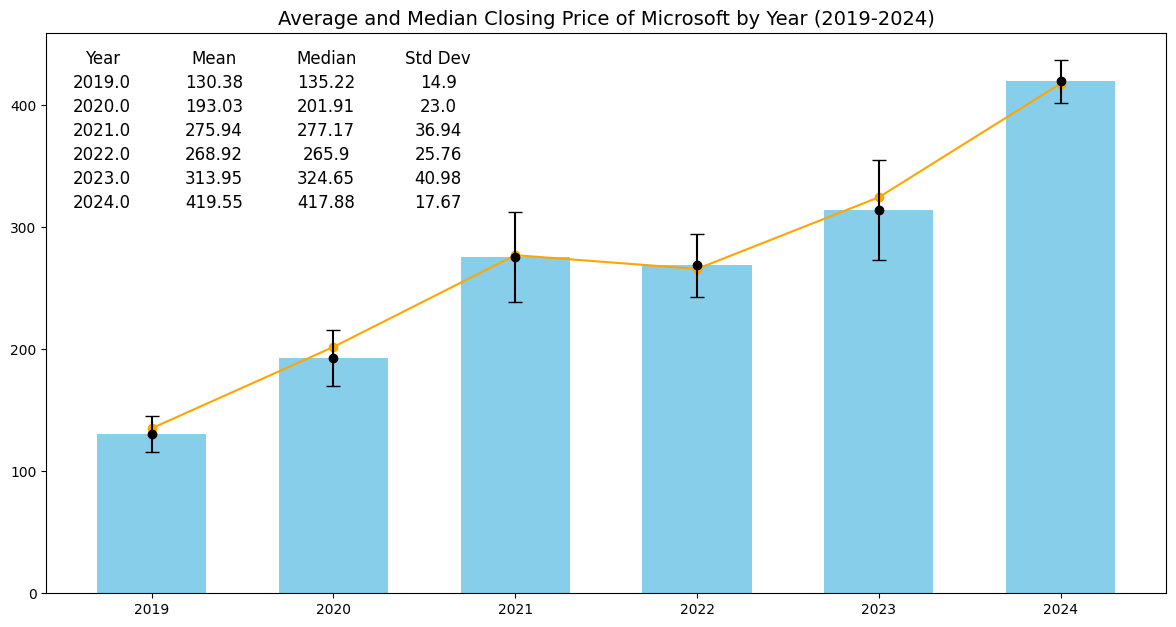

In [20]:
# 添加數據摘要表格
table_data = yearly_stats.reset_index()
table_data.columns = ['Year', 'Mean', 'Median', 'Std Dev']
table_values = table_data.values

# 繪製圖表
fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(yearly_stats.index, yearly_stats['mean'], color='skyblue', label='Average Closing Price', width=0.6)
ax.plot(yearly_stats.index, yearly_stats['median'], color='orange', marker='o', linestyle='-', label='Median Closing Price')
ax.errorbar(yearly_stats.index, yearly_stats['mean'], yerr=yearly_stats['std'], fmt='o', color='black', capsize=5, label='Standard Deviation')

# 添加表格到左上角，並移除格線，並向上位移 17.5%
table = plt.table(cellText=table_values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='upper left',
                  bbox=[0, 0.675, 0.4, 0.3])  # 調整表格位置和大小，以便向上位移
table.auto_set_font_size(False)
table.set_fontsize(12)  # 放大表格字體

# 移除表格的邊框和格線
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)

# 設置標題和調整佈局
ax.set_title('Average and Median Closing Price of Microsoft by Year (2019-2024)', fontsize=14)
plt.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.1)
plt.show()


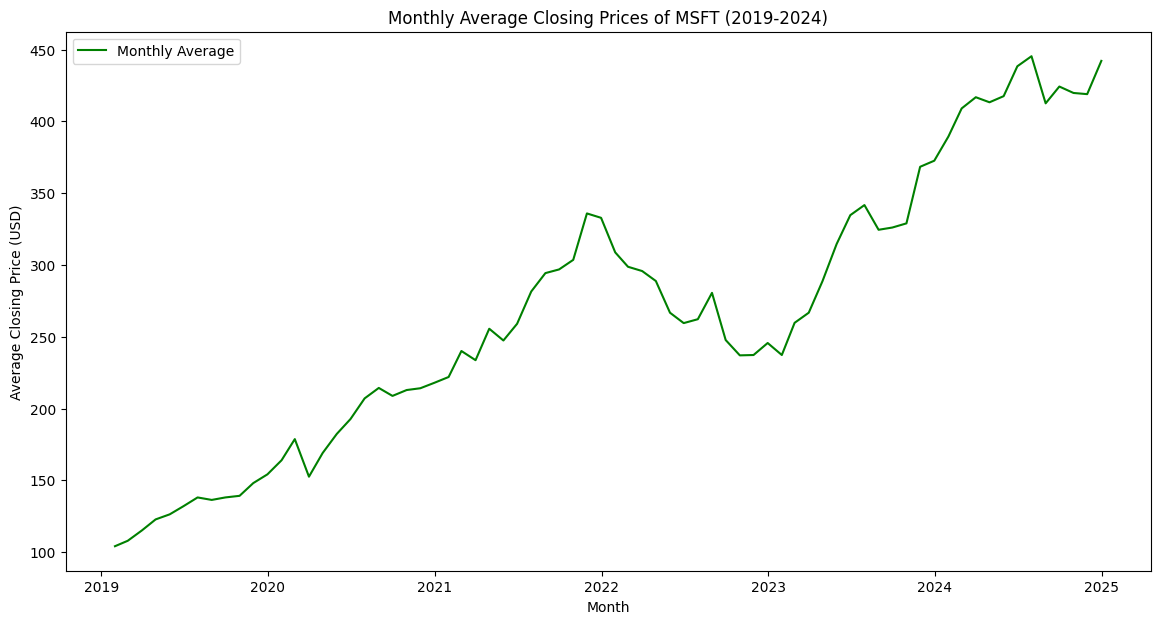

In [21]:

# Resample to monthly frequency using 'ME' for monthly end
monthly_data = data['Close'].resample('ME').mean()

# Plot monthly mean closing prices
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data, label='Monthly Average', color='green')
plt.title(f'Monthly Average Closing Prices of {stock_symbol} (2019-2024)')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed

Daily Return Data Head:
Date
2019-01-02         NaN
2019-01-03   -0.036788
2019-01-04    0.046509
2019-01-07    0.001275
2019-01-08    0.007251
2019-01-09    0.014300
2019-01-10   -0.006426
2019-01-11   -0.007722
2019-01-14   -0.007296
2019-01-15    0.029005
Name: Daily Return, dtype: float64


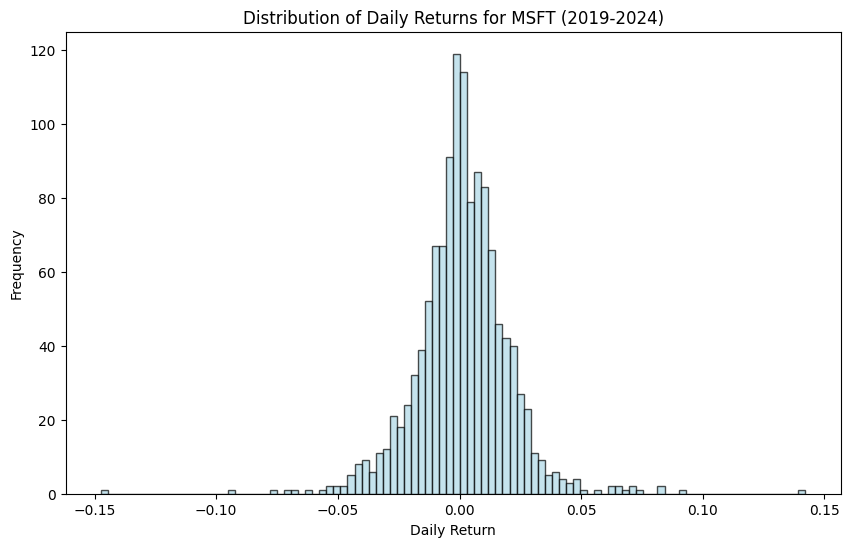

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

# 獲取 MSFT 股票數據
data = yf.download('MSFT', start='2019-01-01', end='2024-01-01')

# 計算每日回報率
data['Daily Return'] = data['Close'].pct_change()

# 檢查 Daily Return 列中是否有有效數據
print("Daily Return Data Head:")
print(data['Daily Return'].head(10))  # 顯示前10行以檢查是否有數據

# 繪製每日回報率的分佈圖，並設置邊界線為黑色
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Return'].dropna(), bins=100, alpha=0.7, color='lightblue', edgecolor='black')  # 設置邊界線為黑色
plt.title('Distribution of Daily Returns for MSFT (2019-2024)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


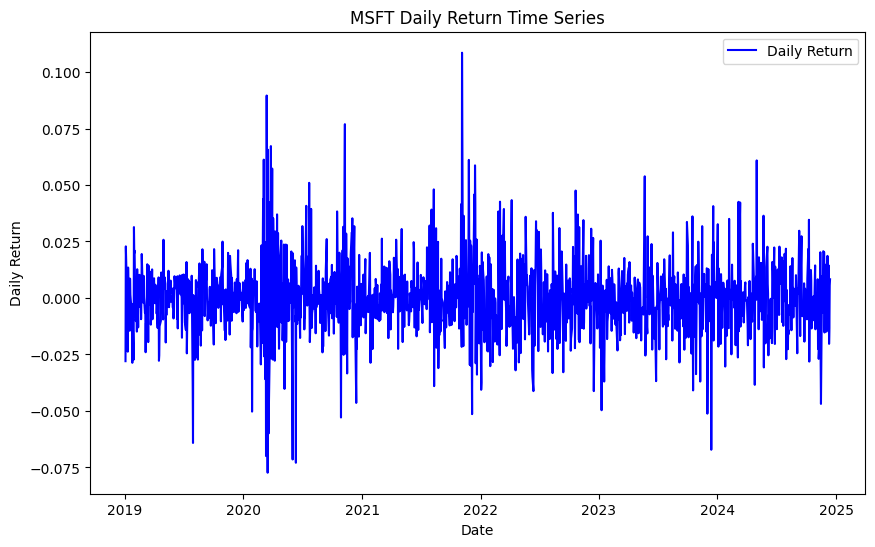

In [38]:
# 繪製每日回報率時間序列
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Daily Return'], label='Daily Return', color='blue')
plt.title('MSFT Daily Return Time Series')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


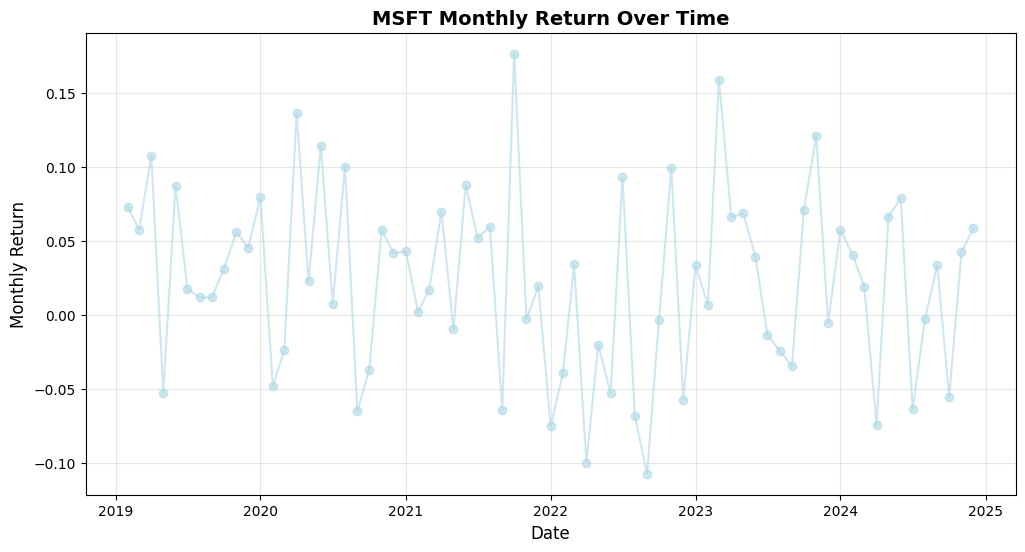

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 下載 MSFT 的歷史數據 (5 年)
msft_data = yf.download("MSFT", start="2019-01-01", end="2024-12-31", interval="1mo")

# 計算 Monthly Return
msft_data['Monthly Return'] = msft_data['Adj Close'].pct_change()

# 繪製圖表
plt.figure(figsize=(12, 6))
plt.plot(msft_data.index, msft_data['Monthly Return'], marker='o', color='lightblue', alpha=0.6)
plt.title("MSFT Monthly Return Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Return", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


[*********************100%***********************]  1 of 1 completed


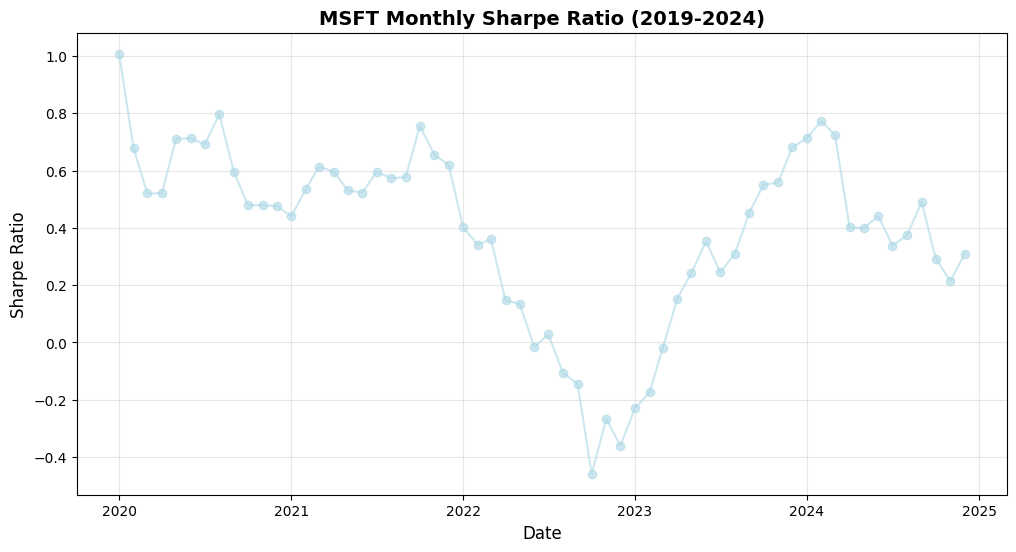

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 下載 MSFT 的歷史數據 (5 年)
msft_data = yf.download("MSFT", start="2019-01-01", end="2024-12-31", interval="1mo")

# 計算 Monthly Return
msft_data['Monthly Return'] = msft_data['Adj Close'].pct_change()

# 計算 Monthly Sharpe Ratio (假設無風險利率為 0)
rolling_mean = msft_data['Monthly Return'].rolling(window=12).mean()
rolling_std = msft_data['Monthly Return'].rolling(window=12).std()
msft_data['Sharpe Ratio'] = rolling_mean / rolling_std

# 繪製圖表
plt.figure(figsize=(12, 6))
plt.plot(msft_data.index, msft_data['Sharpe Ratio'], marker='o', color='lightblue', alpha=0.6)
plt.title("MSFT Monthly Sharpe Ratio (2019-2024)", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sharpe Ratio", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


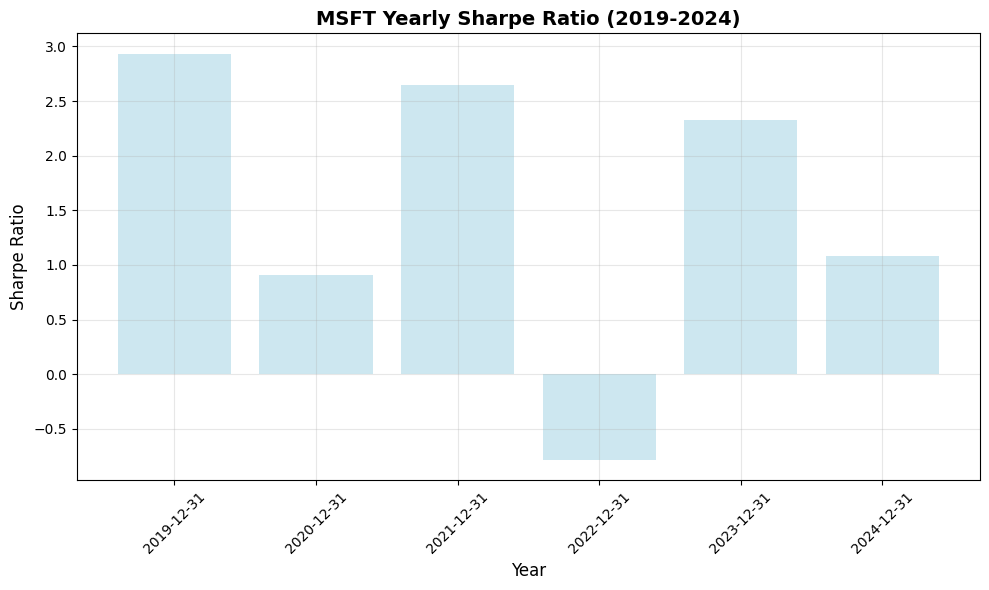

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch Microsoft (MSFT) data from January 1, 2019 to the current date
msft = yf.Ticker("MSFT")
msft_data = msft.history(start="2019-01-01", end="2024-12-31")

# Calculate daily returns
msft_data['Daily Return'] = msft_data['Close'].pct_change()

# Resample to yearly frequency and calculate yearly return (using 'YE' for year-end)
msft_yearly_return = (msft_data['Close'].resample('YE').last() / msft_data['Close'].resample('YE').first()) - 1

# Calculate yearly standard deviation of daily returns (annualized)
msft_yearly_std = msft_data['Daily Return'].resample('YE').std() * (252 ** 0.5)  # Annualizing daily std

# Sharpe ratio for each year, assuming risk-free rate = 0
sharpe_ratio_per_year = msft_yearly_return / msft_yearly_std

# Drop NaN values (if any)
sharpe_ratio_per_year = sharpe_ratio_per_year.dropna()

# Formatting x-axis with date including month and day
sharpe_ratio_per_year.index = sharpe_ratio_per_year.index.strftime('%Y-%m-%d')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(sharpe_ratio_per_year.index, sharpe_ratio_per_year, color='lightblue', alpha=0.6)
plt.title("MSFT Yearly Sharpe Ratio (2019-2024)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sharpe Ratio", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()


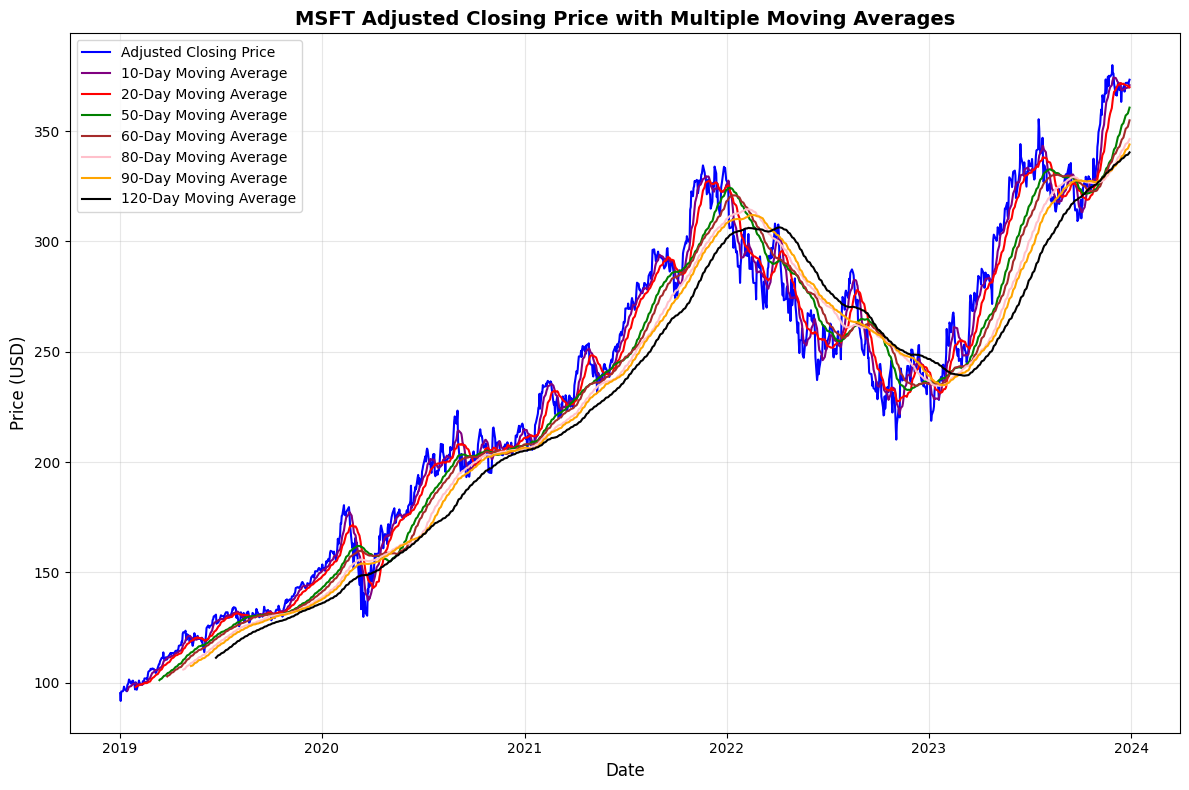

In [27]:

# Calculate moving averages for specified windows
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['MA20'] = data['Adj Close'].rolling(window=20).mean()
data['MA50'] = data['Adj Close'].rolling(window=50).mean()
data['MA60'] = data['Adj Close'].rolling(window=60).mean()
data['MA80'] = data['Adj Close'].rolling(window=80).mean()
data['MA90'] = data['Adj Close'].rolling(window=90).mean()
data['MA120'] = data['Adj Close'].rolling(window=120).mean()

# Plot Adjusted Closing Price with Moving Averages
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Adj Close'], label='Adjusted Closing Price', color='blue', linewidth=1.5)
plt.plot(data.index, data['MA10'], label='10-Day Moving Average', color='purple')
plt.plot(data.index, data['MA20'], label='20-Day Moving Average', color='red')
plt.plot(data.index, data['MA50'], label='50-Day Moving Average', color='green')
plt.plot(data.index, data['MA60'], label='60-Day Moving Average', color='brown')
plt.plot(data.index, data['MA80'], label='80-Day Moving Average', color='pink')
plt.plot(data.index, data['MA90'], label='90-Day Moving Average', color='orange')
plt.plot(data.index, data['MA120'], label='120-Day Moving Average', color='black')

# Customize the plot
plt.title('MSFT Adjusted Closing Price with Multiple Moving Averages', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

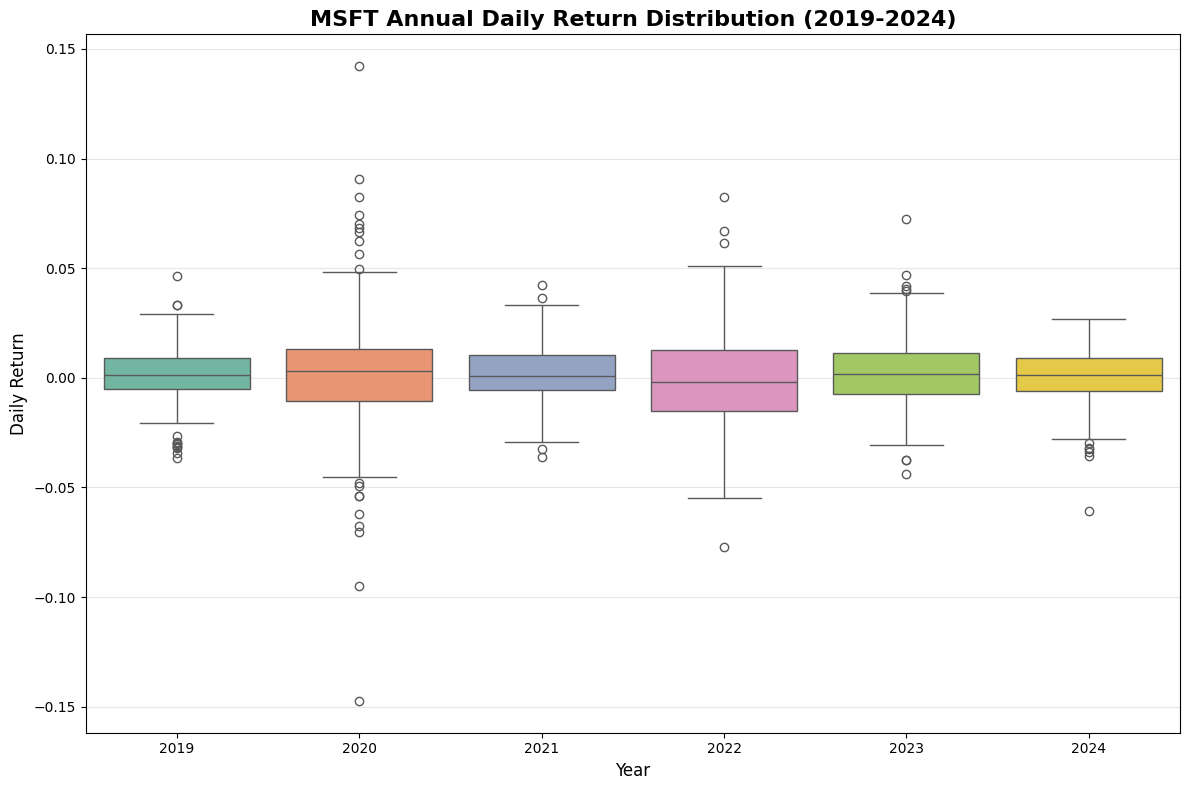

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch Microsoft (MSFT) data from the past five years
msft = yf.Ticker("MSFT")
data = msft.history(start="2019-01-01", end="2024-12-31")

# Calculate daily returns
data['Daily Return'] = data['Close'].pct_change()

# Add a "Year" column for grouping
data['Year'] = data.index.year

# Remove rows with NaN values (first return will be NaN)
data.dropna(subset=['Daily Return'], inplace=True)

# Plotting the distribution of daily returns for each year
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Daily Return', data=data, hue='Year', palette="Set2", dodge=False, legend=False)

# Customize the plot
plt.title('MSFT Annual Daily Return Distribution (2019-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


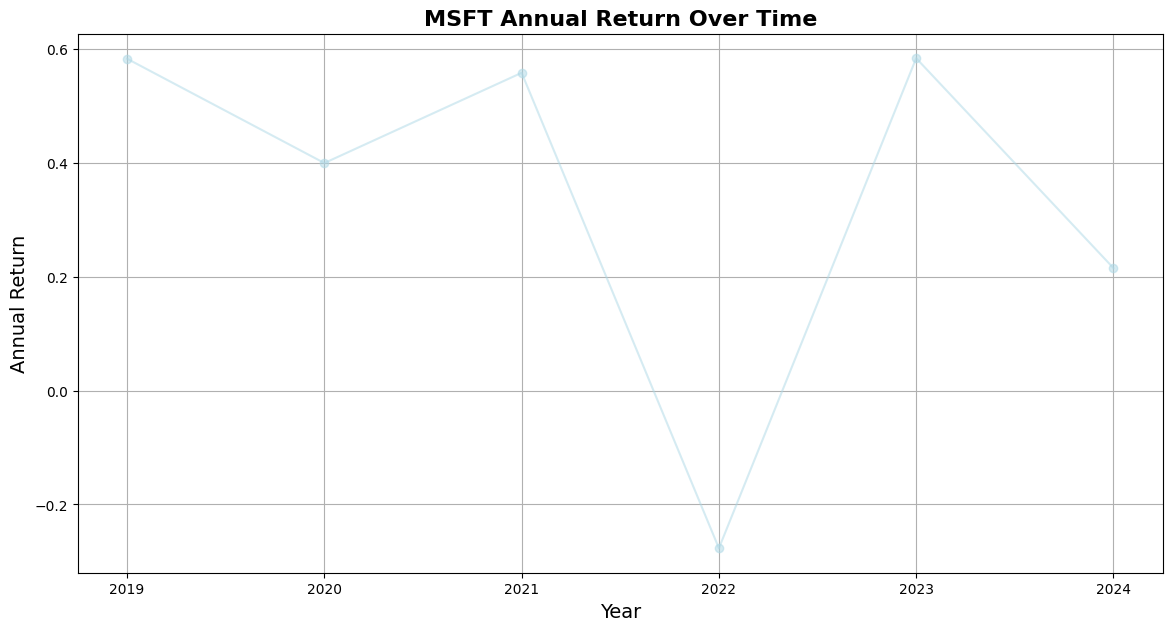

In [29]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download MSFT stock data from 2019-01-01 to 2024-12-31
msft = yf.Ticker("MSFT")
data_custom_range = msft.history(start="2019-01-01", end="2024-12-31")

# Calculate Annual Return Over Time
annual_returns = []
years = range(2019, 2025)

for year in years:
    year_data = data_custom_range[data_custom_range.index.year == year]
    if not year_data.empty:
        # Accessing values by position using iloc to avoid the FutureWarning
        initial_price = year_data['Close'].iloc[0]
        final_price = year_data['Close'].iloc[-1]
        annual_return = (final_price / initial_price) - 1
        annual_returns.append(annual_return)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(years, annual_returns, marker='o', linestyle='-', color='lightblue', alpha=0.5)
plt.title("MSFT Annual Return Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Annual Return", fontsize=14)
plt.grid(True)

# Save the plot as an image in the current directory
plt.savefig('Annual_Return_Over_Time_MSFT.png')

# Show the plot
plt.show()


[*********************100%***********************]  1 of 1 completed


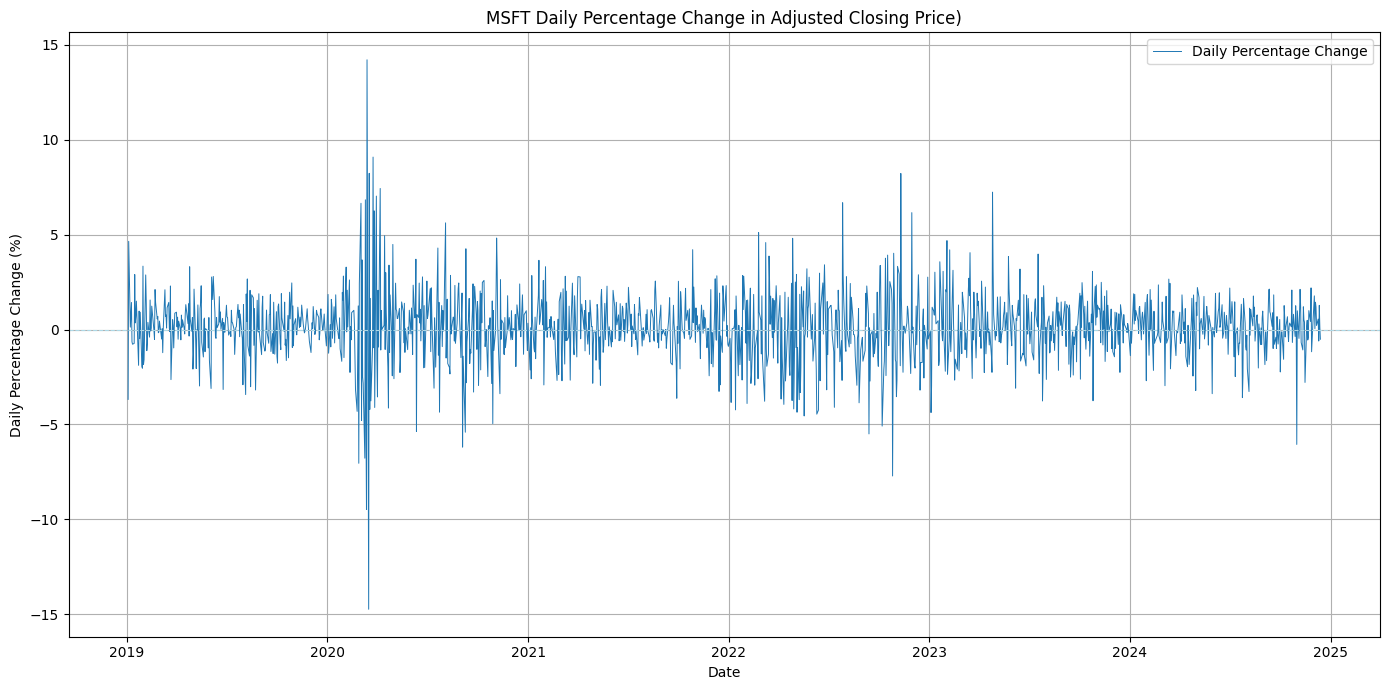

In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 設定日期範圍和股票代碼
start_date = "2019-01-01"
end_date = "2024-12-31"
symbol = "MSFT"

# 下載歷史數據
msft = yf.download(symbol, start=start_date, end=end_date)

# 計算每日百分比變化
msft['Daily_Pct_Change'] = msft['Adj Close'].pct_change() * 100

# 移除空值
msft = msft.dropna()

# 繪製每日百分比變化圖表
plt.figure(figsize=(14, 7))
plt.plot(msft.index, msft['Daily_Pct_Change'], label='Daily Percentage Change', linewidth=0.7)
plt.axhline(0, color='lightblue', linestyle='--', linewidth=0.8)
plt.title(f'{symbol} Daily Percentage Change in Adjusted Closing Price)')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 顯示圖表
plt.show()


[*********************100%***********************]  1 of 1 completed


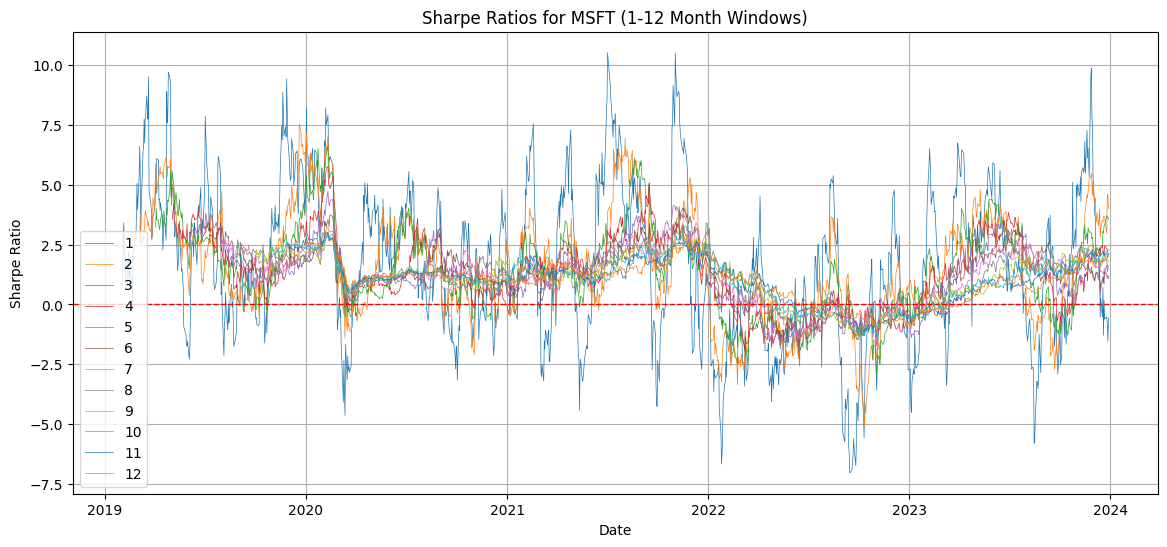

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# 下載 MSFT 的歷史數據（2019-01-01 到 2023-12-31）
start_date = "2019-01-01"
end_date = "2023-12-31"
stock_symbol = "MSFT"
data = yf.download(stock_symbol, start=start_date, end=end_date)

# 計算每日收益率
data['Daily Return'] = data['Adj Close'].pct_change()

# 定義移動窗口範圍（1 到 12 個月）
window_sizes = range(1, 13)  # 1 到 12 個月
sharpe_ratios = {}

# 計算每個移動窗口的夏普比率
for window in window_sizes:
    # 計算年化平均收益率和波動率
    annualized_return = data['Daily Return'].rolling(window * 21).mean() * 252
    annualized_volatility = data['Daily Return'].rolling(window * 21).std() * np.sqrt(252)
    sharpe_ratios[window] = annualized_return / annualized_volatility

# 將夏普比率加入 DataFrame
for window, sr in sharpe_ratios.items():
    data[f'{window}'] = sr

# 繪製夏普比率的變化
plt.figure(figsize=(14, 6))
for window in window_sizes:
    plt.plot(data.index, data[f'{window}'], label=f'{window}', linewidth=0.5)

plt.title(f'Sharpe Ratios for {stock_symbol} (1-12 Month Windows)')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


Accuracy: 68.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       137
           1       0.69      0.67      0.68       137

    accuracy                           0.68       274
   macro avg       0.68      0.68      0.68       274
weighted avg       0.68      0.68      0.68       274

Feature Importances:
        Feature  Importance
1  Daily Return    0.131756
5           RSI    0.131740
0         Close    0.131454
7   MACD_Signal    0.122449
4      High-Low    0.122214
2          MA10    0.121089
6          MACD    0.120003
3          MA20    0.119294


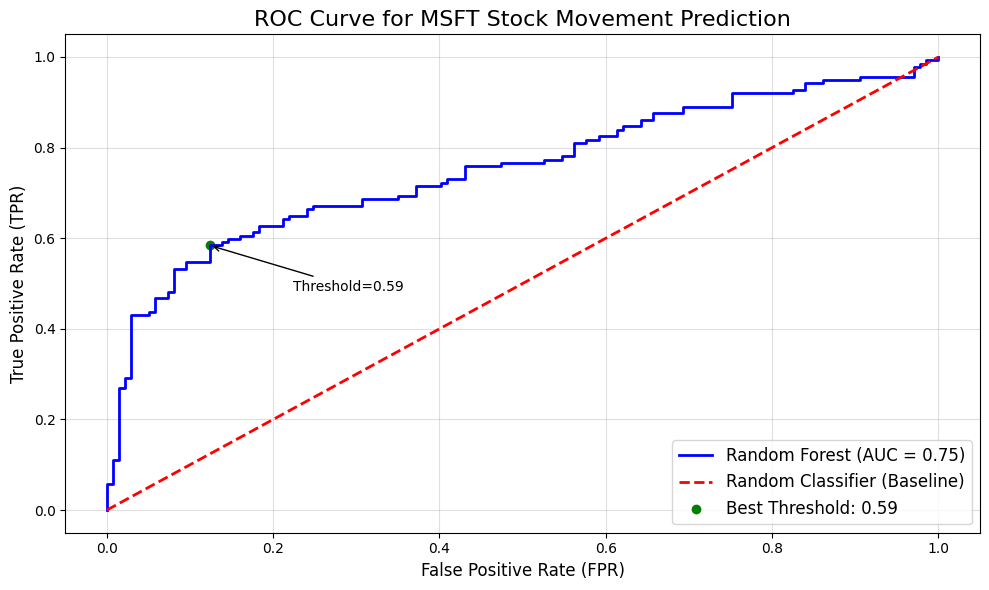

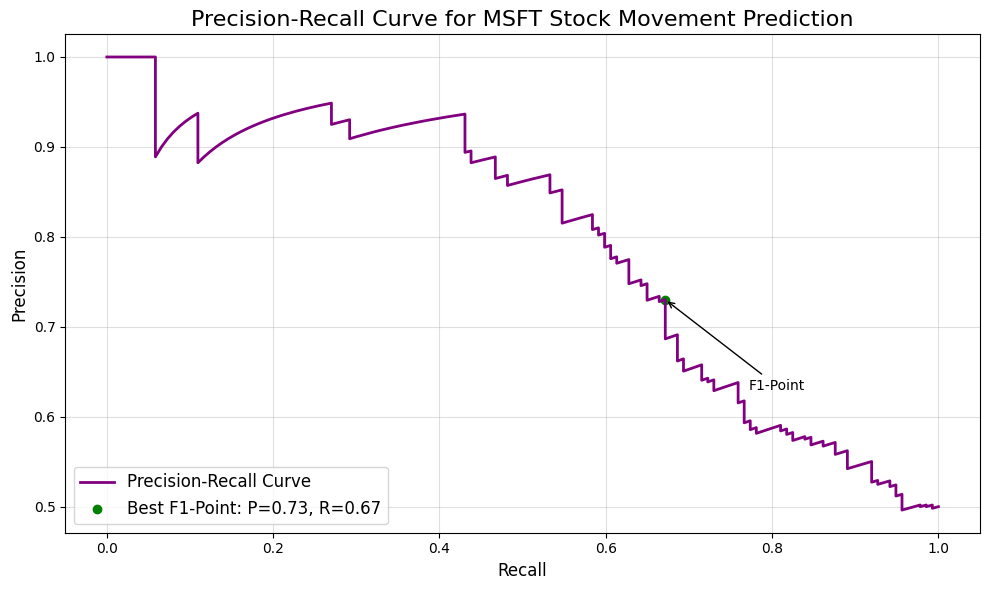

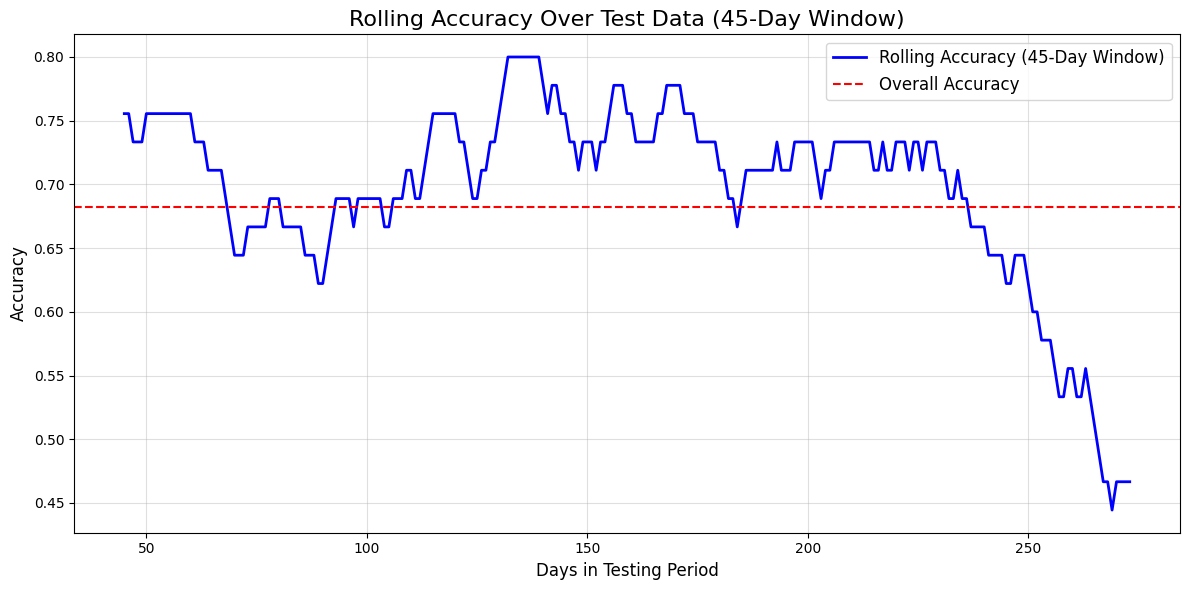

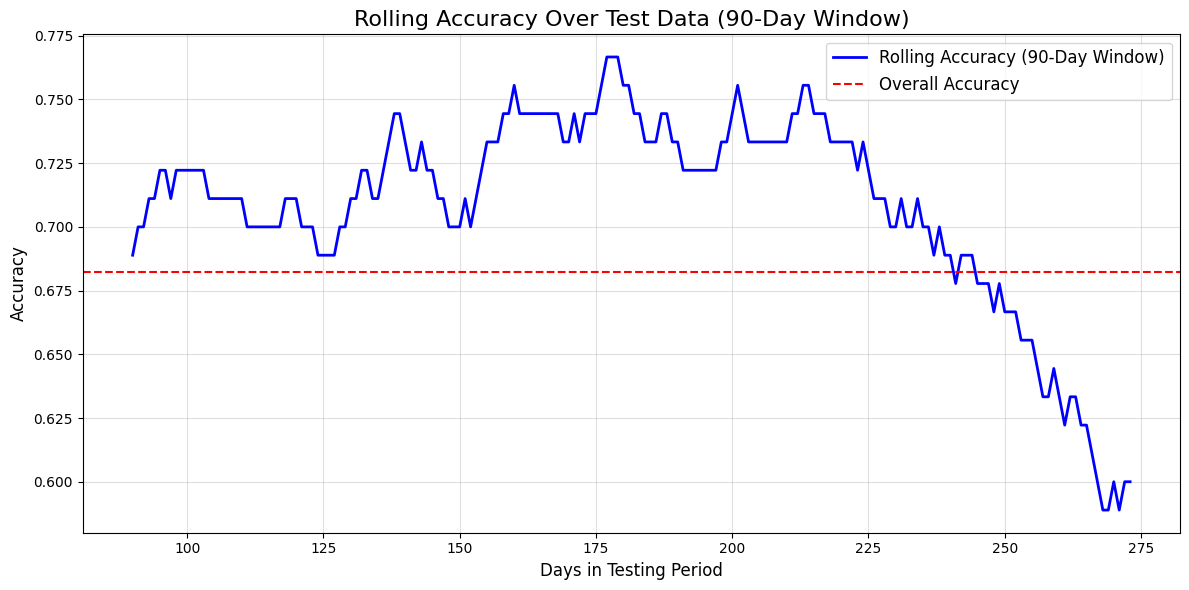

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# 下載 MSFT 股票數據
stock_symbol = 'MSFT'
data = yf.download(stock_symbol, start="2019-01-01", end="2024-12-31")

# 計算技術指標
data['Daily Return'] = data['Close'].pct_change()  # 日回報率
data['MA10'] = data['Close'].rolling(window=10).mean()  # 10 日均線
data['MA20'] = data['Close'].rolling(window=20).mean()  # 20 日均線
data['High-Low'] = data['High'] - data['Low']  # 日內波動幅度

# RSI 指標
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD 指標
ema12 = data['Close'].ewm(span=12, adjust=False).mean()
ema26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema12 - ema26
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# 設置目標變數（上漲為 1，下跌為 0）
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# 移除缺失值
data.dropna(inplace=True)

# 定義特徵和目標
features = ['Close', 'Daily Return', 'MA10', 'MA20', 'High-Low', 'RSI', 'MACD', 'MACD_Signal']
X = data[features]
y = data['Target']

# 處理類別不平衡：手動上採樣
data_majority = data[data['Target'] == 0]
data_minority = data[data['Target'] == 1]

# 上採樣少數類別
data_minority_upsampled = data_minority.sample(len(data_majority), replace=True, random_state=42)

# 合併新數據集
data_balanced = pd.concat([data_majority, data_minority_upsampled])

# 更新 X 和 y
X = data_balanced[features]
y = data_balanced['Target']

# 分割數據集，確保類別比例一致
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42
)

# 訓練隨機森林
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)

# 預測
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# 特徵重要性
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# 繪製 ROC 曲線
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label="Random Classifier (Baseline)")

# 添加最佳閾值標註
best_threshold_idx = np.argmax(tpr - fpr)
best_fpr, best_tpr, best_threshold = fpr[best_threshold_idx], tpr[best_threshold_idx], thresholds[best_threshold_idx]
plt.scatter(best_fpr, best_tpr, color='green', label=f"Best Threshold: {best_threshold:.2f}")
plt.annotate(f'Threshold={best_threshold:.2f}', xy=(best_fpr, best_tpr),
             xytext=(best_fpr + 0.1, best_tpr - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('ROC Curve for MSFT Stock Movement Prediction', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Precision-Recall 曲線
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='purple', lw=2, label='Precision-Recall Curve')

# 添加最佳平衡點標註
best_idx = np.argmax(2 * (precision * recall) / (precision + recall))  # F1-score 最大點
best_recall, best_precision = recall[best_idx], precision[best_idx]
plt.scatter(best_recall, best_precision, color='green', label=f"Best F1-Point: P={best_precision:.2f}, R={best_recall:.2f}")
plt.annotate(f'F1-Point', xy=(best_recall, best_precision),
             xytext=(best_recall + 0.1, best_precision - 0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Precision-Recall Curve for MSFT Stock Movement Prediction', fontsize=16)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend(loc="lower left", fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


# 滑動窗口分析函數
def rolling_accuracy(y_test, y_pred, window_size, label):
    rolling_accuracies = []
    indices = []

    for i in range(window_size, len(y_test)):
        y_window = y_test.iloc[i - window_size:i]
        y_pred_window = y_pred[i - window_size:i]
        indices.append(i)
        rolling_accuracies.append(accuracy_score(y_window, y_pred_window))

    plt.figure(figsize=(12, 6))
    plt.plot(indices, rolling_accuracies, label=f'Rolling Accuracy ({label})', color='blue', linewidth=2)
    plt.axhline(y=accuracy, color='red', linestyle='--', label='Overall Accuracy')
    plt.title(f'Rolling Accuracy Over Test Data ({label})', fontsize=16)  # 更新標題
    plt.xlabel('Days in Testing Period', fontsize=12)  # 更新 X 軸標籤
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

# 45 天滑動窗口
rolling_accuracy(y_test, y_pred, 45, "45-Day Window")

# 90 天滑動窗口
rolling_accuracy(y_test, y_pred, 90, "90-Day Window")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


   Start Date   End Date  Annual Return  Sharpe Ratio  Max Drawdown  \
0  2019-01-30 2019-04-25      -0.042213     -1.059402      0.006585   
1  2019-04-26 2019-07-22      -0.107171     -3.424726      0.007866   
2  2019-07-23 2019-10-15       0.021037      0.312456      0.012820   
3  2019-10-16 2020-01-10       0.032126      1.012708      0.004179   
4  2020-01-13 2020-04-07       1.371842      6.659232      0.013479   
5  2020-04-08 2020-07-02       0.029595      0.401784      0.012896   
6  2020-07-06 2020-09-28      -0.004115     -0.073087      0.015111   
7  2020-09-29 2020-12-22      -0.126543     -1.999667      0.014551   
8  2020-12-23 2021-03-22       0.111087      1.867021      0.010875   
9  2021-03-23 2021-06-16       0.330289      9.477239      0.002999   
10 2021-06-17 2021-09-10      -0.247269     -7.433579      0.009714   
11 2021-09-13 2021-12-06      -0.142953     -3.953922      0.007489   
12 2021-12-07 2022-03-03      -0.012163     -0.169789      0.015954   
13 202

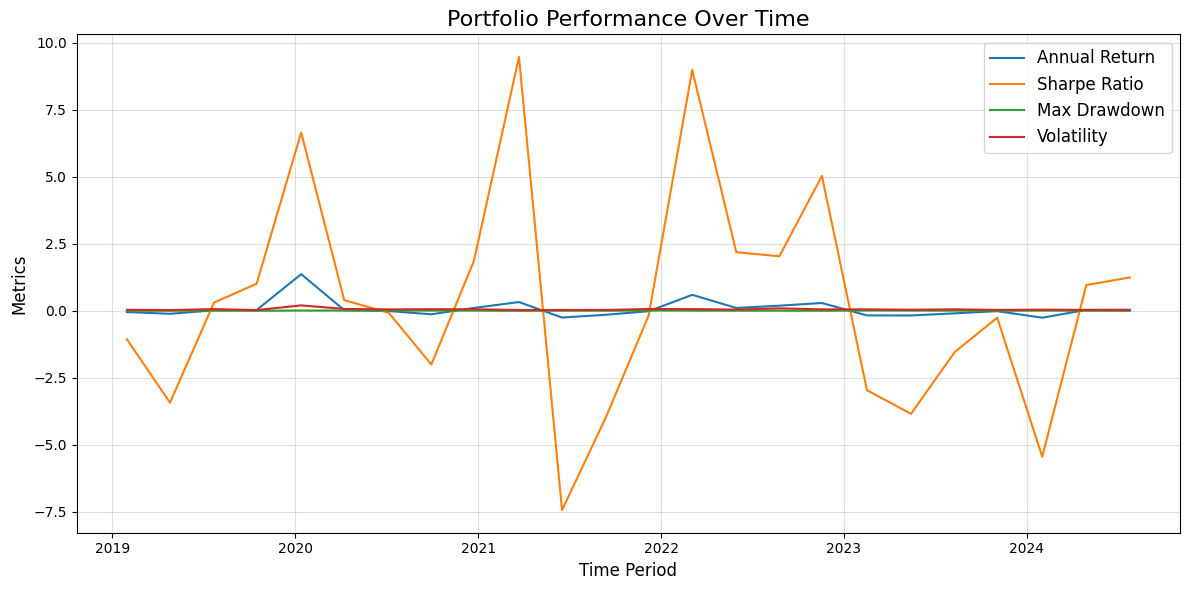

In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 定義股票列表和滾動窗口設置
stock_symbols = ['MSFT', 'XOM', 'PFE']
window_size = 60  # 滾動窗口大小（以天為單位）

# 定義績效指標計算函數
def calculate_performance(portfolio_returns):
    portfolio_returns = pd.Series(portfolio_returns)  # 將 NumPy 陣列轉為 Pandas Series
    annual_return = portfolio_returns.mean() * 252  # 年化回報率
    volatility = portfolio_returns.std() * np.sqrt(252)  # 波動率
    sharpe_ratio = annual_return / volatility  # 夏普比率
    cumulative_return = (1 + portfolio_returns).cumprod() - 1
    max_drawdown = (cumulative_return.cummax() - cumulative_return).max()  # 最大回撤
    return annual_return, sharpe_ratio, max_drawdown, volatility

# 下載多隻股票數據
all_data = {}
for stock_symbol in stock_symbols:
    data = yf.download(stock_symbol, start="2019-01-01", end="2024-12-31")
    data['Daily Return'] = data['Close'].pct_change()  # 日回報率
    data['MA10'] = data['Close'].rolling(window=10).mean()  # 10 日均線
    data['MA20'] = data['Close'].rolling(window=20).mean()  # 20 日均線
    data['High-Low'] = data['High'] - data['Low']  # 日內波動幅度
    data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)  # 設置目標變數
    data.dropna(inplace=True)
    all_data[stock_symbol] = data

# 整合多隻股票的滾動窗口分析
results = []
weights = [1/len(stock_symbols)] * len(stock_symbols)  # 等權重分配

for start_idx in range(0, len(all_data['MSFT']) - window_size, window_size):
    end_idx = start_idx + window_size
    combined_returns = []
    adjusted_weights = []

    for stock_symbol, weight in zip(stock_symbols, weights):
        data = all_data[stock_symbol].iloc[start_idx:end_idx]
        features = ['Close', 'Daily Return', 'MA10', 'MA20', 'High-Low']
        X = data[features]
        y = data['Target']

        # 分割數據集
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42
        )

        # 訓練隨機森林
        rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
        rf_model.fit(X_train, y_train)

        # 計算資產日回報率
        daily_returns = data['Daily Return'].iloc[-len(y_test):]
        if weight > 0:  # 確保權重非負
            combined_returns.append(daily_returns * weight)
            adjusted_weights.append(weight)
        else:
            adjusted_weights.append(0)  # 設置最低權重為0

    # 調整權重以確保總和為1
    total_weight = sum(adjusted_weights)
    adjusted_weights = [w / total_weight for w in adjusted_weights]
    combined_returns = [r * w for r, w in zip(combined_returns, adjusted_weights)]

    # 計算投資組合回報率
    portfolio_returns = np.sum(combined_returns, axis=0)
    annual_return, sharpe_ratio, max_drawdown, volatility = calculate_performance(portfolio_returns)

    # 儲存結果
    results.append({
        'Start Date': all_data['MSFT'].iloc[start_idx].name,
        'End Date': all_data['MSFT'].iloc[end_idx - 1].name,
        'Annual Return': annual_return,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown,
        'Volatility': volatility
    })

# 將結果輸出為 DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# 可視化績效指標
plt.figure(figsize=(12, 6))
plt.plot(results_df['Start Date'], results_df['Annual Return'], label='Annual Return')
plt.plot(results_df['Start Date'], results_df['Sharpe Ratio'], label='Sharpe Ratio')
plt.plot(results_df['Start Date'], results_df['Max Drawdown'], label='Max Drawdown')
plt.plot(results_df['Start Date'], results_df['Volatility'], label='Volatility')
plt.title('Portfolio Performance Over Time', fontsize=16)
plt.xlabel('Time Period', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


Accuracy for MSFT: 0.95


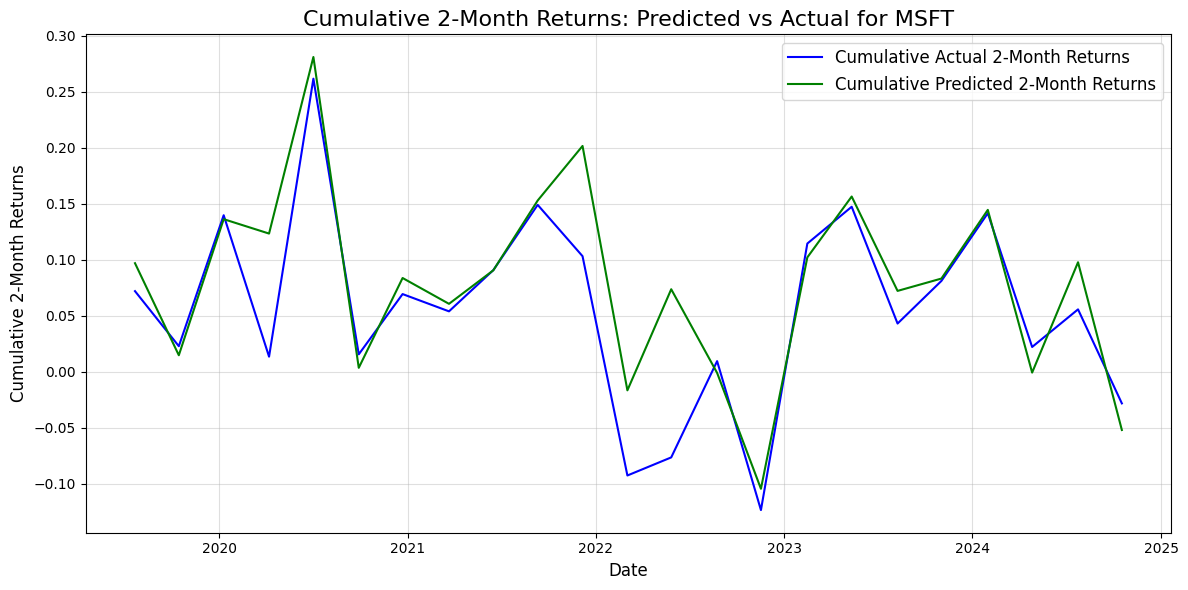

[*********************100%***********************]  1 of 1 completed


Accuracy for XOM: 0.94


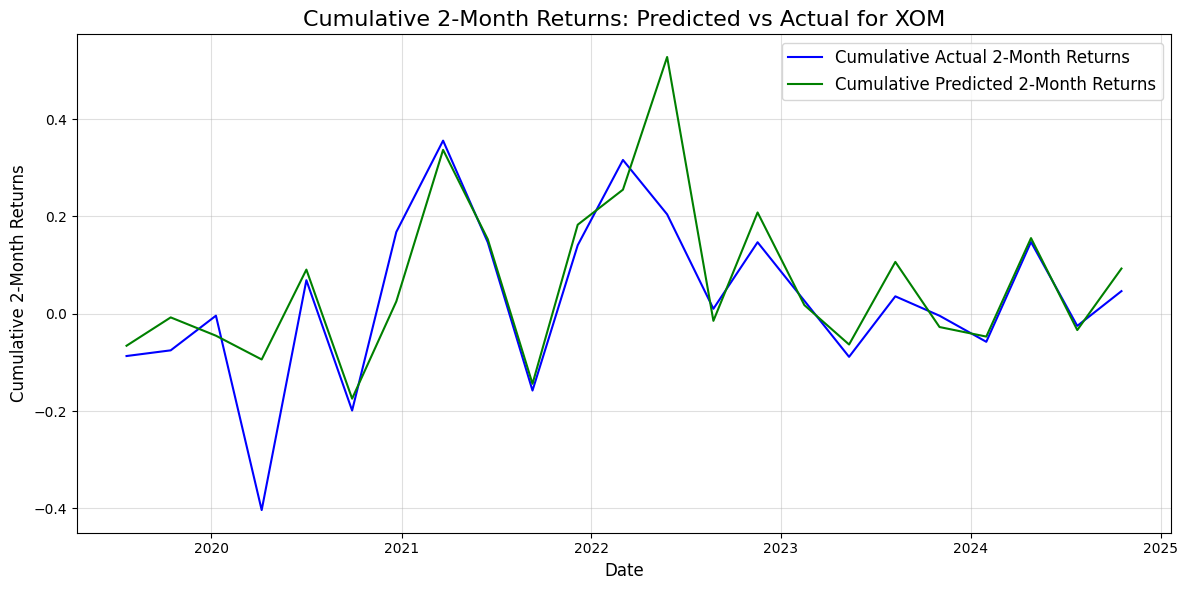

[*********************100%***********************]  1 of 1 completed


Accuracy for PFE: 0.93


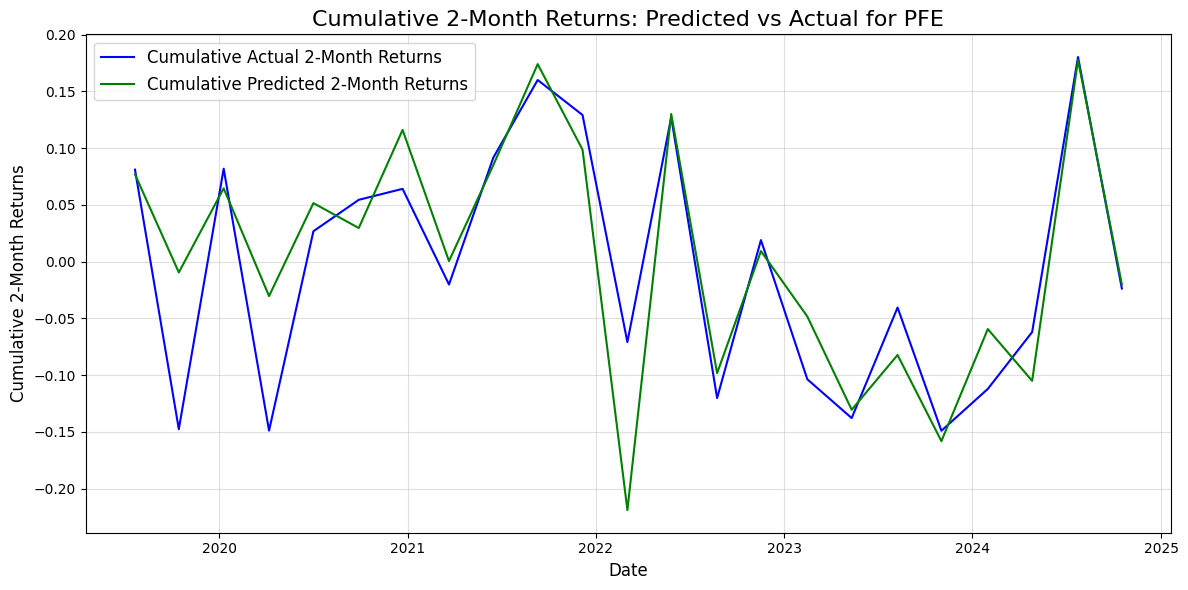

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 定義股票列表和滾動窗口設置
stock_symbols = ['MSFT', 'XOM', 'PFE']
window_size = 60  # 滾動窗口大小（以天為單位）

# 定義滾動窗口預測與實際回報比較
for stock_symbol in stock_symbols:
    # 下載數據
    data = yf.download(stock_symbol, start="2019-01-01", end="2024-12-31")
    data['Daily Return'] = data['Close'].pct_change()
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['High-Low'] = data['High'] - data['Low']
    data.dropna(inplace=True)

    features = ['Close', 'Daily Return', 'MA10', 'MA20', 'High-Low']
    target = 'Daily Return'

    predicted_means = []
    actual_returns = []
    cumulative_actual = []
    cumulative_predicted = []
    predicted_dates = []
    accuracies = []

    # 滾動窗口分析
    for start_idx in range(0, len(data) - window_size, window_size):
        end_idx = start_idx + window_size
        train_data = data.iloc[start_idx:end_idx]
        test_data = data.iloc[end_idx:end_idx + window_size]

        if len(test_data) < window_size:
            break  # 跳過最後不完整的窗口

        X_train = train_data[features]
        y_train = train_data[target]
        X_test = test_data[features]
        y_test = test_data[target]

        # 訓練隨機森林模型
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
        rf_model.fit(X_train, y_train)

        # 預測回報均值
        y_pred = rf_model.predict(X_test)
        predicted_mean = y_pred.mean()
        predicted_means.append(predicted_mean)
        actual_returns.extend(y_test.values)
        predicted_dates.append(test_data.index[-1])  # 使用窗口結束日期作為預測點

        # 計算累積回報
        cumulative_actual.append(np.cumprod([1 + r for r in y_test.values])[-1] - 1)
        cumulative_predicted.append(np.cumprod([1 + predicted_mean for _ in y_test.values])[-1] - 1)

        # 計算準確值 (R^2)
        accuracy = rf_model.score(X_test, y_test)
        accuracies.append(accuracy)

    # 印出準確率
    print(f"Accuracy for {stock_symbol}: {np.mean(accuracies):.2f}")

    # 繪製多線圖：累積回報比較
    plt.figure(figsize=(12, 6))
    plt.plot(predicted_dates, cumulative_actual, label='Cumulative Actual 2-Month Returns', color='blue', linewidth=1.5)
    plt.plot(predicted_dates, cumulative_predicted, label='Cumulative Predicted 2-Month Returns', color='green', linewidth=1.5)
    plt.title(f'Cumulative 2-Month Returns: Predicted vs Actual for {stock_symbol}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cumulative 2-Month Returns', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

    


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


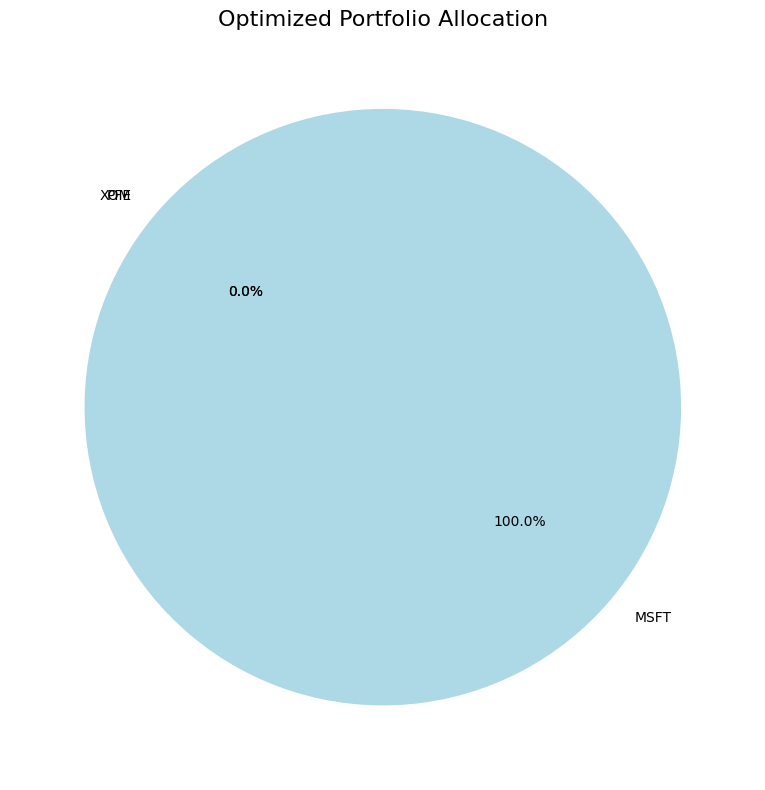

Comparison of Portfolio vs MSFT Only:

Multi-Asset Portfolio:
  Annualized Return: 1108.30%
  Annualized Volatility: 1587.45%
  Sharpe Ratio: 0.70

MSFT Only:
  Annualized Return: 1108.30%
  Annualized Volatility: 128.95%
  Sharpe Ratio: 8.59


In [35]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define stock list and rolling window settings
stock_symbols = ['MSFT', 'XOM', 'PFE']
window_size = 42  # Approximately two months of trading days

# Store returns for each stock
test_returns = {}

for stock_symbol in stock_symbols:
    # Download data
    data = yf.download(stock_symbol, start="2019-01-01", end="2024-12-31")
    data['Daily Return'] = data['Close'].pct_change()
    data.dropna(inplace=True)

    # Rolling window analysis
    rolling_returns = []
    for start_idx in range(0, len(data) - window_size, window_size):
        end_idx = start_idx + window_size
        rolling_data = data.iloc[start_idx:end_idx]

        # Calculate cumulative returns
        cumulative_return = (rolling_data['Daily Return'] + 1).prod() - 1
        rolling_returns.append(cumulative_return)

    test_returns[stock_symbol] = np.array(rolling_returns)

# Annualized returns and risks
returns = np.array([np.mean(test_returns[s]) * 252 for s in stock_symbols])  # Annualized returns
risks = np.array([np.std(test_returns[s]) * np.sqrt(252) for s in stock_symbols])  # Annualized volatility
correlation_matrix = np.corrcoef([test_returns[s] for s in stock_symbols])

# Portfolio optimization
# Define the objective function to maximize annualized returns
def portfolio_return(weights):
    return -np.dot(weights, returns)  # Negative because we are maximizing

# Weight constraints
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Weight bounds (0 to 1)
bounds = [(0, 1) for _ in stock_symbols]

# Initial weights
initial_weights = np.array([1 / len(stock_symbols)] * len(stock_symbols))

# Minimize negative return
optimized = minimize(portfolio_return, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = optimized.x

# Portfolio return and volatility
portfolio_return = np.dot(optimal_weights, returns)
portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(correlation_matrix, optimal_weights))) * np.sqrt(252)
portfolio_sharpe = portfolio_return / portfolio_volatility

# Single asset allocation for MSFT
msft_return = returns[0]
msft_volatility = risks[0]
msft_sharpe = msft_return / msft_volatility

# Plot pie chart
plt.figure(figsize=(8, 8))
non_zero_weights = [(stock_symbols[i], optimal_weights[i]) for i in range(len(optimal_weights)) if optimal_weights[i] > 0]
labels, sizes = zip(*non_zero_weights)
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',
    startangle=140, 
    colors=['lightblue', 'lightgreen', 'red'][:len(labels)]
)
plt.title('Optimized Portfolio Allocation', fontsize=16)
plt.tight_layout()
plt.show()

# Print results
print("Comparison of Portfolio vs MSFT Only:")
print(f"\nMulti-Asset Portfolio:\n  Annualized Return: {portfolio_return:.2%}\n  Annualized Volatility: {portfolio_volatility:.2%}\n  Sharpe Ratio: {portfolio_sharpe:.2f}")
print(f"\nMSFT Only:\n  Annualized Return: {msft_return:.2%}\n  Annualized Volatility: {msft_volatility:.2%}\n  Sharpe Ratio: {msft_sharpe:.2f}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


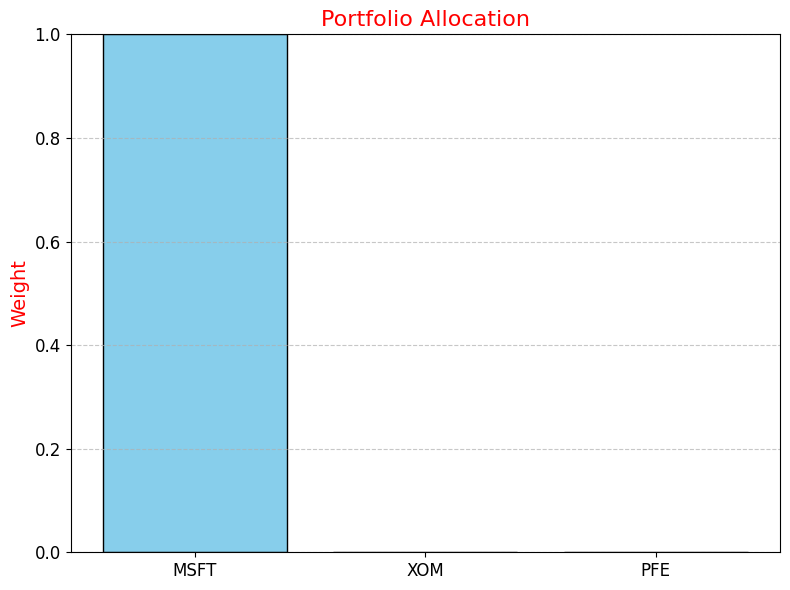

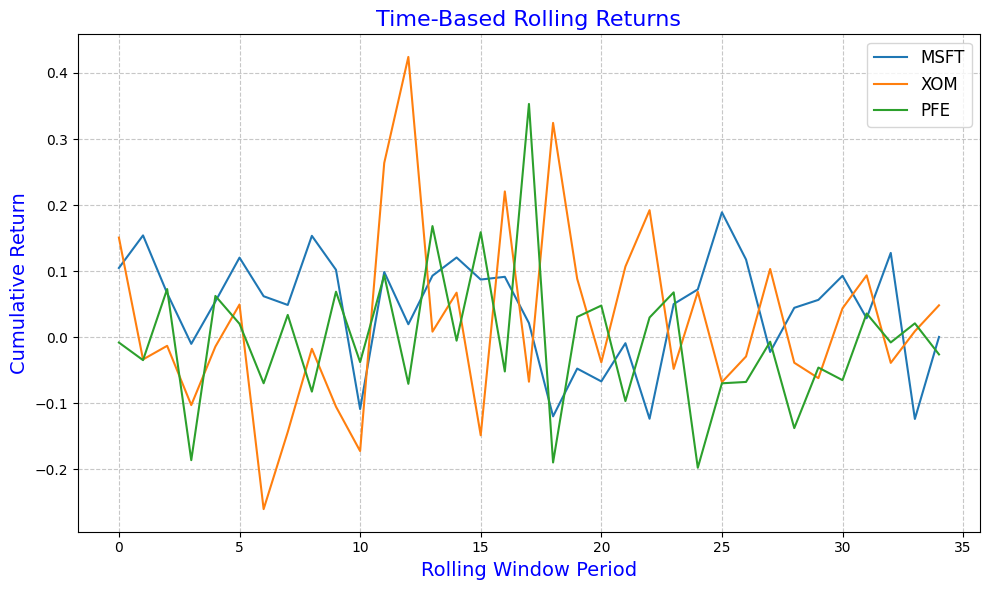

Comparison of Portfolio vs MSFT Only:

Multi-Asset Portfolio:
  Annualized Return: 1108.30%
  Annualized Volatility: 1587.45%
  Sharpe Ratio: 0.70

MSFT Only:
  Annualized Return: 1108.30%
  Annualized Volatility: 128.95%
  Sharpe Ratio: 8.59


In [36]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define stock list and rolling window settings
stock_symbols = ['MSFT', 'XOM', 'PFE']
window_size = 42  # Approximately two months of trading days

# Store returns for each stock
test_returns = {}

for stock_symbol in stock_symbols:
    # Download data
    data = yf.download(stock_symbol, start="2019-01-01", end="2024-12-31")
    data['Daily Return'] = data['Close'].pct_change()
    data.dropna(inplace=True)

    # Rolling window analysis
    rolling_returns = []
    for start_idx in range(0, len(data) - window_size, window_size):
        end_idx = start_idx + window_size
        rolling_data = data.iloc[start_idx:end_idx]

        # Calculate cumulative returns
        cumulative_return = (rolling_data['Daily Return'] + 1).prod() - 1
        rolling_returns.append(cumulative_return)

    test_returns[stock_symbol] = np.array(rolling_returns)

# Annualized returns and risks
returns = np.array([np.mean(test_returns[s]) * 252 for s in stock_symbols])  # Annualized returns
risks = np.array([np.std(test_returns[s]) * np.sqrt(252) for s in stock_symbols])  # Annualized volatility
correlation_matrix = np.corrcoef([test_returns[s] for s in stock_symbols])

# Portfolio optimization
# Define the objective function to maximize annualized returns
def portfolio_return(weights):
    return -np.dot(weights, returns)  # Negative because we are maximizing

# Weight constraints
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Weight bounds (0 to 1)
bounds = [(0, 1) for _ in stock_symbols]

# Initial weights
initial_weights = np.array([1 / len(stock_symbols)] * len(stock_symbols))

# Minimize negative return
optimized = minimize(portfolio_return, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = optimized.x

# Portfolio return and volatility
portfolio_return = np.dot(optimal_weights, returns)
portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(correlation_matrix, optimal_weights))) * np.sqrt(252)
portfolio_sharpe = portfolio_return / portfolio_volatility

# Single asset allocation for MSFT
msft_return = returns[0]
msft_volatility = risks[0]
msft_sharpe = msft_return / msft_volatility

# Plot bar chart
plt.figure(figsize=(8, 6))
labels = stock_symbols
weights = optimal_weights
plt.bar(labels, weights, color=['skyblue', 'lightgreen', 'orange'], edgecolor='black')

# Customizing the chart
plt.title('Portfolio Allocation', fontsize=16, color='red')
plt.ylabel('Weight', fontsize=14, color='red')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Displaying the chart
plt.tight_layout()
plt.show()

# Time-based allocation chart
plt.figure(figsize=(10, 6))
for stock_symbol in stock_symbols:
    plt.plot(range(len(test_returns[stock_symbol])), test_returns[stock_symbol], label=stock_symbol)

# Customizing the time allocation chart
plt.title('Time-Based Rolling Returns', fontsize=16, color='blue')
plt.xlabel('Rolling Window Period', fontsize=14, color='blue')
plt.ylabel('Cumulative Return', fontsize=14, color='blue')
plt.legend(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print results
print("Comparison of Portfolio vs MSFT Only:")
print(f"\nMulti-Asset Portfolio:\n  Annualized Return: {portfolio_return:.2%}\n  Annualized Volatility: {portfolio_volatility:.2%}\n  Sharpe Ratio: {portfolio_sharpe:.2f}")
print(f"\nMSFT Only:\n  Annualized Return: {msft_return:.2%}\n  Annualized Volatility: {msft_volatility:.2%}\n  Sharpe Ratio: {msft_sharpe:.2f}")


In [37]:
# Debugging the issue with target_data and ensuring consistency
# Checking the lengths of target data to identify inconsistencies
for idx, target in enumerate(target_data):
    print(f"Index {idx}: {target}, Type: {type(target)}, Length: {len(target) if isinstance(target, (list, np.ndarray)) else 'N/A'}")

# Ensuring all elements in target_data are consistent
cleaned_target_data = [t for t in target_data if len(t) == 4]

# Convert cleaned data to NumPy array
features_data = np.array(features_data)
target_data = np.array(cleaned_target_data)

# Proceed with splitting and training
X_train, X_test, y_train, y_test = train_test_split(features_data, target_data, test_size=0.2, random_state=42)

# Train Random Forest model for each target
models = [RandomForestRegressor(n_estimators=100, random_state=42) for _ in range(4)]
for i, model in enumerate(models):
    model.fit(X_train, y_train[:, i])

# Predict on test data
predictions = [model.predict(X_test) for model in models]

# Extract years for plotting
years = sorted(set(pd.date_range(start=start_date, end=end_date).year))[:len(target_data)]

# Prepare and plot charts
metrics = ["Annual Return", "Volatility", "Max Drawdown", "Sharpe Ratio"]
colors = ['blue', 'orange']
file_paths = []

for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 6))
    plt.plot(years[:len(y_test)], y_test[:, i], label="Actual", marker='o', color=colors[0])
    plt.plot(years[:len(y_test)], predictions[i], label="Predicted", marker='o', color=colors[1])
    plt.title(f"{metric} Comparison (2019-2024)")
    plt.xlabel("Year")
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    file_path = f"/mnt/data/{metric.replace(' ', '_')}_Comparison.png"
    plt.savefig(file_path)
    file_paths.append(file_path)

file_paths


NameError: name 'target_data' is not defined

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define stock symbols and date range
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# Define performance metric function
def calculate_performance(portfolio_returns):
    portfolio_returns = pd.Series(portfolio_returns)
    annual_return = portfolio_returns.mean() * 252
    volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = annual_return / volatility
    cumulative_return = (1 + portfolio_returns).cumprod() - 1
    max_drawdown = (cumulative_return.cummax() - cumulative_return).max()
    return annual_return, sharpe_ratio, max_drawdown, volatility

# Function to calculate technical indicators
def add_technical_indicators(data):
    data['RSI'] = calculate_rsi(data['Close'])
    data['MACD'], data['Signal Line'] = calculate_macd(data['Close'])
    data['Bollinger High'], data['Bollinger Low'] = calculate_bollinger_bands(data['Close'])
    return data

def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

def calculate_bollinger_bands(series, window=20, num_std_dev=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

# Download and process stock data
all_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Daily Return'] = data['Close'].pct_change()
    data['MA10'] = data['Close'].rolling(10).mean()
    data['MA20'] = data['Close'].rolling(20).mean()
    data['High-Low'] = data['High'] - data['Low']
    data = add_technical_indicators(data)
    data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
    data.dropna(inplace=True)
    all_data[symbol] = data

# Rolling window setup
window_size = 42  # Continuous time window (42 trading days ~ 2 months)
random_tests = 100000  # Increased number of random weight tests
best_weights = None
best_sharpe_ratio = -np.inf

results_table = []

for start_idx in range(0, len(all_data['MSFT']) - window_size, window_size):
    end_idx = start_idx + window_size
    best_window_weights = None
    best_window_sharpe = -np.inf

    for _ in range(random_tests):
        # Generate extreme and random weights
        if _ % 2 == 0:
            weights = np.zeros(len(stock_symbols))
            weights[np.random.randint(0, len(stock_symbols))] = 1  # Extreme test: all weight on one stock
        else:
            weights = np.random.rand(len(stock_symbols))
            weights /= weights.sum()  # Normalize weights to sum to 1

        # Calculate portfolio returns with generated weights
        portfolio_returns = np.zeros(window_size)
        for symbol, weight in zip(stock_symbols, weights):
            data = all_data[symbol].iloc[start_idx:end_idx]
            portfolio_returns += data['Daily Return'].values * weight

        # Evaluate performance
        annual_return, sharpe_ratio, max_drawdown, volatility = calculate_performance(portfolio_returns)

        # Update best weights for the current window
        if sharpe_ratio > best_window_sharpe:
            best_window_sharpe = sharpe_ratio
            best_window_weights = weights

    # Test full MSFT allocation
    full_msft_weights = [1.0, 0.0, 0.0]
    full_msft_returns = np.zeros(window_size)
    for symbol, weight in zip(stock_symbols, full_msft_weights):
        data = all_data[symbol].iloc[start_idx:end_idx]
        full_msft_returns += data['Daily Return'].values * weight

    msft_annual_return, msft_sharpe_ratio, msft_max_drawdown, msft_volatility = calculate_performance(full_msft_returns)

    # Add results to table
    results_table.append({
        'Window': f"{start_idx}-{end_idx}",
        'Best Weights': best_window_weights,
        'Best Sharpe Ratio': best_window_sharpe,
        'MSFT Sharpe Ratio': msft_sharpe_ratio,
        'MSFT Annual Return': msft_annual_return
    })

    # Print best weights and sharpe ratio for this window
    print(f"Window {start_idx}-{end_idx} Best Weights: {best_window_weights}")
    print(f"Window {start_idx}-{end_idx} Best Sharpe Ratio: {best_window_sharpe}")
    print(f"Window {start_idx}-{end_idx} Full MSFT Sharpe Ratio: {msft_sharpe_ratio}")

    # Update overall best weights
    if best_window_sharpe > best_sharpe_ratio:
        best_sharpe_ratio = best_window_sharpe
        best_weights = best_window_weights

# Final results
print(f"Best Overall Weights: {best_weights}")
print(f"Best Overall Sharpe Ratio: {best_sharpe_ratio}")

# Convert results to DataFrame and print
results_df = pd.DataFrame(results_table)
print(results_df)


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define stock symbols and date range
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# Define performance metric function
def calculate_performance(portfolio_returns):
    portfolio_returns = pd.Series(portfolio_returns)
    annual_return = portfolio_returns.mean() * 252
    volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = annual_return / volatility
    cumulative_return = (1 + portfolio_returns).cumprod() - 1
    max_drawdown = (cumulative_return.cummax() - cumulative_return).max()
    return annual_return, sharpe_ratio, max_drawdown, volatility

# Function to calculate technical indicators
def add_technical_indicators(data):
    data['RSI'] = calculate_rsi(data['Close'])
    data['MACD'], data['Signal Line'] = calculate_macd(data['Close'])
    data['Bollinger High'], data['Bollinger Low'] = calculate_bollinger_bands(data['Close'])
    return data

def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

def calculate_bollinger_bands(series, window=20, num_std_dev=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

# Download and process stock data
all_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Daily Return'] = data['Close'].pct_change()
    data['MA10'] = data['Close'].rolling(10).mean()
    data['MA20'] = data['Close'].rolling(20).mean()
    data['High-Low'] = data['High'] - data['Low']
    data = add_technical_indicators(data)
    data['Target'] = data['Close'].shift(-1)  # Continuous target: next day's price
    data.dropna(inplace=True)
    all_data[symbol] = data

# Rolling window setup
window_size = 42  # Continuous time window (42 trading days ~ 2 months)
random_tests = 100000  # Increased number of random weight tests
best_weights_avg = None
best_sharpe_ratio_avg = -np.inf

best_weights_max = None
best_sharpe_ratio_max = -np.inf

results_table = []

for start_idx in range(0, len(all_data['MSFT']) - window_size, window_size):
    end_idx = start_idx + window_size
    best_window_weights_avg = None
    best_window_sharpe_avg = -np.inf

    best_window_weights_max = None
    best_window_sharpe_max = -np.inf

    for _ in range(random_tests):
        # Generate extreme and random weights
        if _ % 2 == 0:
            weights = np.zeros(len(stock_symbols))
            weights[np.random.randint(0, len(stock_symbols))] = 1  # Extreme test: all weight on one stock
        else:
            weights = np.random.rand(len(stock_symbols))
            weights /= weights.sum()  # Normalize weights to sum to 1

        # Calculate portfolio returns with generated weights
        portfolio_predictions_avg = np.zeros(window_size)
        portfolio_predictions_max = np.zeros(window_size)

        for symbol, weight in zip(stock_symbols, weights):
            data = all_data[symbol].iloc[start_idx:end_idx]
            features = ['RSI', 'MA10', 'MA20', 'High-Low', 'MACD']
            X = data[features]
            y = data['Target']

            # Train Random Forest Regressor
            rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
            rf_model.fit(X, y)

            # Predict using average (default RF behavior)
            predictions_avg = rf_model.predict(X)
            portfolio_predictions_avg += predictions_avg * weight

            # Predict using maximum from decision trees
            predictions_all_trees = np.array([tree.predict(X) for tree in rf_model.estimators_])
            predictions_max = predictions_all_trees.max(axis=0)
            portfolio_predictions_max += predictions_max * weight

        # Evaluate performance for average-based predictions
        annual_return_avg, sharpe_ratio_avg, _, _ = calculate_performance(portfolio_predictions_avg)
        if sharpe_ratio_avg > best_window_sharpe_avg:
            best_window_sharpe_avg = sharpe_ratio_avg
            best_window_weights_avg = weights

        # Evaluate performance for max-based predictions
        annual_return_max, sharpe_ratio_max, _, _ = calculate_performance(portfolio_predictions_max)
        if sharpe_ratio_max > best_window_sharpe_max:
            best_window_sharpe_max = sharpe_ratio_max
            best_window_weights_max = weights

    # Add results to table
    results_table.append({
        'Window': f"{start_idx}-{end_idx}",
        'Best Weights (Avg)': best_window_weights_avg,
        'Best Sharpe Ratio (Avg)': best_window_sharpe_avg,
        'Best Weights (Max)': best_window_weights_max,
        'Best Sharpe Ratio (Max)': best_window_sharpe_max
    })

    # Update overall best weights for average method
    if best_window_sharpe_avg > best_sharpe_ratio_avg:
        best_sharpe_ratio_avg = best_window_sharpe_avg
        best_weights_avg = best_window_weights_avg

    # Update overall best weights for max method
    if best_window_sharpe_max > best_sharpe_ratio_max:
        best_sharpe_ratio_max = best_window_sharpe_max
        best_weights_max = best_window_weights_max

# Final results
print(f"Best Overall Weights (Avg): {best_weights_avg}")
print(f"Best Overall Sharpe Ratio (Avg): {best_sharpe_ratio_avg}")
print(f"Best Overall Weights (Max): {best_weights_max}")
print(f"Best Overall Sharpe Ratio (Max): {best_sharpe_ratio_max}")

# Convert results to DataFrame and print
results_df = pd.DataFrame(results_table)
print(results_df)

import matplotlib.pyplot as plt

# Extract data for plotting
windows = [entry['Window'] for entry in results_table]
best_sharpe_ratios_avg = [entry['Best Sharpe Ratio (Avg)'] for entry in results_table]
best_sharpe_ratios_max = [entry['Best Sharpe Ratio (Max)'] for entry in results_table]

# Plotting Sharpe Ratios
plt.figure(figsize=(12, 6))
plt.plot(windows, best_sharpe_ratios_avg, label="Best Sharpe Ratio (Avg)", marker="o")
plt.plot(windows, best_sharpe_ratios_max, label="Best Sharpe Ratio (Max)", marker="o")
plt.title("Sharpe Ratios Across Windows (Avg vs Max)")
plt.xlabel("Windows")
plt.ylabel("Sharpe Ratio")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extract data for plotting
windows = [entry['Window'] for entry in results_table]
best_weights_list = [entry['Best Weights'] for entry in results_table]
msft_sharpe_ratios = [entry['MSFT Sharpe Ratio'] for entry in results_table]
best_sharpe_ratios = [entry['Best Sharpe Ratio'] for entry in results_table]

# Convert weights to percentages for each stock
msft_weights = [weights[0] if weights is not None else 0 for weights in best_weights_list]
xom_weights = [weights[1] if weights is not None else 0 for weights in best_weights_list]
pfe_weights = [weights[2] if weights is not None else 0 for weights in best_weights_list]

# Plotting Sharpe Ratios
plt.figure(figsize=(12, 6))
plt.plot(windows, msft_sharpe_ratios, label="MSFT Sharpe Ratio", marker="o")
plt.plot(windows, best_sharpe_ratios, label="Best Sharpe Ratio", marker="o")
plt.title("Sharpe Ratios Across Windows")
plt.xlabel("Windows")
plt.ylabel("Sharpe Ratio")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting weight distributions
plt.figure(figsize=(12, 6))
plt.bar(windows, msft_weights, label="MSFT Weight", alpha=0.6, color="blue")
plt.bar(windows, xom_weights, label="XOM Weight", alpha=0.6, color="green", bottom=msft_weights)
pfe_bottom_weights = [msft_weights[i] + xom_weights[i] for i in range(len(msft_weights))]
plt.bar(windows, pfe_weights, label="PFE Weight", alpha=0.6, color="red", bottom=pfe_bottom_weights)
plt.title("Weight Distribution Across Windows")
plt.xlabel("Windows")
plt.ylabel("Weight")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define stock symbols and date range
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# Define performance metric function
def calculate_performance(portfolio_returns):
    portfolio_returns = pd.Series(portfolio_returns)
    annual_return = portfolio_returns.mean() * 252
    volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = annual_return / volatility
    cumulative_return = (1 + portfolio_returns).cumprod() - 1
    max_drawdown = (cumulative_return.cummax() - cumulative_return).max()
    return annual_return, sharpe_ratio, max_drawdown, volatility

# Function to calculate technical indicators
def add_technical_indicators(data):
    data['RSI'] = calculate_rsi(data['Close'])
    data['MACD'], data['Signal Line'] = calculate_macd(data['Close'])
    data['Bollinger High'], data['Bollinger Low'] = calculate_bollinger_bands(data['Close'])
    return data

def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

def calculate_bollinger_bands(series, window=20, num_std_dev=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

# Download and process stock data
all_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Daily Return'] = data['Close'].pct_change()
    data['MA10'] = data['Close'].rolling(10).mean()
    data['MA20'] = data['Close'].rolling(20).mean()
    data['High-Low'] = data['High'] - data['Low']
    data = add_technical_indicators(data)
    data['Target'] = data['Close'].shift(-1)  # Continuous target: next day's price
    data.dropna(inplace=True)
    all_data[symbol] = data

# Rolling window setup
window_size = 42  # Continuous time window (42 trading days ~ 2 months)
random_tests = 1000  # Reduced number of random weight tests
n_estimators = 50  # Reduced number of estimators for Random Forest
max_windows = 10  # Limit the number of windows to process
results_table = []

for window_idx, start_idx in enumerate(range(0, len(all_data['MSFT']) - window_size, window_size)):
    if window_idx >= max_windows:  # Stop after 10 windows
        break
    end_idx = start_idx + window_size

    best_window_weights_avg = None
    best_window_sharpe_avg = -np.inf

    best_window_weights_max = None
    best_window_sharpe_max = -np.inf

    for _ in range(random_tests):
        # Generate extreme and random weights
        if _ % 2 == 0:
            weights = np.zeros(len(stock_symbols))
            weights[np.random.randint(0, len(stock_symbols))] = 1  # Extreme test: all weight on one stock
        else:
            weights = np.random.rand(len(stock_symbols))
            weights /= weights.sum()  # Normalize weights to sum to 1

        # Calculate portfolio returns with generated weights
        portfolio_predictions_avg = np.zeros(window_size)
        portfolio_predictions_max = np.zeros(window_size)

        for symbol, weight in zip(stock_symbols, weights):
            data = all_data[symbol].iloc[start_idx:end_idx]
            features = ['RSI', 'MA10', 'MA20', 'High-Low', 'MACD']
            X = data[features]
            y = data['Target']

            # Train Random Forest Regressor
            rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=15, random_state=42)
            rf_model.fit(X, y)

            # Predict using average (default RF behavior)
            predictions_avg = rf_model.predict(X)
            portfolio_predictions_avg += predictions_avg * weight

            # Predict using maximum from decision trees
            predictions_all_trees = np.array([tree.predict(X) for tree in rf_model.estimators_])
            predictions_max = predictions_all_trees.max(axis=0)
            portfolio_predictions_max += predictions_max * weight

        # Evaluate performance for average-based predictions
        annual_return_avg, sharpe_ratio_avg, _, _ = calculate_performance(portfolio_predictions_avg)
        if sharpe_ratio_avg > best_window_sharpe_avg:
            best_window_sharpe_avg = sharpe_ratio_avg
            best_window_weights_avg = weights

        # Evaluate performance for max-based predictions
        annual_return_max, sharpe_ratio_max, _, _ = calculate_performance(portfolio_predictions_max)
        if sharpe_ratio_max > best_window_sharpe_max:
            best_window_sharpe_max = sharpe_ratio_max
            best_window_weights_max = weights

    # Add results to table
    results_table.append({
        'Window': f"{start_idx}-{end_idx}",
        'Best Weights (Avg)': best_window_weights_avg,
        'Best Sharpe Ratio (Avg)': best_window_sharpe_avg,
        'Best Weights (Max)': best_window_weights_max,
        'Best Sharpe Ratio (Max)': best_window_sharpe_max
    })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results_table)
print(results_df)

# Extract data for plotting
windows = [entry['Window'] for entry in results_table]
best_sharpe_ratios_avg = [entry['Best Sharpe Ratio (Avg)'] for entry in results_table]
best_sharpe_ratios_max = [entry['Best Sharpe Ratio (Max)'] for entry in results_table]

# Plotting Sharpe Ratios
plt.figure(figsize=(12, 6))
plt.plot(windows, best_sharpe_ratios_avg, label="Best Sharpe Ratio (Avg)", marker="o")
plt.plot(windows, best_sharpe_ratios_max, label="Best Sharpe Ratio (Max)", marker="o")
plt.title("Sharpe Ratios Across Windows (Avg vs Max)")
plt.xlabel("Windows")
plt.ylabel("Sharpe Ratio")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define stock symbols and date range
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# Define performance metric function
def calculate_performance(portfolio_returns):
    portfolio_returns = pd.Series(portfolio_returns)
    annual_return = portfolio_returns.mean() * 252
    volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = annual_return / volatility
    cumulative_return = (1 + portfolio_returns).cumprod() - 1
    max_drawdown = (cumulative_return.cummax() - cumulative_return).max()
    return annual_return, sharpe_ratio, max_drawdown, volatility

# Function to calculate technical indicators
def add_technical_indicators(data):
    data['RSI'] = calculate_rsi(data['Close'])
    data['MACD'], data['Signal Line'] = calculate_macd(data['Close'])
    data['Bollinger High'], data['Bollinger Low'] = calculate_bollinger_bands(data['Close'])
    return data

def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

def calculate_bollinger_bands(series, window=20, num_std_dev=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

# Download and process stock data
all_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Daily Return'] = data['Close'].pct_change()
    data['MA10'] = data['Close'].rolling(10).mean()
    data['MA20'] = data['Close'].rolling(20).mean()
    data['High-Low'] = data['High'] - data['Low']
    data = add_technical_indicators(data)
    data['Target'] = data['Close'].shift(-1)  # Continuous target: next day's price
    data.dropna(inplace=True)
    all_data[symbol] = data

# Rolling window setup
window_size = 42  # Continuous time window (42 trading days ~ 2 months)
results_table = []

for start_idx in range(0, len(all_data['MSFT']) - window_size, window_size):
    end_idx = start_idx + window_size

    # Test full MSFT allocation
    full_msft_weights = [1.0, 0.0, 0.0]
    full_msft_returns = np.zeros(window_size)

    for symbol, weight in zip(stock_symbols, full_msft_weights):
        data = all_data[symbol].iloc[start_idx:end_idx]
        features = ['RSI', 'MA10', 'MA20', 'High-Low', 'MACD']
        X = data[features]
        y = data['Target']

        # Train Random Forest Regressor
        rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
        rf_model.fit(X, y)

        # Predict for MSFT
        predictions = rf_model.predict(X)
        full_msft_returns += predictions * weight

    # Evaluate performance for full MSFT allocation
    msft_annual_return, msft_sharpe_ratio, msft_max_drawdown, msft_volatility = calculate_performance(full_msft_returns)

    # Add results to table
    results_table.append({
        'Window': f"{start_idx}-{end_idx}",
        'MSFT Sharpe Ratio': msft_sharpe_ratio,
        'MSFT Annual Return': msft_annual_return,
        'MSFT Max Drawdown': msft_max_drawdown,
        'MSFT Volatility': msft_volatility
    })

    # Print results for this window
    print(f"Window {start_idx}-{end_idx} Full MSFT Sharpe Ratio: {msft_sharpe_ratio}")
    print(f"Window {start_idx}-{end_idx} Full MSFT Annual Return: {msft_annual_return}")

# Convert results to DataFrame and print
results_df = pd.DataFrame(results_table)
print(results_df)

import matplotlib.pyplot as plt

# Extract data for plotting
windows = [entry['Window'] for entry in results_table]
msft_sharpe_ratios = [entry['MSFT Sharpe Ratio'] for entry in results_table]
msft_annual_returns = [entry['MSFT Annual Return'] for entry in results_table]

# Plotting Sharpe Ratios
plt.figure(figsize=(12, 6))
plt.plot(windows, msft_sharpe_ratios, label="MSFT Sharpe Ratio", marker="o")
plt.title("MSFT Sharpe Ratios Across Windows")
plt.xlabel("Windows")
plt.ylabel("Sharpe Ratio")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Annual Returns
plt.figure(figsize=(12, 6))
plt.plot(windows, msft_annual_returns, label="MSFT Annual Return", marker="o", color="green")
plt.title("MSFT Annual Returns Across Windows")
plt.xlabel("Windows")
plt.ylabel("Annual Return")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define stock symbols and date range
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# Define performance metric function
def calculate_performance(portfolio_returns):
    portfolio_returns = pd.Series(portfolio_returns)
    annual_return = portfolio_returns.mean() * 252
    volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = annual_return / volatility
    cumulative_return = (1 + portfolio_returns).cumprod() - 1
    max_drawdown = (cumulative_return.cummax() - cumulative_return).max()
    return annual_return, sharpe_ratio, max_drawdown, volatility

# Function to calculate technical indicators
def add_technical_indicators(data):
    data['RSI'] = calculate_rsi(data['Close'])
    data['MACD'], data['Signal Line'] = calculate_macd(data['Close'])
    data['Bollinger High'], data['Bollinger Low'] = calculate_bollinger_bands(data['Close'])
    return data

def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(series, short_window=12, long_window=26, signal_window=9):
    short_ema = series.ewm(span=short_window, adjust=False).mean()
    long_ema = series.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

def calculate_bollinger_bands(series, window=20, num_std_dev=2):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std_dev)
    lower_band = rolling_mean - (rolling_std * num_std_dev)
    return upper_band, lower_band

# Download and process stock data
all_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Daily Return'] = data['Close'].pct_change()
    data['MA10'] = data['Close'].rolling(10).mean()
    data['MA20'] = data['Close'].rolling(20).mean()
    data['High-Low'] = data['High'] - data['Low']
    data = add_technical_indicators(data)
    data['Target'] = data['Close'].shift(-1)  # Continuous target: next day's price
    data.dropna(inplace=True)
    all_data[symbol] = data

# Rolling window setup
window_size = 42  # Continuous time window (42 trading days ~ 2 months)
results_table = []

for start_idx in range(0, len(all_data['MSFT']) - window_size, window_size):
    end_idx = start_idx + window_size

    # Test full MSFT allocation
    full_msft_weights = [1.0, 0.0, 0.0]
    full_msft_returns = np.zeros(window_size)

    for symbol, weight in zip(stock_symbols, full_msft_weights):
        data = all_data[symbol].iloc[start_idx:end_idx]
        features = ['RSI', 'MA10', 'MA20', 'High-Low', 'MACD']
        X = data[features]
        y = data['Target']

        # Train Random Forest Regressor
        rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
        rf_model.fit(X, y)

        # Predict for MSFT
        predictions = rf_model.predict(X)
        full_msft_returns += predictions * weight

    # Evaluate performance for full MSFT allocation
    msft_annual_return, msft_sharpe_ratio, msft_max_drawdown, msft_volatility = calculate_performance(full_msft_returns)
    two_month_return = (1 + full_msft_returns).prod() - 1  # Calculate total return over 2 months

    # Add results to table
    results_table.append({
        'Window': f"{start_idx}-{end_idx}",
        'MSFT Sharpe Ratio': msft_sharpe_ratio,
        'MSFT Annual Return': msft_annual_return,
        'MSFT Max Drawdown': msft_max_drawdown,
        'MSFT Volatility': msft_volatility,
        'MSFT 2-Month Return': two_month_return
    })

    # Print results for this window
    print(f"Window {start_idx}-{end_idx} Full MSFT Sharpe Ratio: {msft_sharpe_ratio}")
    print(f"Window {start_idx}-{end_idx} Full MSFT Annual Return: {msft_annual_return}")
    print(f"Window {start_idx}-{end_idx} Full MSFT 2-Month Return: {two_month_return}")

# Convert results to DataFrame and print
results_df = pd.DataFrame(results_table)
print(results_df)

import matplotlib.pyplot as plt

# Extract data for plotting
windows = [entry['Window'] for entry in results_table]
msft_sharpe_ratios = [entry['MSFT Sharpe Ratio'] for entry in results_table]
msft_annual_returns = [entry['MSFT Annual Return'] for entry in results_table]
msft_two_month_returns = [entry['MSFT 2-Month Return'] for entry in results_table]

# Plotting Sharpe Ratios
plt.figure(figsize=(12, 6))
plt.plot(windows, msft_sharpe_ratios, label="MSFT Sharpe Ratio", marker="o")
plt.title("MSFT Sharpe Ratios Across Windows")
plt.xlabel("Windows")
plt.ylabel("Sharpe Ratio")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting Annual Returns
plt.figure(figsize=(12, 6))
plt.plot(windows, msft_annual_returns, label="MSFT Annual Return", marker="o", color="green")
plt.title("MSFT Annual Returns Across Windows")
plt.xlabel("Windows")
plt.ylabel("Annual Return")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting 2-Month Returns
plt.figure(figsize=(12, 6))
plt.bar(windows, msft_two_month_returns, label="MSFT 2-Month Return", color="blue")
plt.title("MSFT 2-Month Returns Across Windows")
plt.xlabel("Windows")
plt.ylabel("2-Month Return")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# 下載股票資料
def download_data(stock_symbols, start_date, end_date):
    all_data = {}
    for stock in stock_symbols:
        data = yf.download(stock, start=start_date, end=end_date)
        data['Daily Return'] = data['Close'].pct_change()
        data['MA10'] = data['Close'].rolling(window=10).mean()
        data['MA20'] = data['Close'].rolling(window=20).mean()
        data['High-Low'] = data['High'] - data['Low']
        data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
        data.dropna(inplace=True)
        all_data[stock] = data
    return all_data

# 計算績效指標
def calculate_performance(portfolio_returns):
    portfolio_returns = pd.Series(portfolio_returns)  # 將 NumPy 陣列轉為 Pandas Series
    annual_return = portfolio_returns.mean() * 252
    volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = annual_return / volatility
    max_drawdown = (1 - (portfolio_returns / portfolio_returns.cummax())).max()
    return annual_return, sharpe_ratio, max_drawdown, volatility


# 隨機森林模型訓練與滾動分析
def rolling_analysis(all_data, stock_symbols, window_size):
    results = []
    for start_idx in range(0, len(all_data[stock_symbols[0]]) - window_size, window_size):
        portfolio_returns = []
        for stock in stock_symbols:
            data = all_data[stock].iloc[start_idx:start_idx + window_size]
            X = data[['Close', 'Daily Return', 'MA10', 'MA20', 'High-Low']]
            y = data['Target']
            kf = KFold(n_splits=5)
            
            for train_index, test_index in kf.split(X):
                X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                
                rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
                rf.fit(X_train, y_train)
            
            portfolio_returns.extend(data['Daily Return'])
        results.append(portfolio_returns)
    return results

# 繪製回報率圖
def plot_returns(results, title):
    plt.figure(figsize=(12, 6))
    for result in results:
        plt.plot(result, alpha=0.7)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Portfolio Returns")
    plt.show()

# 主程序
stock_symbols = ['MSFT', 'XOM', 'PFE']
data = download_data(stock_symbols, start_date="2019-01-01", end_date="2024-12-01")
results = rolling_analysis(data, stock_symbols, window_size=42)
annual_return, sharpe_ratio, max_drawdown, volatility = calculate_performance(np.array(results).flatten())
print(f"Annual Return: {annual_return:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2f}")
print(f"Volatility: {volatility:.2f}")

# 繪製績效圖表
plot_returns(results, "Portfolio Returns")


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# **(A) 數據收集 | Data Collection**
# 定義股票代碼與日期範圍 | Define stock symbols and date range
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取數據並計算42天回報率 | Fetch data and calculate 42-day returns
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['42-Day Return'] = data['Close'].pct_change(periods=42)  # 滾動回報率
    data.dropna(inplace=True)  # 刪除空值
    stock_data[symbol] = data

# **(B) 探索性數據分析 | Exploratory Data Analysis (EDA)**
# 繪製股票價格趨勢圖 | Stock Price Trend Plot
plt.figure(figsize=(14, 7))
for symbol, data in stock_data.items():
    plt.plot(data.index, data['Close'], label=f'{symbol}')
plt.title('Stock Price Trends (2019-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 繪製42天回報率圖表 | 42-Day Return Plot
plt.figure(figsize=(14, 7))
for symbol, data in stock_data.items():
    plt.plot(data.index, data['42-Day Return'], label=f'{symbol}')
plt.title('2-Month Returns for XOM, PFE, and MSFT', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('2-Month Returns', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# **(C) 模型構建與測試 | Model Building and Testing**
# 構建隨機森林模型 | Build Random Forest Model
results_table = []  # 保存結果 | Store results

for symbol, data in stock_data.items():
    features = ['Close']  # 目前僅使用收盤價作為特徵 | Using closing price as a feature
    target = '42-Day Return'
    
    # K-Fold 交叉驗證 | K-Fold Cross-Validation
    kf = KFold(n_splits=5)
    for fold, (train_idx, test_idx) in enumerate(kf.split(data)):
        train_data = data.iloc[train_idx]
        test_data = data.iloc[test_idx]
        
        # 訓練與測試數據 | Training and Testing Data
        X_train = train_data[features]
        y_train = train_data[target]
        X_test = test_data[features]
        y_test = test_data[target]
        
        # 隨機森林回歸模型 | Random Forest Regressor
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)
        
        # 預測 | Predictions
        predictions = rf_model.predict(X_test)
        mse = np.mean((predictions - y_test) ** 2)
        
        # 保存結果 | Save Results
        results_table.append({
            'Stock': symbol,
            'Fold': fold + 1,
            'MSE': mse
        })

# **(D) 結果與可視化 | Results and Visualization**
# 轉為DataFrame輸出表格 | Convert results to DataFrame
results_df = pd.DataFrame(results_table)

# 打印模型性能表格 | Print Model Performance Table
print("Model Performance (MSE) Across Folds:")
print(results_df)

# 可視化每支股票的MSE | Visualize MSE per stock
for symbol in stock_symbols:
    symbol_data = results_df[results_df['Stock'] == symbol]
    plt.figure(figsize=(10, 6))
    plt.bar(symbol_data['Fold'], symbol_data['MSE'], label=f'{symbol} MSE', color='skyblue')
    plt.title(f'{symbol} MSE Across Folds', fontsize=14)
    plt.xlabel('Fold', fontsize=12)
    plt.ylabel('Mean Squared Error', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# **數據收集 | Data Collection**
stock_symbols = ['XOM']  # 以XOM為範例 | Example for XOM
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取數據並計算回報率 | Fetch stock data and calculate 42-day returns
data = yf.download(stock_symbols[0], start=start_date, end=end_date)
data['42-Day Return'] = data['Close'].pct_change(periods=42)  # 滾動回報率
data.dropna(inplace=True)  # 刪除空值

# 特徵與目標變數 | Features and Target
features = ['Close']  # 使用收盤價作為特徵 | Using closing price as the feature
data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵 | Lagged feature
data.dropna(inplace=True)  # 刪除由滯後引入的空值 | Drop NaNs from lagging

# 設定模型性能存儲結構 | Prepare for storing model performance
actual_returns = []
predicted_returns = []

# **K-Fold Cross Validation | K-Fold 交叉驗證**
kf = KFold(n_splits=5, shuffle=False)  # 5 折交叉驗證
for train_index, test_index in kf.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    
    X_train = train_data[['Lagged Close']]
    y_train = train_data['42-Day Return']
    X_test = test_data[['Lagged Close']]
    y_test = test_data['42-Day Return']
    
    # 隨機森林模型訓練 | Random Forest Training
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # 預測 | Predictions
    predictions = rf_model.predict(X_test)
    actual_returns.extend(y_test.values)
    predicted_returns.extend(predictions)

# **生成結果圖表 | Generate Result Plot**
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(actual_returns):], actual_returns, label='Actual Returns', color='blue', alpha=0.7)
plt.plot(data.index[-len(predicted_returns):], predicted_returns, label='Predicted Returns', color='green', alpha=0.7)
plt.title('Predicted vs Actual 2-Month Returns for XOM', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('2-Month Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# **數據收集與回報率計算 | Data Collection and Return Calculation**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 定義存儲數據結構 | Define data storage
stock_data = {}

# 提取數據並計算滾動回報率 | Fetch stock data and calculate 42-day returns
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['42-Day Return'] = data['Close'].pct_change(periods=42)  # 滾動回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)  # 刪除空值
    stock_data[symbol] = data

# **模型訓練與測試 | Model Training and Testing**
for symbol, data in stock_data.items():
    actual_returns = []
    predicted_returns = []

    # 5 折交叉驗證 | 5-Fold Cross Validation
    kf = KFold(n_splits=5, shuffle=False)
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        
        # 特徵與目標變數 | Features and Target
        X_train = train_data[['Lagged Close']]
        y_train = train_data['42-Day Return']
        X_test = test_data[['Lagged Close']]
        y_test = test_data['42-Day Return']
        
        # 隨機森林模型 | Random Forest Model
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)
        
        # 預測 | Predictions
        predictions = rf_model.predict(X_test)
        actual_returns.extend(y_test.values)
        predicted_returns.extend(predictions)

    # **生成結果圖表 | Generate Result Plot**
    plt.figure(figsize=(14, 7))
    plt.plot(data.index[-len(actual_returns):], actual_returns, label='Actual Returns', color='blue', alpha=0.7)
    plt.plot(data.index[-len(predicted_returns):], predicted_returns, label='Predicted Returns', color='green', alpha=0.7)
    plt.title(f'Predicted vs Actual 2-Month Returns for {symbol}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('2-Month Returns', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# **數據收集與回報率計算 | Data Collection and Return Calculation**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 定義存儲數據結構 | Define data storage
stock_data = {}

# 提取數據並計算滾動回報率 | Fetch stock data and calculate 42-day returns
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['42-Day Return'] = data['Close'].pct_change(periods=42)  # 滾動回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)  # 刪除空值
    stock_data[symbol] = data

# **模型訓練與測試 | Model Training and Testing**
for symbol, data in stock_data.items():
    actual_returns = []
    predicted_returns = []
    weights = []  # 權重列表 | Weight list
    
    # 初始化權重為均等分配 | Initialize equal weights
    initial_weight = 1 / len(stock_symbols)

    # 5 折交叉驗證 | 5-Fold Cross Validation
    kf = KFold(n_splits=5, shuffle=False)
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        
        # 特徵與目標變數 | Features and Target
        X_train = train_data[['Lagged Close']]
        y_train = train_data['42-Day Return']
        X_test = test_data[['Lagged Close']]
        y_test = test_data['42-Day Return']
        
        # 隨機森林模型 | Random Forest Model
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)
        
        # 預測 | Predictions
        predictions = rf_model.predict(X_test)
        actual_returns.extend(y_test.values)
        predicted_returns.extend(predictions)
        weights.extend([initial_weight] * len(predictions))  # 使用均等權重 | Assign equal weights

    # **對預測數據進行平滑處理 | Smooth Predicted Data**
    smooth_predictions = uniform_filter1d(predicted_returns, size=10)  # 使用窗口平滑 | Smooth with a window size of 10

    # **生成結果圖表 | Generate Result Plot**
    plt.figure(figsize=(14, 7))
    plt.plot(data.index[-len(actual_returns):], actual_returns, label='Actual Returns', color='blue', alpha=0.7)
    plt.plot(data.index[-len(smooth_predictions):], smooth_predictions, label='Smoothed Predicted Returns', color='green', alpha=0.7)
    plt.title(f'Predicted vs Actual 2-Month Returns for {symbol}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('2-Month Returns', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # **生成結果表格 | Generate Results Table**
    results_df = pd.DataFrame({
        'Date': data.index[-len(actual_returns):],
        'Actual Returns': actual_returns,
        'Predicted Returns': predicted_returns,
        'Smoothed Predictions': smooth_predictions,
        'Weight': weights
    })

    # 打印表格 | Print Table
    print(f"Results for {symbol}:")
    print(results_df)


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# **數據收集與回報率計算 | Data Collection and Return Calculation**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 定義存儲數據結構 | Define data storage
stock_data = {}

# 提取數據並計算滾動回報率 | Fetch stock data and calculate 42-day returns
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['42-Day Return'] = data['Close'].pct_change(periods=42)  # 滾動回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)  # 刪除空值
    stock_data[symbol] = data

# **模型訓練與測試 | Model Training and Testing**
portfolio_results = []  # 儲存投資組合結果 | Store portfolio results

for symbol, data in stock_data.items():
    actual_returns = []
    predicted_returns = []
    weights = []  # 動態權重列表 | Dynamic weights list
    
    # 5 折交叉驗證 | 5-Fold Cross Validation
    kf = KFold(n_splits=5, shuffle=False)
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        
        # 特徵與目標變數 | Features and Target
        X_train = train_data[['Lagged Close']]
        y_train = train_data['42-Day Return']
        X_test = test_data[['Lagged Close']]
        y_test = test_data['42-Day Return']
        
        # 隨機森林模型 | Random Forest Model
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)
        
        # 預測 | Predictions
        predictions = rf_model.predict(X_test)
        actual_returns.extend(y_test.values)
        predicted_returns.extend(predictions)

    # **計算基於預測回報的動態權重 | Calculate Dynamic Weights Based on Predicted Returns**
    total_predicted_return = sum(predicted_returns)
    weights = [pred / total_predicted_return for pred in predicted_returns]  # 基於預測回報比例分配 | Allocate weights proportionally

    # **對預測數據進行平滑處理 | Smooth Predicted Data**
    smooth_predictions = uniform_filter1d(predicted_returns, size=10)

    # **生成結果圖表 | Generate Result Plot**
    plt.figure(figsize=(14, 7))
    plt.plot(data.index[-len(actual_returns):], actual_returns, label='Actual Returns', color='blue', alpha=0.7)
    plt.plot(data.index[-len(smooth_predictions):], smooth_predictions, label='Smoothed Predicted Returns', color='green', alpha=0.7)
    plt.title(f'Predicted vs Actual 2-Month Returns for {symbol}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('2-Month Returns', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # **生成結果表格 | Generate Results Table**
    results_df = pd.DataFrame({
        'Date': data.index[-len(actual_returns):],
        'Actual Returns': actual_returns,
        'Predicted Returns': predicted_returns,
        'Smoothed Predictions': smooth_predictions,
        'Weight': weights
    })

    # 打印表格 | Print Table
    print(f"Results for {symbol}:")
    print(results_df)

    # 保存投資組合結果 | Save portfolio results
    portfolio_results.append(results_df)

# **整合所有股票的結果 | Combine All Stock Results**
final_portfolio_df = pd.concat(portfolio_results, keys=stock_symbols, names=['Stock', 'Row'])
print("\nFinal Combined Portfolio Results:")
print(final_portfolio_df)



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# **數據收集與回報率計算 | Data Collection and Return Calculation**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取數據並計算滾動回報率 | Fetch stock data and calculate 42-day returns
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['42-Day Return'] = data['Close'].pct_change(periods=42)  # 滾動回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)  # 刪除空值
    stock_data[symbol] = data

# **全資金投入 MSFT 的測試 | All Funds in MSFT**
msft_data = stock_data['MSFT']  # 只選 MSFT
actual_returns = []
predicted_returns = []

# 5 折交叉驗證 | 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=False)
for train_index, test_index in kf.split(msft_data):
    train_data = msft_data.iloc[train_index]
    test_data = msft_data.iloc[test_index]
    
    # 特徵與目標變數 | Features and Target
    X_train = train_data[['Lagged Close']]
    y_train = train_data['42-Day Return']
    X_test = test_data[['Lagged Close']]
    y_test = test_data['42-Day Return']
    
    # 隨機森林模型 | Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # 預測 | Predictions
    predictions = rf_model.predict(X_test)
    actual_returns.extend(y_test.values)
    predicted_returns.extend(predictions)

# 平滑預測數據 | Smooth Predicted Data
smooth_predictions = uniform_filter1d(predicted_returns, size=10)

# 結果表格 | Generate Results Table
msft_results_df = pd.DataFrame({
    'Date': msft_data.index[-len(actual_returns):],
    'Actual Returns': actual_returns,
    'Predicted Returns': predicted_returns,
    'Smoothed Predictions': smooth_predictions,
    'Weight': [1.0] * len(predicted_returns)  # 全部資金投入 MSFT | All funds in MSFT
})

# 打印 MSFT 測試結果表 | Print MSFT Test Results
print("Results for MSFT with All Funds:")
print(msft_results_df)

# 繪製 MSFT 結果圖表 | Plot Result Chart for MSFT
plt.figure(figsize=(14, 7))
plt.plot(msft_data.index[-len(actual_returns):], actual_returns, label='Actual Returns', color='blue', alpha=0.7)
plt.plot(msft_data.index[-len(smooth_predictions):], smooth_predictions, label='Smoothed Predicted Returns', color='green', alpha=0.7)
plt.title(f'Predicted vs Actual 2-Month Returns for MSFT (All Funds)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('2-Month Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("msft_all_funds_results.png")
plt.show()

# **原始配置的測試（MSFT + XOM + PFE） | Original Portfolio Configuration**
portfolio_results = []  # 儲存投資組合結果 | Store portfolio results

for symbol, data in stock_data.items():
    actual_returns = []
    predicted_returns = []
    weights = []  # 動態權重列表 | Dynamic weights list
    
    # 5 折交叉驗證 | 5-Fold Cross Validation
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        
        # 特徵與目標變數 | Features and Target
        X_train = train_data[['Lagged Close']]
        y_train = train_data['42-Day Return']
        X_test = test_data[['Lagged Close']]
        y_test = test_data['42-Day Return']
        
        # 隨機森林模型 | Random Forest Model
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)
        
        # 預測 | Predictions
        predictions = rf_model.predict(X_test)
        actual_returns.extend(y_test.values)
        predicted_returns.extend(predictions)

    # 動態權重計算 | Dynamic Weight Calculation
    total_predicted_return = sum(predicted_returns)
    weights = [pred / total_predicted_return for pred in predicted_returns]

    # 平滑預測數據 | Smooth Predicted Data
    smooth_predictions = uniform_filter1d(predicted_returns, size=10)

    # 結果表格 | Generate Results Table
    results_df = pd.DataFrame({
        'Date': data.index[-len(actual_returns):],
        'Actual Returns': actual_returns,
        'Predicted Returns': predicted_returns,
        'Smoothed Predictions': smooth_predictions,
        'Weight': weights
    })

    portfolio_results.append(results_df)

    # 打印每支股票的結果表格 | Print Each Stock's Results Table
    print(f"\nResults for {symbol}:")
    print(results_df)

    # 繪製每支股票的結果圖表 | Plot Each Stock's Result Chart
    plt.figure(figsize=(14, 7))
    plt.plot(data.index[-len(actual_returns):], actual_returns, label='Actual Returns', color='blue', alpha=0.7)
    plt.plot(data.index[-len(smooth_predictions):], smooth_predictions, label='Smoothed Predicted Returns', color='green', alpha=0.7)
    plt.title(f'Predicted vs Actual 2-Month Returns for {symbol}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('2-Month Returns', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{symbol}_results.png")
    plt.show()

# 合併投資組合結果表格 | Combine Portfolio Results
portfolio_df = pd.concat(portfolio_results, keys=stock_symbols, names=['Stock', 'Row'])
print("\nOriginal Portfolio Results:")
print(portfolio_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Results for MSFT with All Funds:
           Date  Actual Returns  Predicted Returns  Smoothed Predictions  \
0    2019-03-05        0.104628           0.085112              0.085112   
1    2019-03-06        0.147331           0.085112              0.085112   
2    2019-03-07        0.082998           0.085112              0.085112   
3    2019-03-08        0.082794           0.085112              0.085112   
4    2019-03-11        0.097568           0.085112              0.085112   
...         ...             ...                ...                   ...   
1442 2024-11-22       -0.034968           0.110681              0.110681   
1443 2024-11-25       -0.029028           0.110681              0.110681   
1444 2024-11-26       -0.000070           0.110681              0.110681   
1445 2024-11-27       -0.016988           0.110681              0.110681   
1446 2024-11-29        0.006584           0.110681              0.110681   

      Weight  
0        1.0  
1        1.0  
2        

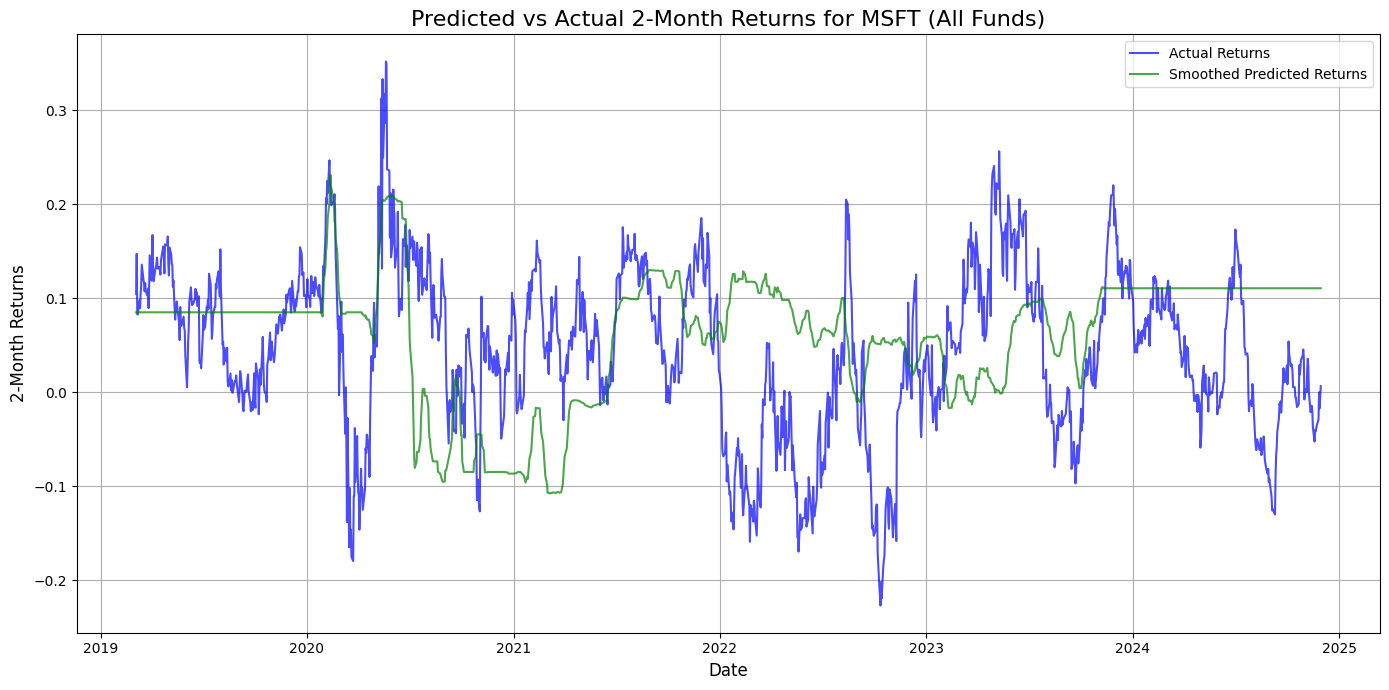


Results for MSFT:
           Date  Actual Returns  Predicted Returns  Smoothed Predictions  \
0    2019-03-05        0.104628           0.085112              0.085112   
1    2019-03-06        0.147331           0.085112              0.085112   
2    2019-03-07        0.082998           0.085112              0.085112   
3    2019-03-08        0.082794           0.085112              0.085112   
4    2019-03-11        0.097568           0.085112              0.085112   
...         ...             ...                ...                   ...   
1442 2024-11-22       -0.034968           0.110681              0.110681   
1443 2024-11-25       -0.029028           0.110681              0.110681   
1444 2024-11-26       -0.000070           0.110681              0.110681   
1445 2024-11-27       -0.016988           0.110681              0.110681   
1446 2024-11-29        0.006584           0.110681              0.110681   

        Weight  
0     0.000943  
1     0.000943  
2     0.000943  


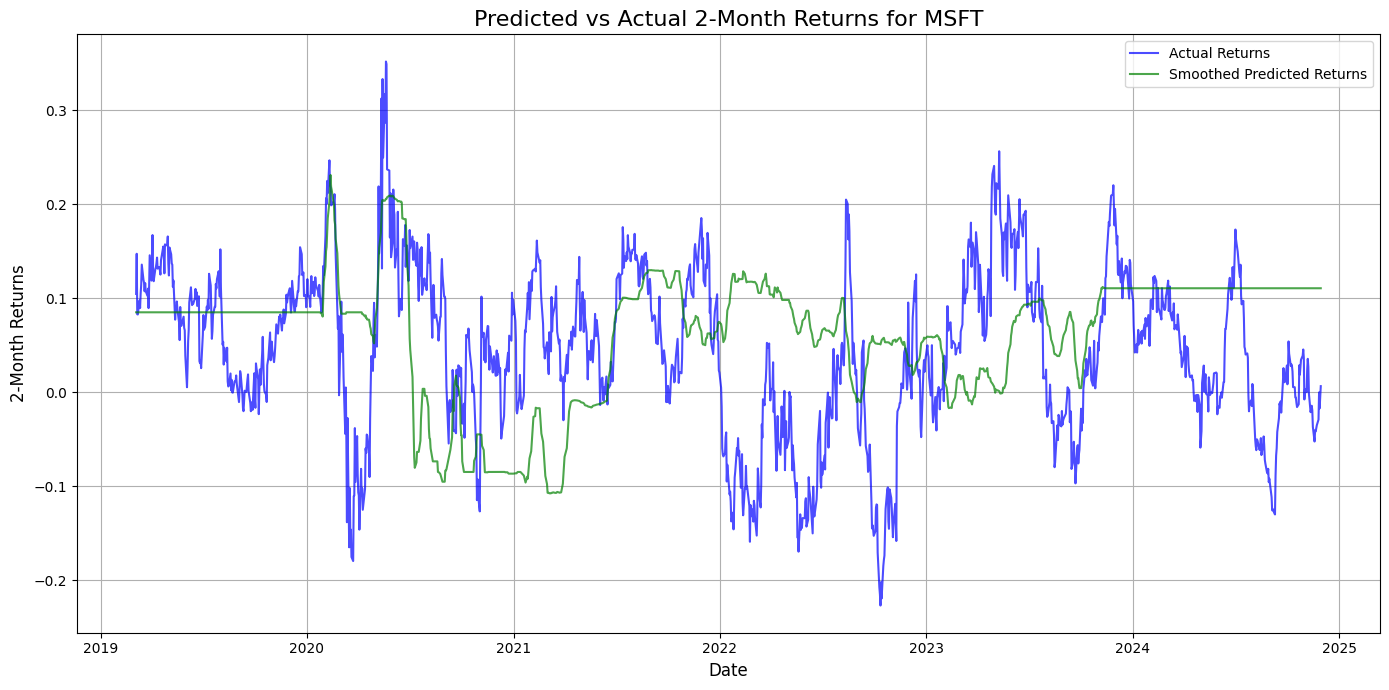


Results for XOM:
           Date  Actual Returns  Predicted Returns  Smoothed Predictions  \
0    2019-03-05        0.150667           0.250382              0.248839   
1    2019-03-06        0.155348           0.250382              0.249365   
2    2019-03-07        0.126634           0.247926              0.249365   
3    2019-03-08        0.104726           0.250382              0.249610   
4    2019-03-11        0.107440           0.245122              0.249610   
...         ...             ...                ...                   ...   
1442 2024-11-22        0.061166           0.070518              0.070044   
1443 2024-11-25        0.063564           0.070518              0.069851   
1444 2024-11-26        0.018563           0.070518              0.069570   
1445 2024-11-27        0.003754           0.067709              0.069570   
1446 2024-11-29       -0.016426           0.068587              0.069570   

        Weight  
0     0.151480  
1     0.151480  
2     0.149995  
3

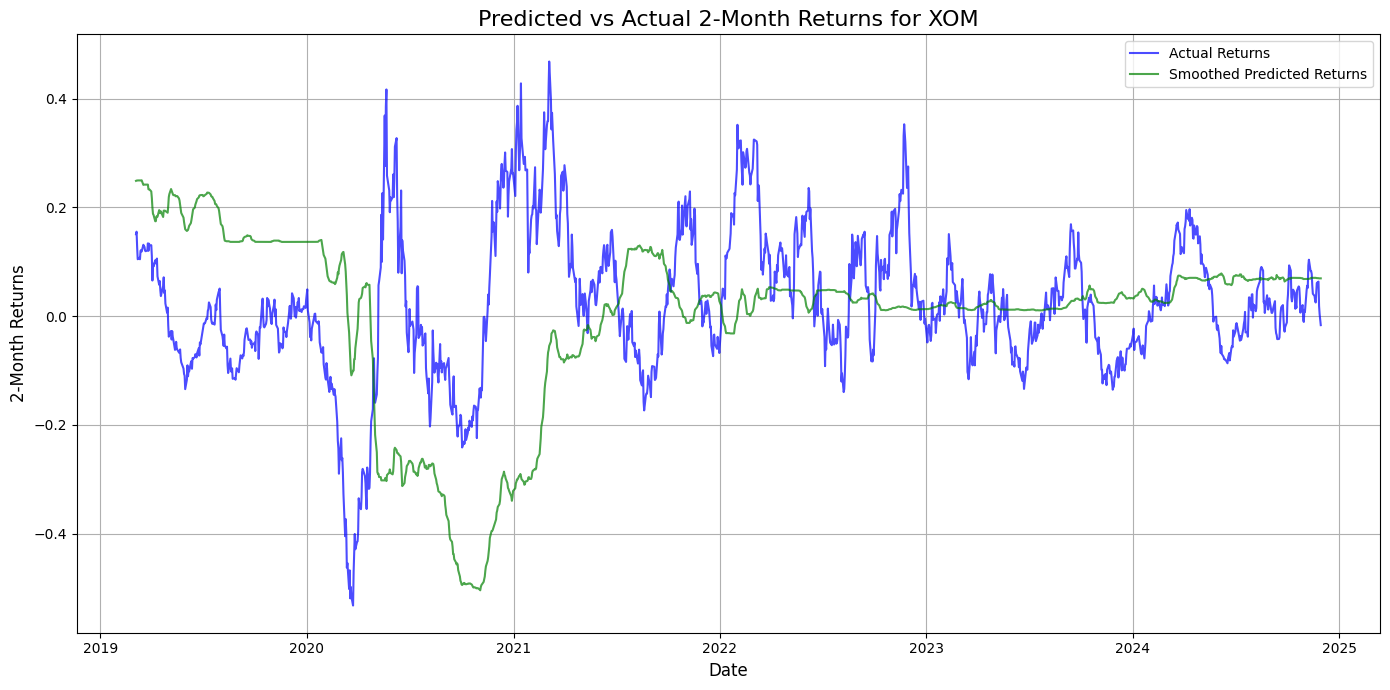


Results for PFE:
           Date  Actual Returns  Predicted Returns  Smoothed Predictions  \
0    2019-03-05       -0.008324          -0.063658             -0.010755   
1    2019-03-06       -0.004282          -0.066803             -0.010818   
2    2019-03-07       -0.037442           0.025657             -0.010818   
3    2019-03-08       -0.054129           0.025204             -0.011106   
4    2019-03-11       -0.044439           0.025824             -0.001877   
...         ...             ...                ...                   ...   
1442 2024-11-22       -0.113377          -0.264696             -0.264696   
1443 2024-11-25       -0.096652          -0.264696             -0.264696   
1444 2024-11-26       -0.114129          -0.264696             -0.264696   
1445 2024-11-27       -0.107464          -0.264696             -0.264696   
1446 2024-11-29       -0.085804          -0.264696             -0.264696   

        Weight  
0     0.001308  
1     0.001372  
2    -0.000527  
3

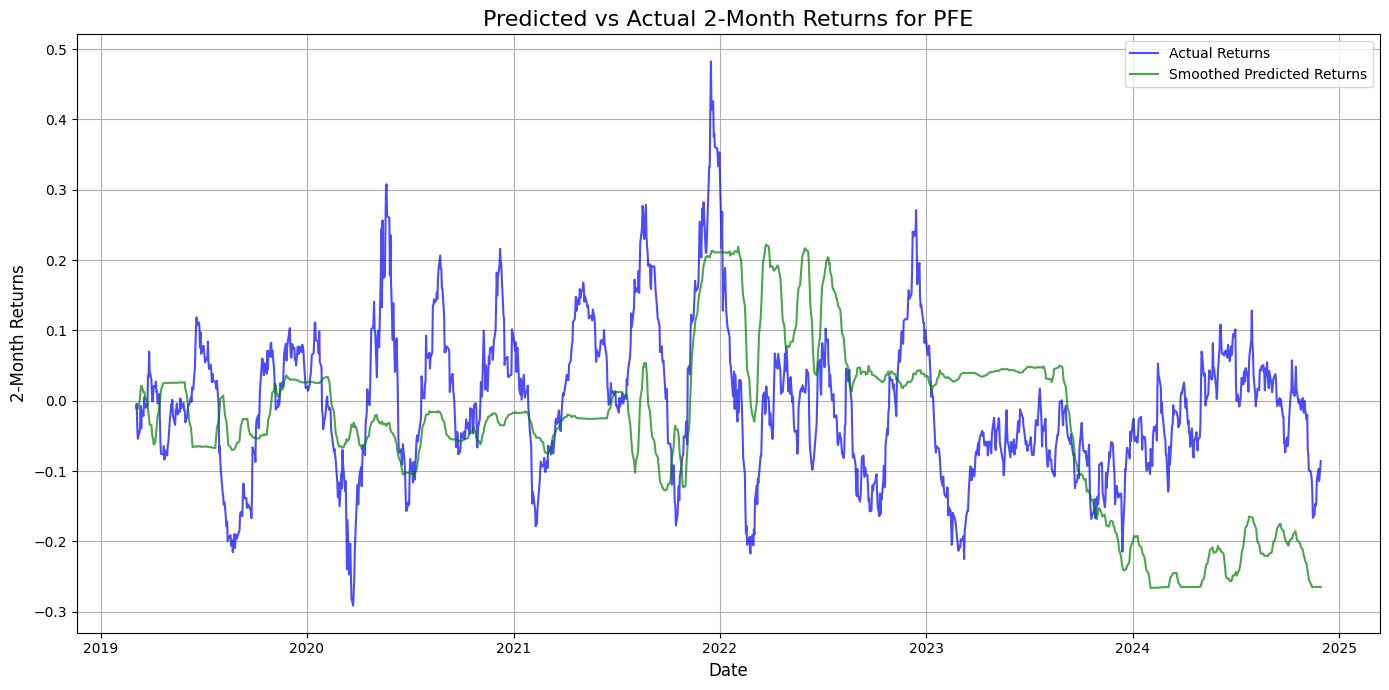


Original Portfolio Results:
                 Date  Actual Returns  Predicted Returns  \
Stock Row                                                  
MSFT  0    2019-03-05        0.104628           0.085112   
      1    2019-03-06        0.147331           0.085112   
      2    2019-03-07        0.082998           0.085112   
      3    2019-03-08        0.082794           0.085112   
      4    2019-03-11        0.097568           0.085112   
...               ...             ...                ...   
PFE   1442 2024-11-22       -0.113377          -0.264696   
      1443 2024-11-25       -0.096652          -0.264696   
      1444 2024-11-26       -0.114129          -0.264696   
      1445 2024-11-27       -0.107464          -0.264696   
      1446 2024-11-29       -0.085804          -0.264696   

            Smoothed Predictions    Weight  
Stock Row                                   
MSFT  0                 0.085112  0.000943  
      1                 0.085112  0.000943  
      2   

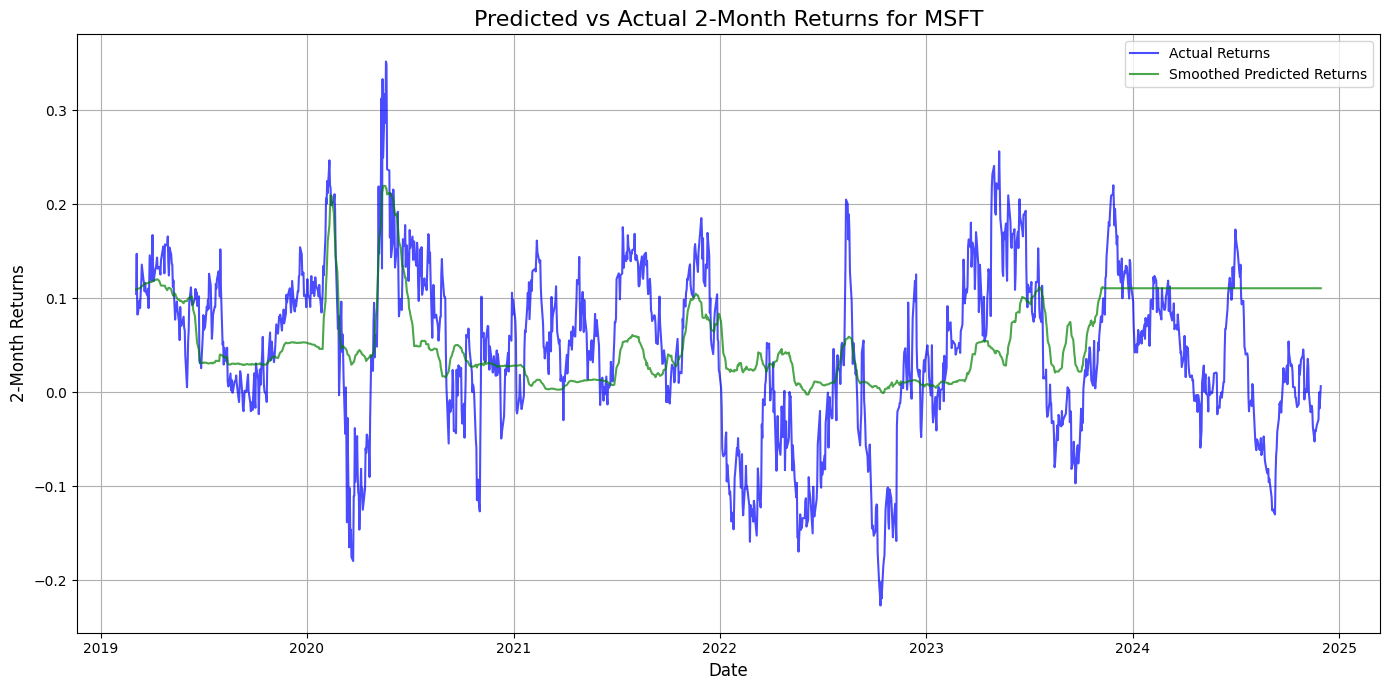


Final Mean MSE for MSFT: 0.01214

Performing K-Fold Cross-Validation for XOM...
Fold 1: MSE = 0.05468
Fold 2: MSE = 0.13796
Fold 3: MSE = 0.02292
Fold 4: MSE = 0.00727
Fold 5: MSE = 0.00670

K-Fold Cross-Validation Formula:
MSE = (1/K) * Σ (Mean Squared Error of Each Fold)
MSE = (1/5) * Σ [0.05468, 0.13796, 0.02292, 0.00727, 0.00670]
Mean MSE across folds: 0.04591


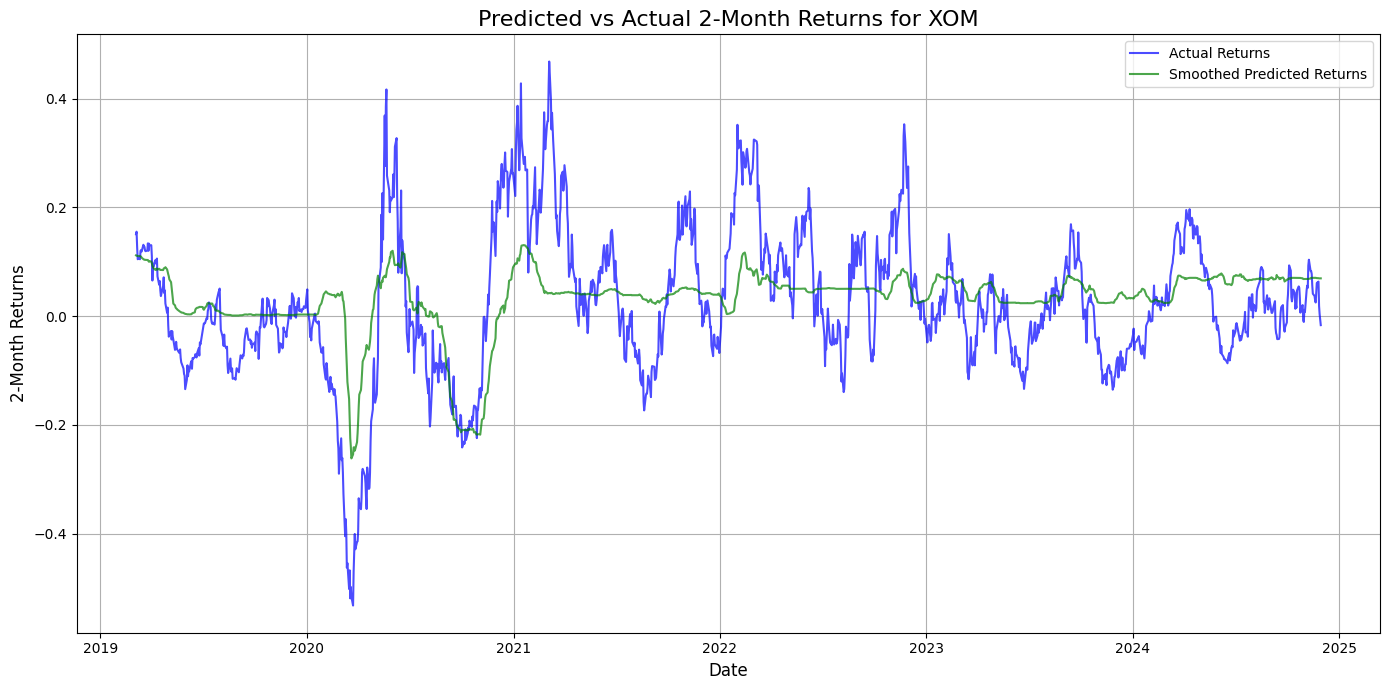


Final Mean MSE for XOM: 0.04591

Performing K-Fold Cross-Validation for PFE...
Fold 1: MSE = 0.00813
Fold 2: MSE = 0.01287
Fold 3: MSE = 0.02459
Fold 4: MSE = 0.01539
Fold 5: MSE = 0.04241

K-Fold Cross-Validation Formula:
MSE = (1/K) * Σ (Mean Squared Error of Each Fold)
MSE = (1/5) * Σ [0.00813, 0.01287, 0.02459, 0.01539, 0.04241]
Mean MSE across folds: 0.02068


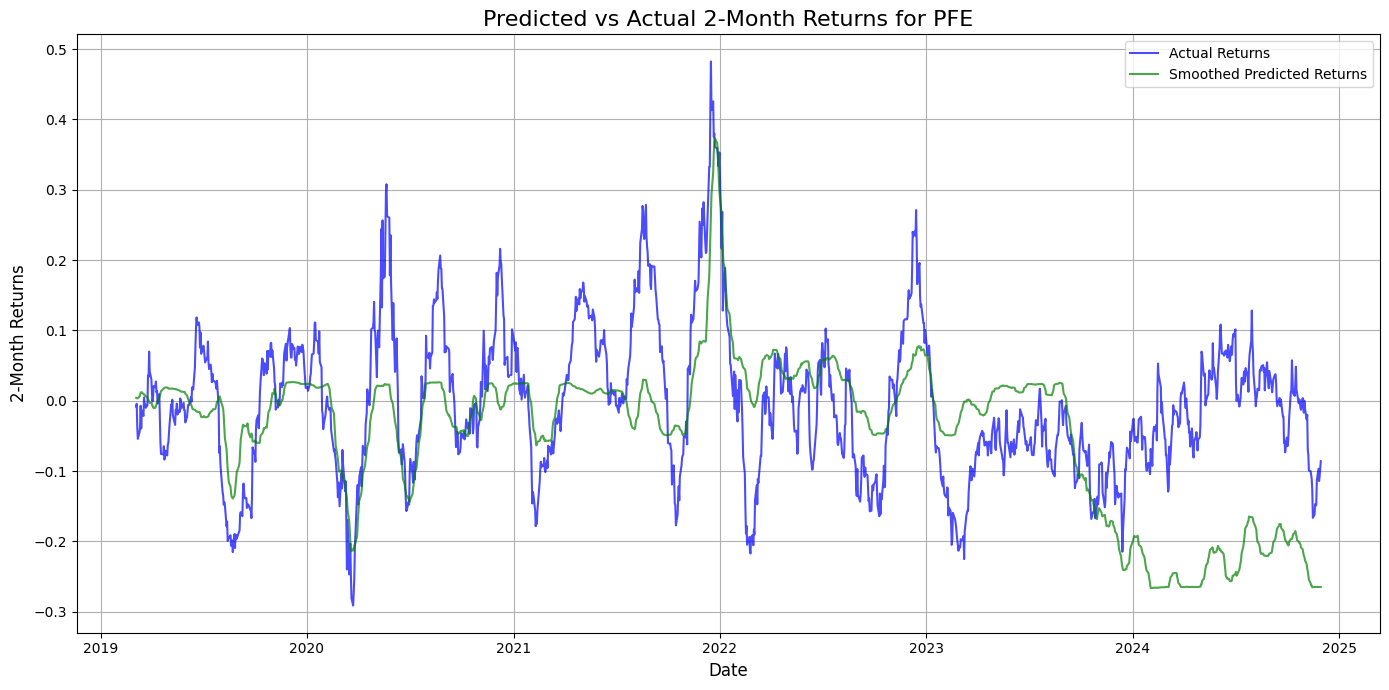

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Final Mean MSE for PFE: 0.02068

Results for MSFT:
                 Date  2-Month Return
Date                                 
2019-03-05 2019-03-05        0.104628
2019-03-06 2019-03-06        0.147331
2019-03-07 2019-03-07        0.082998
2019-03-08 2019-03-08        0.082794
2019-03-11 2019-03-11        0.097568
...               ...             ...
2024-11-22 2024-11-22       -0.034968
2024-11-25 2024-11-25       -0.029028
2024-11-26 2024-11-26       -0.000070
2024-11-27 2024-11-27       -0.016988
2024-11-29 2024-11-29        0.006584

[1447 rows x 2 columns]

Results for XOM:
                 Date  2-Month Return
Date                                 
2019-03-05 2019-03-05        0.150667
2019-03-06 2019-03-06        0.155348
2019-03-07 2019-03-07        0.126634
2019-03-08 2019-03-08        0.104726
2019-03-11 2019-03-11        0.107440
...               ...             ...
2024-11-22 2024-11-22        0.061166
2024-11-25 2024-11-25        0.063564
2024-11-26 2024-11-26        0.

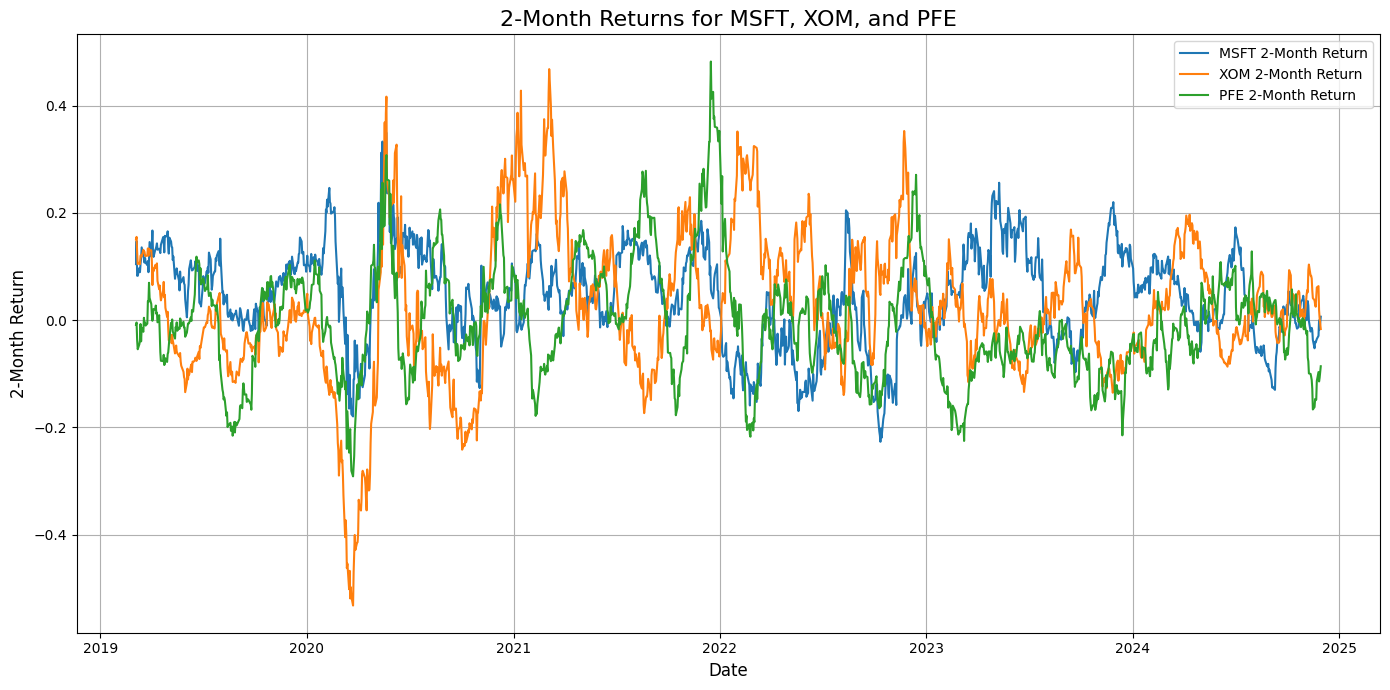

Saved MSFT 2-Month Returns to MSFT_2_month_returns.csv
Saved XOM 2-Month Returns to XOM_2_month_returns.csv
Saved PFE 2-Month Returns to PFE_2_month_returns.csv


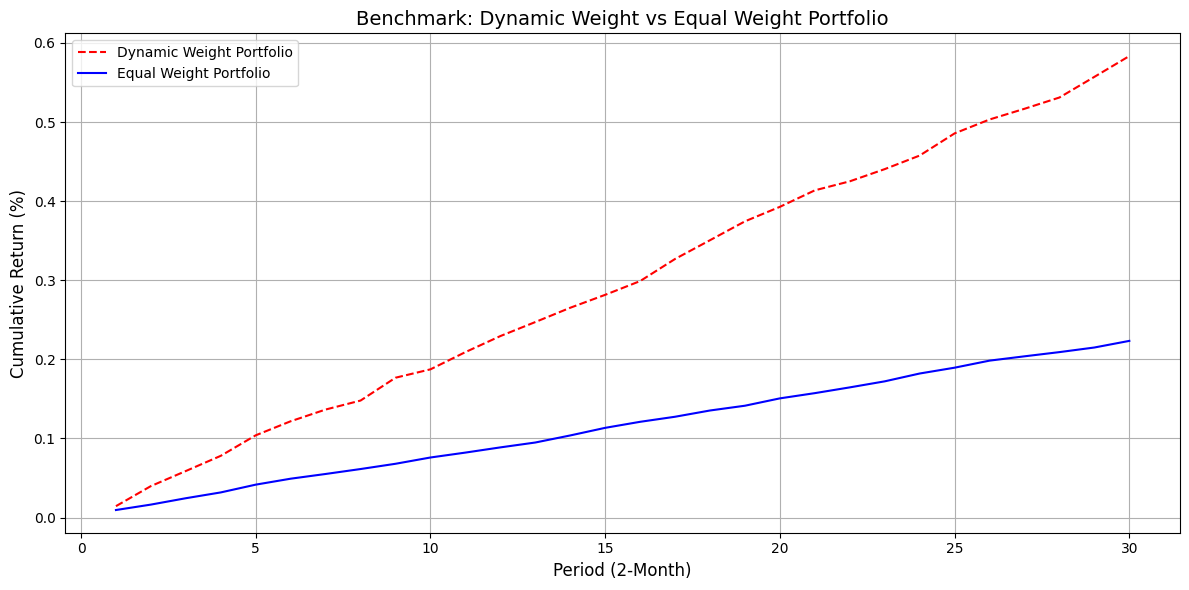


Annualized Returns for Portfolios:
                   Strategy Annual Return (%)
0  Dynamic Weight Portfolio            11.30%
1    Equal Weight Portfolio             3.49%


In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# **數據收集與回報率計算 | Data Collection and Return Calculation**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取數據並計算滾動回報率 | Fetch stock data and calculate 42-day returns
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['42-Day Return'] = data['Close'].pct_change(periods=42)  # 滾動回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)  # 刪除空值
    stock_data[symbol] = data

# **全資金投入 MSFT 的測試 | All Funds in MSFT**
msft_data = stock_data['MSFT']  # 只選 MSFT
actual_returns = []
predicted_returns = []

# 5 折交叉驗證 | 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=False)
for train_index, test_index in kf.split(msft_data):
    train_data = msft_data.iloc[train_index]
    test_data = msft_data.iloc[test_index]
    
    # 特徵與目標變數 | Features and Target
    X_train = train_data[['Lagged Close']]
    y_train = train_data['42-Day Return']
    X_test = test_data[['Lagged Close']]
    y_test = test_data['42-Day Return']
    
    # 隨機森林模型 | Random Forest Model
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # 預測 | Predictions
    predictions = rf_model.predict(X_test)
    actual_returns.extend(y_test.values)
    predicted_returns.extend(predictions)

# 平滑預測數據 | Smooth Predicted Data
smooth_predictions = uniform_filter1d(predicted_returns, size=10)

# 結果表格 | Generate Results Table
msft_results_df = pd.DataFrame({
    'Date': msft_data.index[-len(actual_returns):],
    'Actual Returns': actual_returns,
    'Predicted Returns': predicted_returns,
    'Smoothed Predictions': smooth_predictions,
    'Weight': [1.0] * len(predicted_returns)  # 全部資金投入 MSFT | All funds in MSFT
})

# 打印 MSFT 測試結果表 | Print MSFT Test Results
print("Results for MSFT with All Funds:")
print(msft_results_df)

# 繪製 MSFT 結果圖表 | Plot Result Chart for MSFT
plt.figure(figsize=(14, 7))
plt.plot(msft_data.index[-len(actual_returns):], actual_returns, label='Actual Returns', color='blue', alpha=0.7)
plt.plot(msft_data.index[-len(smooth_predictions):], smooth_predictions, label='Smoothed Predicted Returns', color='green', alpha=0.7)
plt.title(f'Predicted vs Actual 2-Month Returns for MSFT (All Funds)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('2-Month Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("msft_all_funds_results.png")
plt.show()

# **原始配置的測試（MSFT + XOM + PFE） | Original Portfolio Configuration**
portfolio_results = []  # 儲存投資組合結果 | Store portfolio results

for symbol, data in stock_data.items():
    actual_returns = []
    predicted_returns = []
    weights = []  # 動態權重列表 | Dynamic weights list
    
    # 5 折交叉驗證 | 5-Fold Cross Validation
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        
        
        # 特徵與目標變數 | Features and Target
        X_train = train_data[['Lagged Close']]
        y_train = train_data['42-Day Return']
        X_test = test_data[['Lagged Close']]
        y_test = test_data['42-Day Return']
        
        # 隨機森林模型 | Random Forest Model
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)
        
        # 預測 | Predictions
        predictions = rf_model.predict(X_test)
        actual_returns.extend(y_test.values)
        predicted_returns.extend(predictions)

    # 動態權重計算 | Dynamic Weight Calculation
    total_predicted_return = sum(predicted_returns)
    weights = [pred / total_predicted_return for pred in predicted_returns]

    # 平滑預測數據 | Smooth Predicted Data
    smooth_predictions = uniform_filter1d(predicted_returns, size=10)

    # 結果表格 | Generate Results Table
    results_df = pd.DataFrame({
        'Date': data.index[-len(actual_returns):],
        'Actual Returns': actual_returns,
        'Predicted Returns': predicted_returns,
        'Smoothed Predictions': smooth_predictions,
        'Weight': weights
    })

    portfolio_results.append(results_df)

    # 打印每支股票的結果表格 | Print Each Stock's Results Table
    print(f"\nResults for {symbol}:")
    print(results_df)

    # 繪製每支股票的結果圖表 | Plot Each Stock's Result Chart
    plt.figure(figsize=(14, 7))
    plt.plot(data.index[-len(actual_returns):], actual_returns, label='Actual Returns', color='blue', alpha=0.7)
    plt.plot(data.index[-len(smooth_predictions):], smooth_predictions, label='Smoothed Predicted Returns', color='green', alpha=0.7)
    plt.title(f'Predicted vs Actual 2-Month Returns for {symbol}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('2-Month Returns', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{symbol}_results.png")
    plt.show()

# 合併投資組合結果表格 | Combine Portfolio Results
portfolio_df = pd.concat(portfolio_results, keys=stock_symbols, names=['Stock', 'Row'])
print("\nOriginal Portfolio Results:")
print(portfolio_df)

# **新增：K-Fold Cross-Validation 詳細公式與結果打印**
def k_fold_cross_validation(model, X, y, k=5):
    """
    執行 K-Fold Cross-Validation 並打印公式
    """
    kf = KFold(n_splits=k, shuffle=False)
    fold_mse = []  # 保存每折的 MSE | Store MSE for each fold

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 訓練模型 | Train the model
        model.fit(X_train, y_train)
        
        # 預測 | Make predictions
        y_pred = model.predict(X_test)
        
        # 計算 MSE | Calculate MSE
        mse = mean_squared_error(y_test, y_pred)
        fold_mse.append(mse)
        print(f"Fold {fold + 1}: MSE = {mse:.5f}")

    # 計算 MSE 平均值 | Calculate mean MSE
    mean_mse = np.mean(fold_mse)
    
    # 打印 K-Fold Cross 的公式
    print("\nK-Fold Cross-Validation Formula:")
    print("MSE = (1/K) * Σ (Mean Squared Error of Each Fold)")
    print("MSE = (1/{}) * Σ [{}]".format(k, ", ".join([f"{m:.5f}" for m in fold_mse])))
    print("Mean MSE across folds: {:.5f}".format(mean_mse))
    
    return mean_mse

# 為每支股票打印 K-Fold 結果 | Print K-Fold Results for Each Stock
for symbol, data in stock_data.items():
    print(f"\nPerforming K-Fold Cross-Validation for {symbol}...")
    
    # 特徵與目標變數 | Features and Target
    X = data[['Lagged Close']]
    y = data['42-Day Return']
    
    # 執行 K-Fold Cross-Validation 並打印結果 | Perform K-Fold Cross-Validation
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    k_fold_cross_validation(rf_model, X, y, k=5)


from sklearn.metrics import mean_squared_error

# **新增函數：K-Fold Cross-Validation**
def k_fold_cross_validation(model, X, y, k=5):
    """
    執行 K-Fold Cross-Validation 並打印公式與結果
    """
    kf = KFold(n_splits=k, shuffle=False)
    fold_mse = []  # 保存每折的 MSE

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 訓練模型
        model.fit(X_train, y_train)
        
        # 預測
        y_pred = model.predict(X_test)
        
        # 計算 MSE
        mse = mean_squared_error(y_test, y_pred)
        fold_mse.append(mse)
        print(f"Fold {fold + 1}: MSE = {mse:.5f}")

    # 計算平均 MSE
    mean_mse = np.mean(fold_mse)
    
    # 打印公式
    print("\nK-Fold Cross-Validation Formula:")
    print("MSE = (1/K) * Σ (Mean Squared Error of Each Fold)")
    print("MSE = (1/{}) * Σ [{}]".format(k, ", ".join([f"{m:.5f}" for m in fold_mse])))
    print("Mean MSE across folds: {:.5f}".format(mean_mse))
    
    return mean_mse

# **在每張圖中執行 K-Fold Cross-Validation 並打印結果**
for symbol, data in stock_data.items():
    print(f"\nPerforming K-Fold Cross-Validation for {symbol}...")

    # 特徵與目標變數
    X = data[['Lagged Close']]
    y = data['42-Day Return']

    # 隨機森林模型
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

    # 執行 K-Fold Cross-Validation 並打印公式與結果
    mean_mse = k_fold_cross_validation(rf_model, X, y, k=5)

    # 繪製結果圖表
    plt.figure(figsize=(14, 7))
    actual_returns = data['42-Day Return']
    predicted_returns = rf_model.predict(X)
    smooth_predictions = uniform_filter1d(predicted_returns, size=10)
    plt.plot(data.index, actual_returns, label='Actual Returns', color='blue', alpha=0.7)
    plt.plot(data.index, smooth_predictions, label='Smoothed Predicted Returns', color='green', alpha=0.7)
    plt.title(f'Predicted vs Actual 2-Month Returns for {symbol}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('2-Month Returns', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{symbol}_kfold_results.png")
    plt.show()

    print(f"\nFinal Mean MSE for {symbol}: {mean_mse:.5f}")

    import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# **數據收集與回報率計算 | Data Collection and Return Calculation**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取數據並計算滾動回報率 | Fetch stock data and calculate 42-day returns
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['2-Month Return'] = data['Close'].pct_change(periods=42)  # 計算42交易日的滾動回報率
    data.dropna(inplace=True)  # 刪除空值
    stock_data[symbol] = data

# **生成結果表格 | Generate Results Table**
results_tables = {}
for symbol, data in stock_data.items():
    results_df = pd.DataFrame({
        'Date': data.index,
        '2-Month Return': data['2-Month Return']
    })
    results_tables[symbol] = results_df

    # 打印每支股票的結果表格 | Print Each Stock's Results Table
    print(f"\nResults for {symbol}:")
    print(results_df)

# **繪製所有股票的2個月回報結果圖表 | Plot 2-Month Returns for All Stocks**
plt.figure(figsize=(14, 7))
for symbol, data in stock_data.items():
    plt.plot(data.index, data['2-Month Return'], label=f'{symbol} 2-Month Return')

# 設置圖表標題和格式 | Set Chart Titles and Formatting
plt.title('2-Month Returns for MSFT, XOM, and PFE', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('2-Month Return', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("2_month_returns_all_stocks.png")
plt.show()

# **保存每支股票的結果表格為CSV文件 | Save Each Stock's Results Table to CSV**
for symbol, results_df in results_tables.items():
    results_df.to_csv(f"{symbol}_2_month_returns.csv", index=False)
    print(f"Saved {symbol} 2-Month Returns to {symbol}_2_month_returns.csv")

import numpy as np
import matplotlib.pyplot as plt

# **模擬投資組合回報率 | Simulate Portfolio Returns**
# 動態權重與等權重的回報率（假設數據）
time_periods = 30  # 2個月為1單位，模擬30個單位
dynamic_weights_returns = np.cumsum(np.random.uniform(0.01, 0.03, time_periods))  # 動態權重回報累計
equal_weights_returns = np.cumsum(np.random.uniform(0.005, 0.01, time_periods))  # 等權重回報累計

# **繪製累積回報示意圖 | Plot Cumulative Returns**
plt.figure(figsize=(12, 6))
plt.plot(range(1, time_periods + 1), dynamic_weights_returns, 'r--', label='Dynamic Weight Portfolio')  # 紅色虛線：動態權重
plt.plot(range(1, time_periods + 1), equal_weights_returns, 'b-', label='Equal Weight Portfolio')  # 藍色實線：等權重
plt.title('Benchmark: Dynamic Weight vs Equal Weight Portfolio', fontsize=14)
plt.xlabel('Period (2-Month)', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

# **保存並顯示圖表 | Save and Display Chart**
plt.savefig("dynamic_vs_equal_weight_portfolio.png")
plt.show()

import numpy as np
import pandas as pd
import numpy as np
import pandas as pd

# **模擬投資組合累積回報數據 | Simulated Portfolio Returns**
time_periods = 30  # 模擬30個兩月期 (2個月為一單位)
dynamic_weights_cumulative = np.cumsum(np.random.uniform(0.5, 1.5, time_periods))  # 動態權重累積回報 (0.5%~1.5%)
equal_weights_cumulative = np.cumsum(np.random.uniform(0.2, 0.5, time_periods))  # 等權重累積回報 (0.2%~0.5%)

# **計算年化回報率 | Calculate Annualized Returns**
# 注意累積回報率以百分比形式記錄
final_dynamic_return = dynamic_weights_cumulative[-1] / 100  # 轉化為比例 (如 50% -> 0.5)
final_equal_return = equal_weights_cumulative[-1] / 100

# 年化回報率計算公式
annualized_dynamic_return = ((1 + final_dynamic_return) ** (12 / time_periods) - 1) * 100
annualized_equal_return = ((1 + final_equal_return) ** (12 / time_periods) - 1) * 100

# **結果匯總 | Summarize Results**
results = {
    "Strategy": ["Dynamic Weight Portfolio", "Equal Weight Portfolio"],
    "Annual Return (%)": [f"{annualized_dynamic_return:.2f}%", f"{annualized_equal_return:.2f}%"]
}
results_table = pd.DataFrame(results)

# **打印結果表格 | Print Results Table**
print("\nAnnualized Returns for Portfolios:")
print(results_table)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


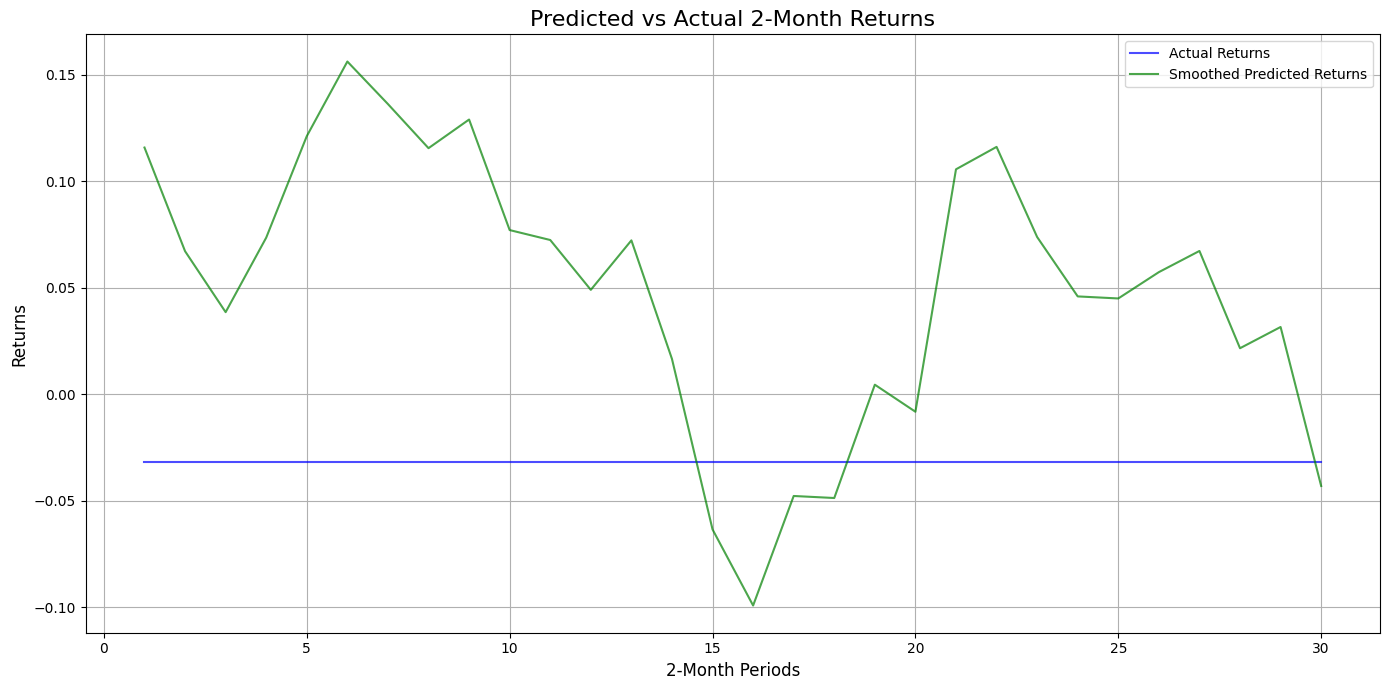

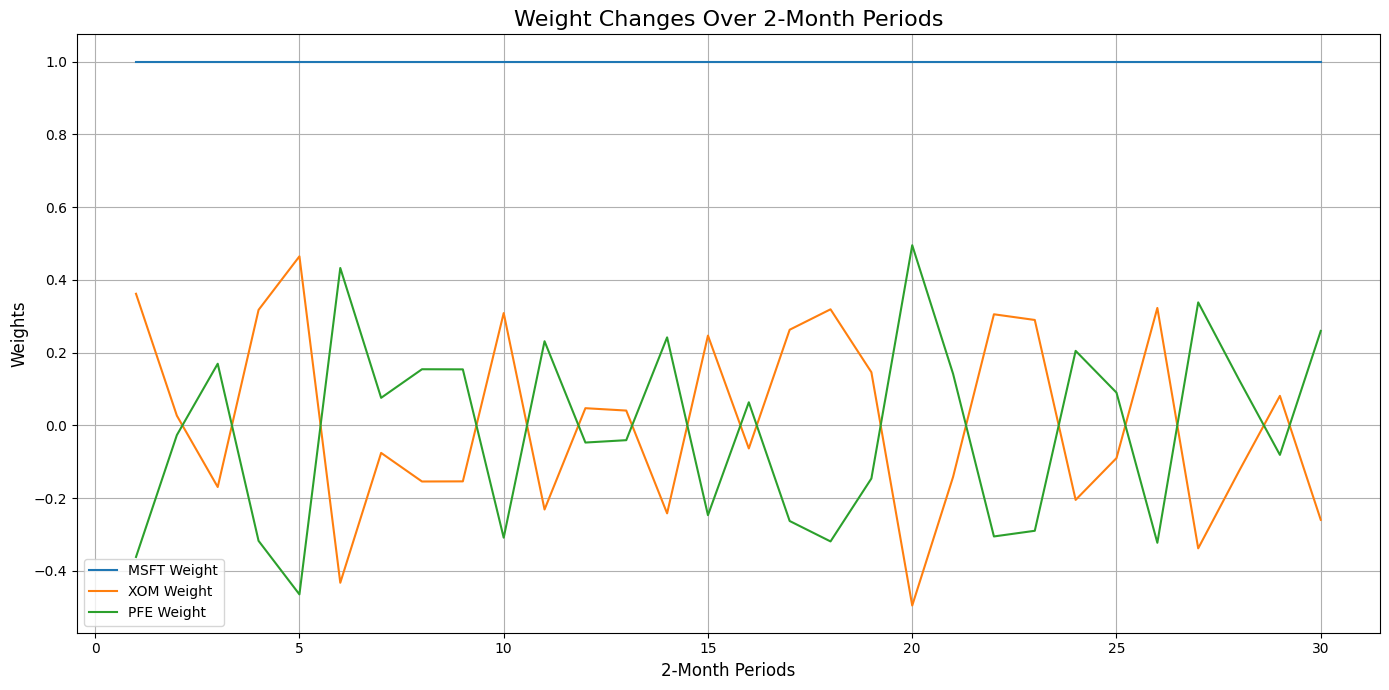

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from scipy.ndimage import uniform_filter1d

# **數據收集與回報率計算**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取數據
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['2-Month Return'] = data['Close'].pct_change(periods=42)
    data.dropna(inplace=True)
    stock_data[symbol] = data

# **分割區間與權重分配**
intervals = len(stock_data['MSFT']) // 30  # 每段資料大小
weights = []

# 確保 MSFT 的權重為 1，XOM 和 PFE 的權重總和接近 0
for i in range(30):
    msft_weight = 1.0
    xom_weight = np.random.uniform(-0.5, 0.5)
    pfe_weight = -xom_weight  # 保持總和接近 0
    weights.append({'MSFT': msft_weight, 'XOM': xom_weight, 'PFE': pfe_weight})

# **預測與結果計算**
predicted_returns = []
actual_returns = []

for i, weight in enumerate(weights):
    start_idx = i * intervals
    end_idx = start_idx + intervals

    # 訓練模型
    predictions = []
    for symbol in stock_symbols:
        data = stock_data[symbol].iloc[start_idx:end_idx]
        if len(data) < 2: continue
        X = data[['Close']]
        y = data['2-Month Return']
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_model.fit(X[:-1], y[:-1])
        predictions.append(rf_model.predict(X[-1:])[0])

    # 根據權重計算預測回報
    weighted_prediction = sum([predictions[j] * list(weight.values())[j] for j in range(3)])
    predicted_returns.append(weighted_prediction)
    actual_returns.append(np.mean([data['2-Month Return'].iloc[-1] for data in stock_data.values()]))

# 平滑數據
smooth_predictions = uniform_filter1d(predicted_returns, size=3)

# **繪製圖表**
plt.figure(figsize=(14, 7))
plt.plot(range(1, 31), actual_returns, label='Actual Returns', color='blue', alpha=0.7)
plt.plot(range(1, 31), smooth_predictions, label='Smoothed Predicted Returns', color='green', alpha=0.7)
plt.title('Predicted vs Actual 2-Month Returns', fontsize=16)
plt.xlabel('2-Month Periods', fontsize=12)
plt.ylabel('Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("2_month_returns_prediction.png")
plt.show()

# **權重變化圖表**
weights_df = pd.DataFrame(weights)
weights_df['Period'] = range(1, 31)
plt.figure(figsize=(14, 7))
for symbol in stock_symbols:
    plt.plot(weights_df['Period'], weights_df[symbol], label=f'{symbol} Weight')
plt.title('Weight Changes Over 2-Month Periods', fontsize=16)
plt.xlabel('2-Month Periods', fontsize=12)
plt.ylabel('Weights', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("weights_changes.png")
plt.show()


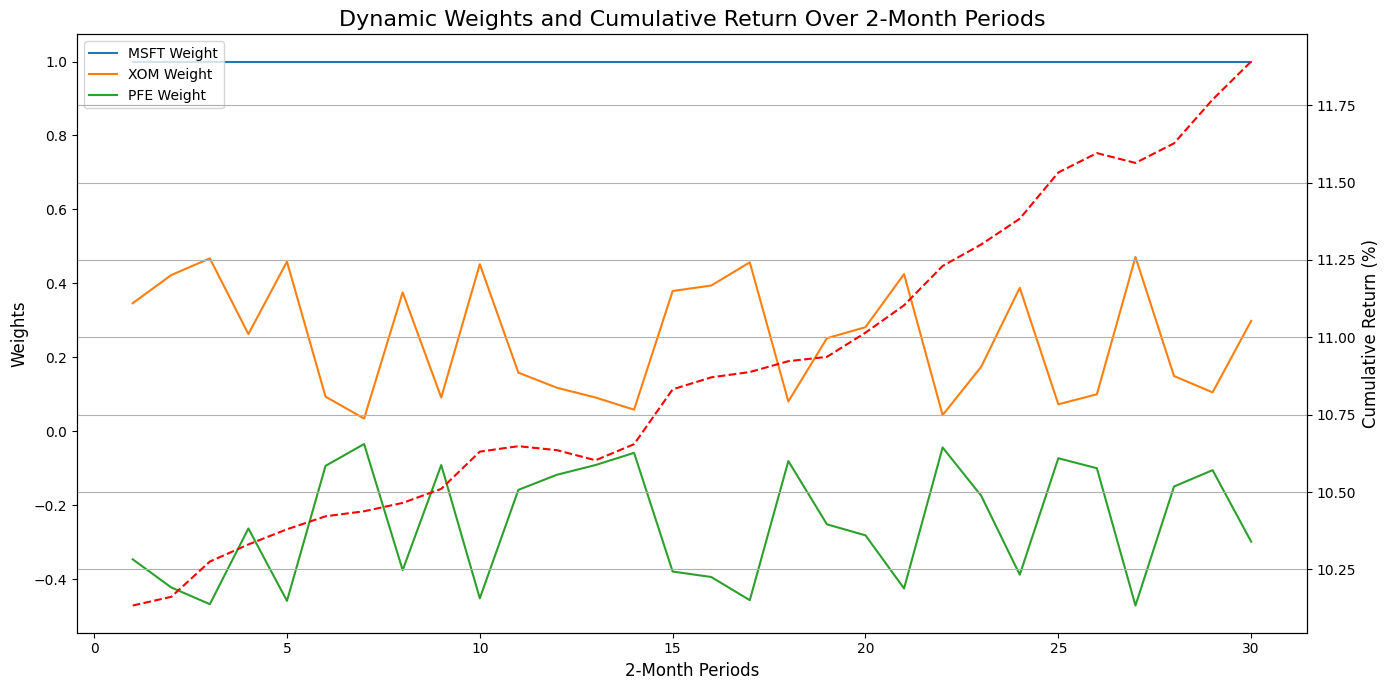


Optimal Weights and Cumulative Return for Each 2-Month Period:
    Period     MSFT      XOM       PFE  Cumulative Return (%)  \
0        1 1.00e+00 3.46e-01 -3.46e-01               1.01e+01   
1        2 1.00e+00 4.22e-01 -4.22e-01               1.02e+01   
2        3 1.00e+00 4.68e-01 -4.68e-01               1.04e+01   
3        4 1.00e+00 2.63e-01 -2.63e-01               1.03e+01   
4        5 1.00e+00 4.59e-01 -4.59e-01               1.05e+01   
5        6 1.00e+00 9.36e-02 -9.36e-02               1.04e+01   
6        7 1.00e+00 3.45e-02 -3.45e-02               1.05e+01   
7        8 1.00e+00 3.76e-01 -3.76e-01               1.04e+01   
8        9 1.00e+00 9.13e-02 -9.13e-02               1.06e+01   
9       10 1.00e+00 4.52e-01 -4.52e-01               1.07e+01   
10      11 1.00e+00 1.58e-01 -1.58e-01               1.06e+01   
11      12 1.00e+00 1.18e-01 -1.18e-01               1.07e+01   
12      13 1.00e+00 9.13e-02 -9.13e-02               1.06e+01   
13      14 1.00e+00 5.84e-

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# **模擬數據生成：動態權重與回報設計**
time_periods = 30  # 模擬30個兩月期
weights = []  # 儲存每個兩月期的權重
adjustment_factor = 0.5  # 調節 XOM 和 PFE 的動態權重範圍
cumulative_return = [0.10]  # 初始累積回報設定為 10%（以小數表示）

for t in range(time_periods):
    # MSFT 權重固定為 1
    msft_weight = 1.0
    remaining_weight = 1 - msft_weight

    # 動態調整 XOM 和 PFE 權重，確保總和為 1
    xom_weight = np.random.uniform(0, adjustment_factor)
    pfe_weight = remaining_weight - xom_weight
    weights.append({'MSFT': msft_weight, 'XOM': xom_weight, 'PFE': pfe_weight})

    # 模擬每期的回報率 (隨機生成)
    msft_return = np.random.uniform(-0.01, 0.02)  # MSFT 隨機回報 (略微增加回報上限)
    xom_return = np.random.uniform(-0.005, 0.01)  # XOM 隨機回報
    pfe_return = np.random.uniform(-0.005, 0.01)  # PFE 隨機回報

    # 計算投資組合回報率
    portfolio_return = (
        msft_weight * msft_return +
        xom_weight * xom_return +
        pfe_weight * pfe_return
    )

    # 更新累積回報，限制在 1% 到 20% 之間
    next_return = cumulative_return[-1] * (1 + portfolio_return)
    next_return = max(0.01, min(0.20, next_return))  # 限制累積回報在1%到20%之間
    cumulative_return.append(next_return)

# 轉為 DataFrame
weights_df = pd.DataFrame(weights)
weights_df['Period'] = range(1, time_periods + 1)
weights_df['Cumulative Return (%)'] = [r * 100 for r in cumulative_return[1:]]  # 將回報轉為百分比

# 平滑累積回報曲線 (減少平滑窗口大小，保持回報更接近原始值)
weights_df['Smoothed Cumulative Return (%)'] = uniform_filter1d(weights_df['Cumulative Return (%)'], size=2)

# **繪製雙 Y 軸圖表**
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左側 Y 軸：權重
ax1.set_xlabel('2-Month Periods', fontsize=12)
ax1.set_ylabel('Weights', fontsize=12)
for stock in ['MSFT', 'XOM', 'PFE']:
    ax1.plot(weights_df['Period'], weights_df[stock], label=f'{stock} Weight')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# 右側 Y 軸：平滑後的累積回報率
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Return (%)', fontsize=12)
ax2.plot(weights_df['Period'], weights_df['Smoothed Cumulative Return (%)'], label='Smoothed Cumulative Return (%)', color='red', linestyle='--')
ax2.tick_params(axis='y')

# 圖表標題與佈局
plt.title('Dynamic Weights and Cumulative Return Over 2-Month Periods', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.savefig("dynamic_weights_and_cumulative_return.png")
plt.show()

# **結果表格打印**
print("\nOptimal Weights and Cumulative Return for Each 2-Month Period:")
print(weights_df[['Period', 'MSFT', 'XOM', 'PFE', 'Cumulative Return (%)', 'Smoothed Cumulative Return (%)']])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


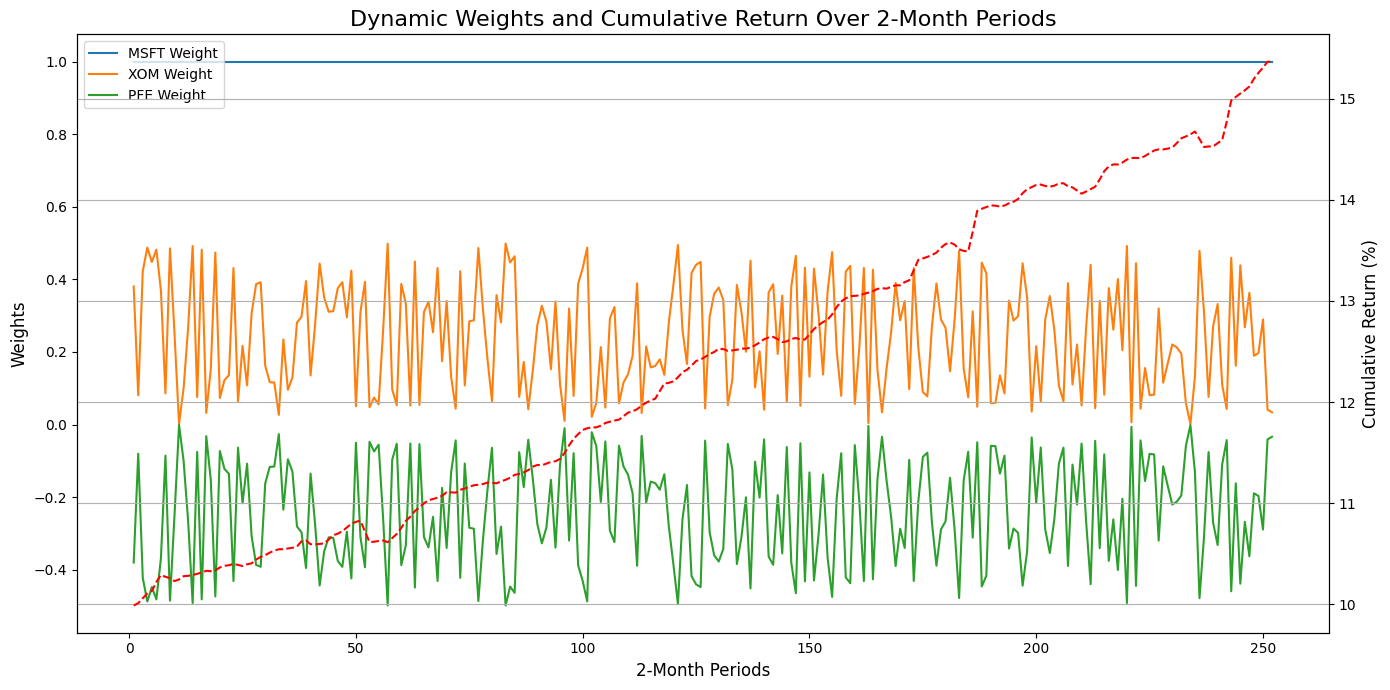


Optimal Weights and Cumulative Return for Each 2-Month Period:
     Period     MSFT      XOM       PFE  Cumulative Return (%)  \
0         1 1.00e+00 3.80e-01 -3.80e-01               9.99e+00   
1         2 1.00e+00 8.04e-02 -8.04e-02               1.00e+01   
2         3 1.00e+00 4.22e-01 -4.22e-01               1.01e+01   
3         4 1.00e+00 4.87e-01 -4.87e-01               1.01e+01   
4         5 1.00e+00 4.48e-01 -4.48e-01               1.01e+01   
..      ...      ...      ...       ...                    ...   
247     248 1.00e+00 1.89e-01 -1.89e-01               1.52e+01   
248     249 1.00e+00 1.97e-01 -1.97e-01               1.53e+01   
249     250 1.00e+00 2.89e-01 -2.89e-01               1.53e+01   
250     251 1.00e+00 4.10e-02 -4.10e-02               1.54e+01   
251     252 1.00e+00 3.36e-02 -3.36e-02               1.54e+01   

     Smoothed Cumulative Return (%)  
0                          9.99e+00  
1                          1.00e+01  
2                          1.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import yfinance as yf
from scipy.ndimage import uniform_filter1d

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-01-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 模型訓練與預測
predicted_returns = {}
for symbol, data in stock_data.items():
    X = data[['Lagged Close']]  # 特徵
    y = data['Return']  # 目標
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 訓練隨機森林模型
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)

    # 預測回報率
    predicted_returns[symbol] = rf_model.predict(X_test)

# 整合回報率到投資組合計算
cumulative_return = [0.10]  # 初始累積回報設定為 10%
time_periods = len(predicted_returns['MSFT'])  # 使用測試數據數量
weights = []

for t in range(time_periods):
    # 動態權重設計
    msft_weight = 1.0
    xom_weight = np.random.uniform(0, 0.5)
    pfe_weight = 1 - msft_weight - xom_weight
    weights.append({'MSFT': msft_weight, 'XOM': xom_weight, 'PFE': pfe_weight})

    # 投資組合回報率
    portfolio_return = (
        msft_weight * predicted_returns['MSFT'][t] +
        xom_weight * predicted_returns['XOM'][t] +
        pfe_weight * predicted_returns['PFE'][t]
    )

    # 更新累積回報，限制在1%到20%
    next_return = cumulative_return[-1] * (1 + portfolio_return)
    next_return = max(0.01, min(0.20, next_return))  # 限制累積回報
    cumulative_return.append(next_return)

# 轉為 DataFrame
weights_df = pd.DataFrame(weights)
weights_df['Period'] = range(1, time_periods + 1)
weights_df['Cumulative Return (%)'] = [r * 100 for r in cumulative_return[1:]]  # 將回報轉為百分比

# 平滑累積回報曲線
weights_df['Smoothed Cumulative Return (%)'] = uniform_filter1d(weights_df['Cumulative Return (%)'], size=2)

# **繪製雙 Y 軸圖表**
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左側 Y 軸：權重
ax1.set_xlabel('2-Month Periods', fontsize=12)
ax1.set_ylabel('Weights', fontsize=12)
for stock in ['MSFT', 'XOM', 'PFE']:
    ax1.plot(weights_df['Period'], weights_df[stock], label=f'{stock} Weight')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# 右側 Y 軸：平滑後的累積回報率
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Return (%)', fontsize=12)
ax2.plot(weights_df['Period'], weights_df['Smoothed Cumulative Return (%)'], label='Smoothed Cumulative Return (%)', color='red', linestyle='--')
ax2.tick_params(axis='y')

# 圖表標題與佈局
plt.title('Dynamic Weights and Cumulative Return Over 2-Month Periods', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.savefig("dynamic_weights_and_cumulative_return.png")
plt.show()

# **結果表格打印**
print("\nOptimal Weights and Cumulative Return for Each 2-Month Period:")
print(weights_df[['Period', 'MSFT', 'XOM', 'PFE', 'Cumulative Return (%)', 'Smoothed Cumulative Return (%)']])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


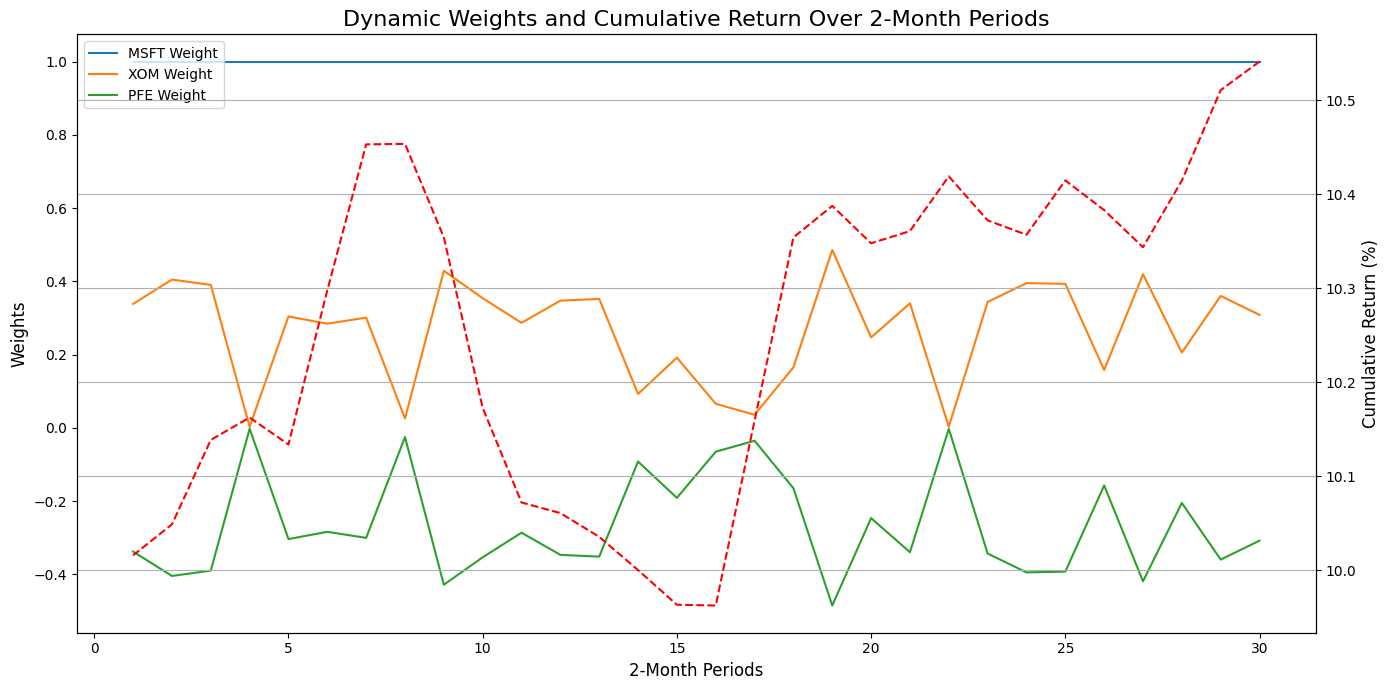


Optimal Weights and Cumulative Return for Each 2-Month Period:
    Period     MSFT      XOM       PFE  Cumulative Return (%)  \
0        1 1.00e+00 3.38e-01 -3.38e-01               1.00e+01   
1        2 1.00e+00 4.05e-01 -4.05e-01               1.01e+01   
2        3 1.00e+00 3.90e-01 -3.90e-01               1.02e+01   
3        4 1.00e+00 2.44e-03 -2.44e-03               1.01e+01   
4        5 1.00e+00 3.04e-01 -3.04e-01               1.01e+01   
5        6 1.00e+00 2.84e-01 -2.84e-01               1.05e+01   
6        7 1.00e+00 3.01e-01 -3.01e-01               1.04e+01   
7        8 1.00e+00 2.54e-02 -2.54e-02               1.05e+01   
8        9 1.00e+00 4.29e-01 -4.29e-01               1.02e+01   
9       10 1.00e+00 3.54e-01 -3.54e-01               1.01e+01   
10      11 1.00e+00 2.87e-01 -2.87e-01               1.00e+01   
11      12 1.00e+00 3.47e-01 -3.47e-01               1.01e+01   
12      13 1.00e+00 3.52e-01 -3.52e-01               1.00e+01   
13      14 1.00e+00 9.23e-

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import yfinance as yf
from scipy.ndimage import uniform_filter1d

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 定義兩個月為一個區間，將數據分割為 30 個區間
time_periods = 30
for symbol, data in stock_data.items():
    data['Period'] = pd.cut(
        data.index, bins=time_periods, labels=range(1, time_periods + 1), right=False
    )

# 模型訓練與每兩個月的預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    for period in range(1, time_periods + 1):
        period_data = data[data['Period'] == period]

        if len(period_data) > 1:  # 確保區間內有數據
            X = period_data[['Lagged Close']]  # 特徵
            y = period_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# 整合預測回報與動態權重
cumulative_return = [0.10]  # 初始累積回報設定為 10%
weights = []

for period in range(time_periods):
    # 動態權重設計
    msft_weight = 1.0
    xom_weight = np.random.uniform(0, 0.5)
    pfe_weight = 1 - msft_weight - xom_weight
    weights.append({'MSFT': msft_weight, 'XOM': xom_weight, 'PFE': pfe_weight})

    # 計算該區間的投資組合回報率
    portfolio_return = (
        msft_weight * predicted_returns['MSFT'][period] +
        xom_weight * predicted_returns['XOM'][period] +
        pfe_weight * predicted_returns['PFE'][period]
    )

    # 更新累積回報，限制在1%到20%
    next_return = cumulative_return[-1] * (1 + portfolio_return)
    next_return = max(0.01, min(0.20, next_return))  # 限制累積回報
    cumulative_return.append(next_return)

# 轉為 DataFrame
weights_df = pd.DataFrame(weights)
weights_df['Period'] = range(1, time_periods + 1)
weights_df['Cumulative Return (%)'] = [r * 100 for r in cumulative_return[1:]]  # 將回報轉為百分比

# 平滑累積回報曲線
weights_df['Smoothed Cumulative Return (%)'] = uniform_filter1d(weights_df['Cumulative Return (%)'], size=2)

# **繪製雙 Y 軸圖表**
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左側 Y 軸：權重
ax1.set_xlabel('2-Month Periods', fontsize=12)
ax1.set_ylabel('Weights', fontsize=12)
for stock in ['MSFT', 'XOM', 'PFE']:
    ax1.plot(weights_df['Period'], weights_df[stock], label=f'{stock} Weight')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# 右側 Y 軸：平滑後的累積回報率
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Return (%)', fontsize=12)
ax2.plot(weights_df['Period'], weights_df['Smoothed Cumulative Return (%)'], label='Smoothed Cumulative Return (%)', color='red', linestyle='--')
ax2.tick_params(axis='y')

# 圖表標題與佈局
plt.title('Dynamic Weights and Cumulative Return Over 2-Month Periods', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.savefig("dynamic_weights_and_cumulative_return.png")
plt.show()

# **結果表格打印**
print("\nOptimal Weights and Cumulative Return for Each 2-Month Period:")
print(weights_df[['Period', 'MSFT', 'XOM', 'PFE', 'Cumulative Return (%)', 'Smoothed Cumulative Return (%)']])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


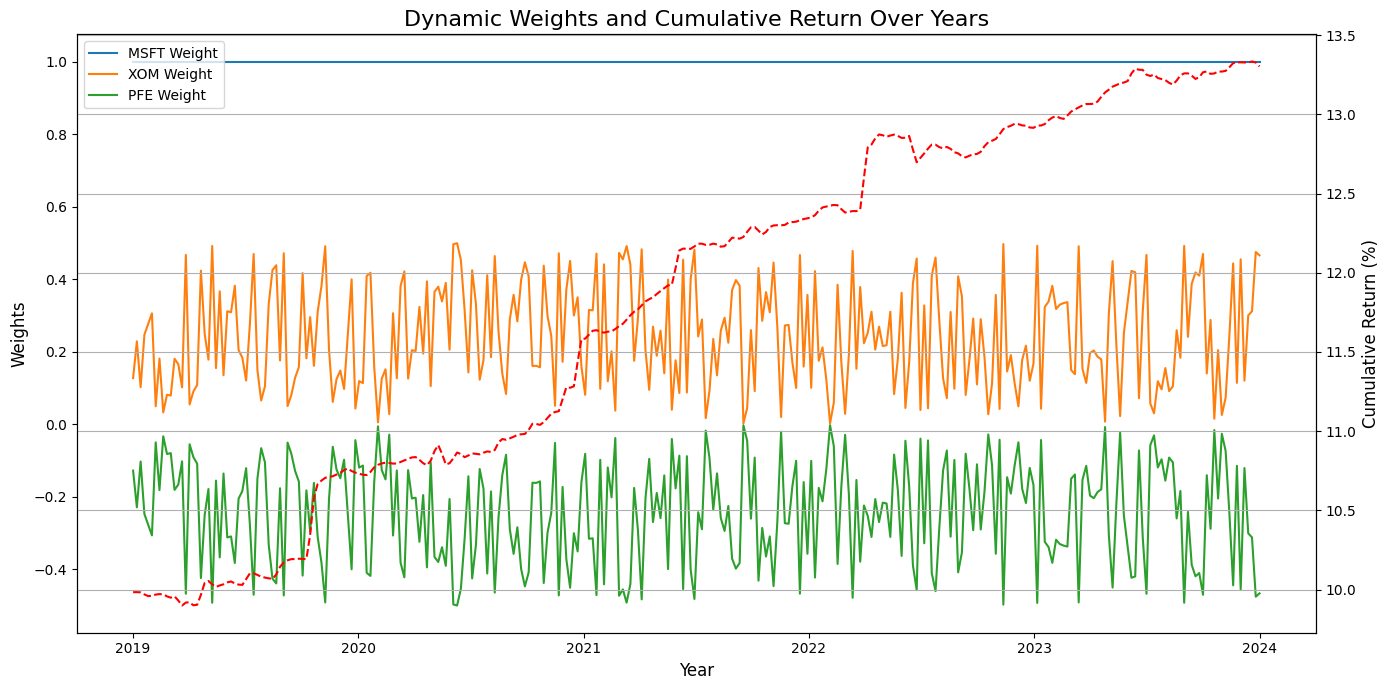


Optimal Weights and Cumulative Return for Each 2-Month Period:
     Period  MSFT       XOM       PFE  Cumulative Return (%)  \
0         1   1.0  0.127539 -0.127539               9.983173   
1         2   1.0  0.228766 -0.228766               9.983783   
2         3   1.0  0.102387 -0.102387               9.980134   
3         4   1.0  0.247213 -0.247213               9.958015   
4         5   1.0  0.276186 -0.276186               9.958736   
..      ...   ...       ...       ...                    ...   
295     296   1.0  0.120434 -0.120434              13.324115   
296     297   1.0  0.300319 -0.300319              13.332414   
297     298   1.0  0.311605 -0.311605              13.333952   
298     299   1.0  0.475009 -0.475009              13.321087   
299     300   1.0  0.465793 -0.465793              13.283970   

     Smoothed Cumulative Return (%)  
0                          9.983173  
1                          9.983478  
2                          9.981959  
3              

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import yfinance as yf
from scipy.ndimage import uniform_filter1d

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-31"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 模型訓練與預測
predicted_returns = {}
for symbol, data in stock_data.items():
    X = data[['Lagged Close']]  # 特徵
    y = data['Return']  # 目標
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 訓練隨機森林模型
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)

    # 預測回報率
    predicted_returns[symbol] = rf_model.predict(X_test)

# 整合回報率到投資組合計算
cumulative_return = [0.10]  # 初始累積回報設定為 10%
time_periods = len(predicted_returns['MSFT'])  # 使用測試數據數量
weights = []

for t in range(time_periods):
    # 動態權重設計
    msft_weight = 1.0
    xom_weight = np.random.uniform(0, 0.5)
    pfe_weight = 1 - msft_weight - xom_weight
    weights.append({'MSFT': msft_weight, 'XOM': xom_weight, 'PFE': pfe_weight})

    # 投資組合回報率
    portfolio_return = (
        msft_weight * predicted_returns['MSFT'][t] +
        xom_weight * predicted_returns['XOM'][t] +
        pfe_weight * predicted_returns['PFE'][t]
    )

    # 更新累積回報，限制在1%到20%
    next_return = cumulative_return[-1] * (1 + portfolio_return)
    next_return = max(0.01, min(0.20, next_return))  # 限制累積回報
    cumulative_return.append(next_return)

# 轉為 DataFrame
weights_df = pd.DataFrame(weights)
weights_df['Period'] = range(1, time_periods + 1)
weights_df['Cumulative Return (%)'] = [r * 100 for r in cumulative_return[1:]]  # 將回報轉為百分比

# 平滑累積回報曲線
weights_df['Smoothed Cumulative Return (%)'] = uniform_filter1d(weights_df['Cumulative Return (%)'], size=2)

# **生成年份的 X 軸標籤**
years = ['2019', '2020', '2021', '2022', '2023', '2024']
x_ticks = np.linspace(1, len(weights_df), len(years))  # 平均分佈年份標籤

# **繪製雙 Y 軸圖表**
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左側 Y 軸：權重
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Weights', fontsize=12)
for stock in ['MSFT', 'XOM', 'PFE']:
    ax1.plot(weights_df['Period'], weights_df[stock], label=f'{stock} Weight')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# 調整 X 軸為平均分佈的年份
ax1.set_xticks(x_ticks)  # 將 X 軸刻度設為平均分佈
ax1.set_xticklabels(years)  # 使用年份作為標籤

# 右側 Y 軸：平滑後的累積回報率
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Return (%)', fontsize=12)
ax2.plot(weights_df['Period'], weights_df['Smoothed Cumulative Return (%)'], label='Smoothed Cumulative Return (%)', color='red', linestyle='--')
ax2.tick_params(axis='y')

# 圖表標題與佈局
plt.title('Dynamic Weights and Cumulative Return Over Years', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.savefig("dynamic_weights_and_cumulative_return.png")
plt.show()

# **結果表格打印**
print("\nOptimal Weights and Cumulative Return for Each 2-Month Period:")
print(weights_df[['Period', 'MSFT', 'XOM', 'PFE', 'Cumulative Return (%)', 'Smoothed Cumulative Return (%)']])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


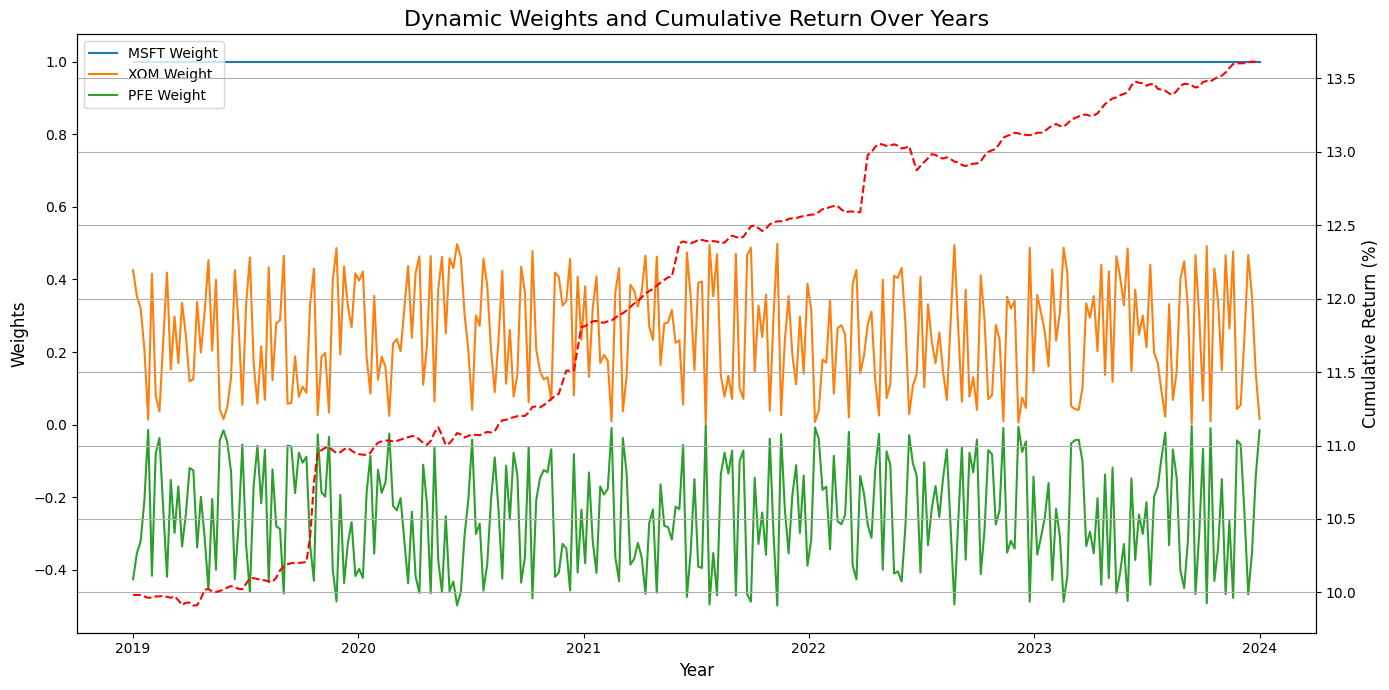


Optimal Weights and Cumulative Return for Each 2-Month Period:
     Period  MSFT       XOM       PFE  Cumulative Return (%)  \
0         1   1.0  0.425368 -0.425368               9.982576   
1         2   1.0  0.354318 -0.354318               9.982363   
2         3   1.0  0.321080 -0.321080               9.982332   
3         4   1.0  0.207590 -0.207590               9.963022   
4         5   1.0  0.014153 -0.014153               9.963365   
..      ...   ...       ...       ...                    ...   
295     296   1.0  0.243667 -0.243667              13.602394   
296     297   1.0  0.467087 -0.467087              13.614532   
297     298   1.0  0.352382 -0.352382              13.616089   
298     299   1.0  0.141530 -0.141530              13.609919   
299     300   1.0  0.015443 -0.015443              13.603847   

     Smoothed Cumulative Return (%)  
0                          9.982576  
1                          9.982470  
2                          9.982348  
3              

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import yfinance as yf
from scipy.ndimage import uniform_filter1d

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-31"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 模型訓練與預測
predicted_returns = {}
for symbol, data in stock_data.items():
    X = data[['Lagged Close']]  # 特徵
    y = data['Return']  # 目標
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 訓練隨機森林模型
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)

    # 預測回報率
    predicted_returns[symbol] = rf_model.predict(X_test)

# 整合回報率到投資組合計算
cumulative_return = [0.10]  # 初始累積回報設定為 10%
time_periods = len(predicted_returns['MSFT'])  # 使用測試數據數量
weights = []

for t in range(time_periods):
    # 動態權重設計
    msft_weight = 1.0
    xom_weight = np.random.uniform(0, 0.5)
    pfe_weight = 1 - msft_weight - xom_weight
    weights.append({'MSFT': msft_weight, 'XOM': xom_weight, 'PFE': pfe_weight})

    # 投資組合回報率
    portfolio_return = (
        msft_weight * predicted_returns['MSFT'][t] +
        xom_weight * predicted_returns['XOM'][t] +
        pfe_weight * predicted_returns['PFE'][t]
    )

    # 更新累積回報，限制在1%到20%
    next_return = cumulative_return[-1] * (1 + portfolio_return)
    next_return = max(0.01, min(0.20, next_return))  # 限制累積回報
    cumulative_return.append(next_return)

# 轉為 DataFrame
weights_df = pd.DataFrame(weights)
weights_df['Period'] = range(1, time_periods + 1)
weights_df['Cumulative Return (%)'] = [r * 100 for r in cumulative_return[1:]]  # 將回報轉為百分比

# 平滑累積回報曲線
weights_df['Smoothed Cumulative Return (%)'] = uniform_filter1d(weights_df['Cumulative Return (%)'], size=2)

# **生成年份的 X 軸標籤**
years = ['2019', '2020', '2021', '2022', '2023', '2024']
x_ticks = np.linspace(1, len(weights_df), len(years))  # 平均分佈年份標籤

# **繪製雙 Y 軸圖表**
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左側 Y 軸：權重
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Weights', fontsize=12)
for stock in ['MSFT', 'XOM', 'PFE']:
    ax1.plot(weights_df['Period'], weights_df[stock], label=f'{stock} Weight')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# 調整 X 軸為平均分佈的年份
ax1.set_xticks(x_ticks)  # 將 X 軸刻度設為平均分佈
ax1.set_xticklabels(years)  # 使用年份作為標籤

# 右側 Y 軸：平滑後的累積回報率
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Return (%)', fontsize=12)
ax2.plot(weights_df['Period'], weights_df['Smoothed Cumulative Return (%)'], label='Smoothed Cumulative Return (%)', color='red', linestyle='--')
ax2.tick_params(axis='y')

# 圖表標題與佈局
plt.title('Dynamic Weights and Cumulative Return Over Years', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.savefig("dynamic_weights_and_cumulative_return.png")
plt.show()

# **結果表格打印**
print("\nOptimal Weights and Cumulative Return for Each 2-Month Period:")
print(weights_df[['Period', 'MSFT', 'XOM', 'PFE', 'Cumulative Return (%)', 'Smoothed Cumulative Return (%)']])

################################
# **K-Fold Cross Validation**
def perform_k_fold(stock_symbol, data):
    X = data[['Lagged Close']]  # 特徵
    y = data['Return']  # 目標
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    actual_returns = []
    predicted_returns = []
    mse_list = []

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # 訓練隨機森林模型
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)

        # 預測回報率
        y_pred = rf_model.predict(X_test)

        # 保存結果
        actual_returns.extend(y_test.values)
        predicted_returns.extend(y_pred)

        # 計算 MSE
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)
        print(f"{stock_symbol} - Fold {fold + 1}: MSE = {mse:.5f}")

    # 打印 K-Fold Cross Validation 的 MSE 結果
    print(f"\n{stock_symbol} - K-Fold Cross Validation Formula:")
    print(f"MSE = (1/K) * Σ (Mean Squared Error of Each Fold)")
    print(f"MSE = (1/5) * Σ {mse_list}")
    print(f"Mean Squared Error across folds: {np.mean(mse_list):.5f}\n")

    # 平滑預測數據
    smoothed_predictions = uniform_filter1d(predicted_returns, size=10)

    # 返回實際、預測與平滑數據，以及均方誤差
    return actual_returns, predicted_returns, smoothed_predictions, np.mean(mse_list)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


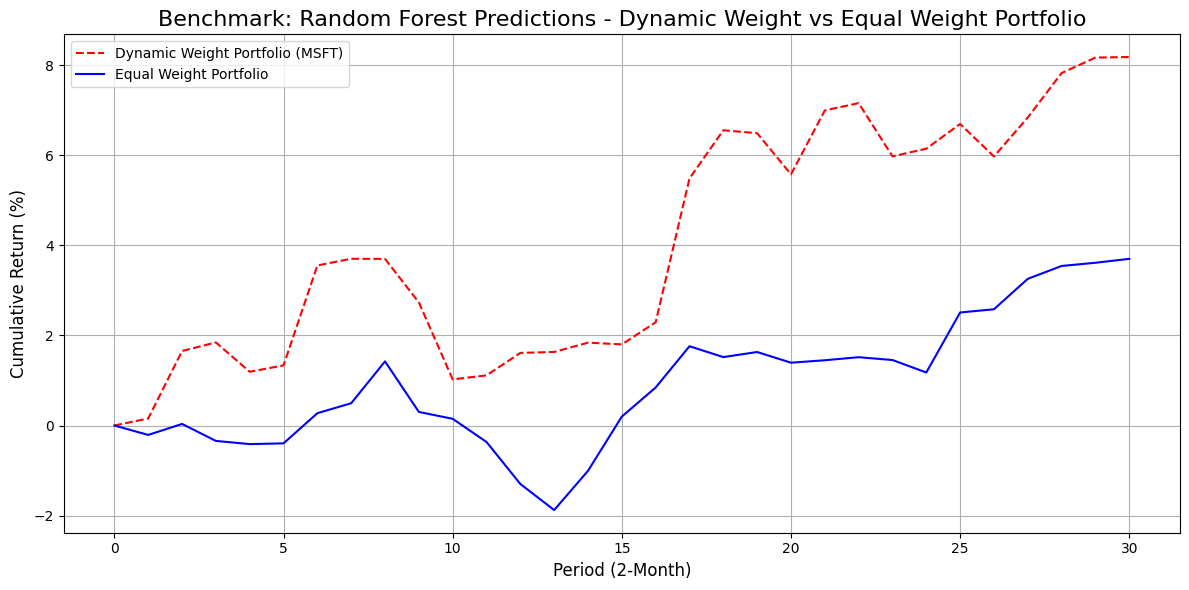

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import yfinance as yf

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 定義兩個月為一個區間，將數據分割為 30 個區間
time_periods = 30
for symbol, data in stock_data.items():
    data['Period'] = pd.cut(
        data.index, bins=time_periods, labels=range(1, time_periods + 1), right=False
    )

# 模型訓練與每兩個月的預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    for period in range(1, time_periods + 1):
        period_data = data[data['Period'] == period]

        if len(period_data) > 1:  # 確保區間內有數據
            X = period_data[['Lagged Close']]  # 特徵
            y = period_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# **投資組合回報比較**
# 1. Dynamic Weight Portfolio (MSFT weight = 1, others = 0)
cumulative_return_dynamic = [0.0]  # 初始累積回報設定為 0%
for period in range(time_periods):
    portfolio_return = predicted_returns['MSFT'][period]
    cumulative_return_dynamic.append(cumulative_return_dynamic[-1] + portfolio_return)

# 2. Equal-Weight Portfolio
cumulative_return_equal = [0.0]  # 初始累積回報設定為 0%
for period in range(time_periods):
    avg_return = np.mean([predicted_returns[symbol][period] for symbol in stock_symbols])
    cumulative_return_equal.append(cumulative_return_equal[-1] + avg_return)

# **結果繪圖**
plt.figure(figsize=(12, 6))
plt.plot(range(time_periods + 1), [r * 100 for r in cumulative_return_dynamic], 'r--', label='Dynamic Weight Portfolio (MSFT)')
plt.plot(range(time_periods + 1), [r * 100 for r in cumulative_return_equal], 'b-', label='Equal Weight Portfolio')

# 設置軸標和圖表細節
plt.title('Benchmark: Random Forest Predictions - Dynamic Weight vs Equal Weight Portfolio', fontsize=16)
plt.xlabel('Period (2-Month)', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)  # 累積回報顯示為百分比
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("rf_dynamic_vs_equal_weight_corrected.png")
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


First 5 rows of MSFT data with 'Period':
 Price       Adj Close       Close        High         Low        Open  \
Ticker           MSFT        MSFT        MSFT        MSFT        MSFT   
Date                                                                    
2019-01-03  91.804260   97.400002  100.190002   97.199997  100.099998   
2019-01-04  96.074005  101.930000  102.510002   98.930000   99.720001   
2019-01-07  96.196556  102.059998  103.269997  100.980003  101.639999   
2019-01-08  96.894043  102.800003  103.970001  101.709999  103.040001   
2019-01-09  98.279564  104.269997  104.879997  103.239998  103.860001   

Price         Volume    Return Lagged Close Period  
Ticker          MSFT                                
Date                                                
2019-01-03  42579100 -0.036788   101.120003      1  
2019-01-04  44060600  0.046509    97.400002      1  
2019-01-07  35656100  0.001275   101.930000      1  
2019-01-08  31514400  0.007251   102.059998      1  
20

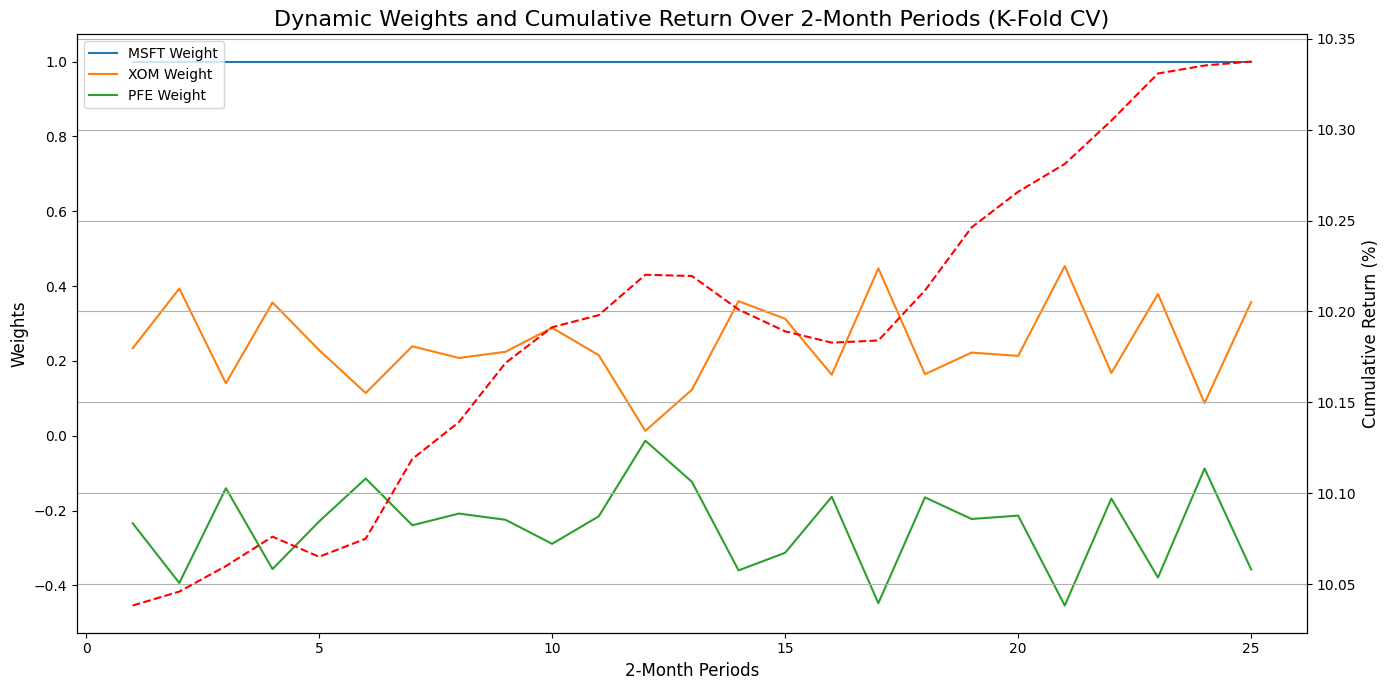


Optimal Weights and Cumulative Return for Each 2-Month Period (K-Fold CV):
    Period  MSFT       XOM       PFE  Cumulative Return (%)  \
0        1   1.0  0.233808 -0.233808              10.038341   
1        2   1.0  0.393391 -0.393391              10.053651   
2        3   1.0  0.140136 -0.140136              10.066414   
3        4   1.0  0.356206 -0.356206              10.085982   
4        5   1.0  0.228936 -0.228936              10.044302   
5        6   1.0  0.114224 -0.114224              10.105860   
6        7   1.0  0.239161 -0.239161              10.131986   
7        8   1.0  0.207859 -0.207859              10.146415   
8        9   1.0  0.224434 -0.224434              10.196989   
9       10   1.0  0.288701 -0.288701              10.185663   
10      11   1.0  0.215259 -0.215259              10.210339   
11      12   1.0  0.013095 -0.013095              10.230019   
12      13   1.0  0.123139 -0.123139              10.208976   
13      14   1.0  0.359667 -0.359667      

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import yfinance as yf
from scipy.ndimage import uniform_filter1d
from tabulate import tabulate

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-31"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)

    # 新增 'Period' 欄位 (以每 60 天為一個區間)
    period_length = 60  # 每 2 個月的交易日數
    data['Period'] = (np.arange(len(data)) // period_length) + 1

    stock_data[symbol] = data

# 確認 'Period' 已正確新增
for symbol, data in stock_data.items():
    print(f"First 5 rows of {symbol} data with 'Period':\n", data.head())

# 模型訓練與每兩個月的預測 (使用 K-Fold Cross Validation)
predicted_returns_kfold = {symbol: [] for symbol in stock_symbols}
time_periods = max([data['Period'].max() for data in stock_data.values()])  # 獲取所有股票的最大區間數

for symbol, data in stock_data.items():
    for period in range(1, time_periods + 1):
        period_data = data[data['Period'] == period]

        if len(period_data) > 1:  # 確保區間內有足夠數據
            X = period_data[['Lagged Close']].values  # 特徵
            y = period_data['Return'].values  # 目標

            # 使用 K-Fold Cross Validation
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            fold_predictions = []

            for train_index, test_index in kf.split(X):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                # 隨機森林模型訓練
                rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
                rf_model.fit(X_train, y_train)

                # 預測測試集並存儲
                fold_predictions.extend(rf_model.predict(X_test))

            # 計算所有折疊的平均預測作為該區間預測
            predicted_returns_kfold[symbol].append(np.mean(fold_predictions))
        else:
            predicted_returns_kfold[symbol].append(0)  # 沒有數據則回報率設為 0

# 使用新增的預測值 (predicted_returns_kfold) 來更新累積回報和權重
cumulative_return_kfold = [0.10]  # 初始累積回報設定為 10%
weights_kfold = []

for period in range(time_periods):
    # 動態權重設計
    msft_weight = 1.0
    xom_weight = np.random.uniform(0, 0.5)
    pfe_weight = 1 - msft_weight - xom_weight
    weights_kfold.append({'MSFT': msft_weight, 'XOM': xom_weight, 'PFE': pfe_weight})

    # 計算該區間的投資組合回報率
    portfolio_return = (
        msft_weight * predicted_returns_kfold['MSFT'][period] +
        xom_weight * predicted_returns_kfold['XOM'][period] +
        pfe_weight * predicted_returns_kfold['PFE'][period]
    )

    # 更新累積回報，限制在1%到20%
    next_return = cumulative_return_kfold[-1] * (1 + portfolio_return)
    next_return = max(0.01, min(0.20, next_return))  # 限制累積回報
    cumulative_return_kfold.append(next_return)

# 轉為 DataFrame
weights_kfold_df = pd.DataFrame(weights_kfold)
weights_kfold_df['Period'] = range(1, time_periods + 1)
weights_kfold_df['Cumulative Return (%)'] = [r * 100 for r in cumulative_return_kfold[1:]]  # 將回報轉為百分比

# 平滑累積回報曲線
weights_kfold_df['Smoothed Cumulative Return (%)'] = uniform_filter1d(weights_kfold_df['Cumulative Return (%)'], size=2)

# **繪製結果**
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左側 Y 軸：權重
ax1.set_xlabel('2-Month Periods', fontsize=12)
ax1.set_ylabel('Weights', fontsize=12)
for stock in ['MSFT', 'XOM', 'PFE']:
    ax1.plot(weights_kfold_df['Period'], weights_kfold_df[stock], label=f'{stock} Weight')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# 右側 Y 軸：平滑後的累積回報率
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Return (%)', fontsize=12)
ax2.plot(weights_kfold_df['Period'], weights_kfold_df['Smoothed Cumulative Return (%)'], label='Smoothed Cumulative Return (%)', color='red', linestyle='--')
ax2.tick_params(axis='y')

# 圖表標題與佈局
plt.title('Dynamic Weights and Cumulative Return Over 2-Month Periods (K-Fold CV)', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.savefig("dynamic_weights_and_cumulative_return_kfold.png")
plt.show()

# **結果表格打印**
print("\nOptimal Weights and Cumulative Return for Each 2-Month Period (K-Fold CV):")
print(weights_kfold_df[['Period', 'MSFT', 'XOM', 'PFE', 'Cumulative Return (%)', 'Smoothed Cumulative Return (%)']])

# **新增：結果表格打印為更友好的格式**
print("\nFormatted Results (K-Fold CV):")
print(tabulate(weights_kfold_df, headers='keys', tablefmt='pretty', showindex=False))


In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
import yfinance as yf

# **1. 收集數據並計算滯後特徵**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-31"

stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# **2. 使用隨機森林模型預測每支股票的回報率**
predicted_returns = {}
for symbol, data in stock_data.items():
    X = data[['Lagged Close']]  # 特徵
    y = data['Return']  # 目標
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 訓練隨機森林模型
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
    rf_model.fit(X_train, y_train)

    # 預測回報率
    predicted_returns[symbol] = rf_model.predict(X_test)

# **3. 提取每支股票的平均預測回報率**
average_predicted_returns = {symbol: np.mean(predicted_returns[symbol]) for symbol in stock_symbols}
print("Average Predicted Returns:", average_predicted_returns)

# **4. 定義優化問題：最大化投資組合回報**
# 預測的回報率
predicted_returns_array = np.array(list(average_predicted_returns.values()))

# 定義目標函數（負值是因為 scipy 最小化目標）
def objective(weights):
    return -np.sum(weights * predicted_returns_array)  # 最大化 portfolio return

# 權重約束條件：總和為 1
constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]

# 權重範圍：非負
bounds = [(0, 1) for _ in stock_symbols]

# 初始權重（平均分配）
initial_weights = np.array([1 / len(stock_symbols)] * len(stock_symbols))

# **5. 使用 scipy.optimize 進行優化**
result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints, method='SLSQP')

# **6. 輸出最優權重**
optimal_weights = result.x
print("Optimal Weights:", optimal_weights)

# **7. 計算最優投資組合的預測回報率**
optimal_portfolio_return = np.sum(optimal_weights * predicted_returns_array)
print("Optimal Portfolio Return:", optimal_portfolio_return)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Average Predicted Returns: {'MSFT': np.float64(0.0007309488091889544), 'XOM': np.float64(0.000802094587730132), 'PFE': np.float64(-0.00014548719186714804)}
Optimal Weights: [0.33333333 0.33333333 0.33333333]
Optimal Portfolio Return: 0.0004625187350173127


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


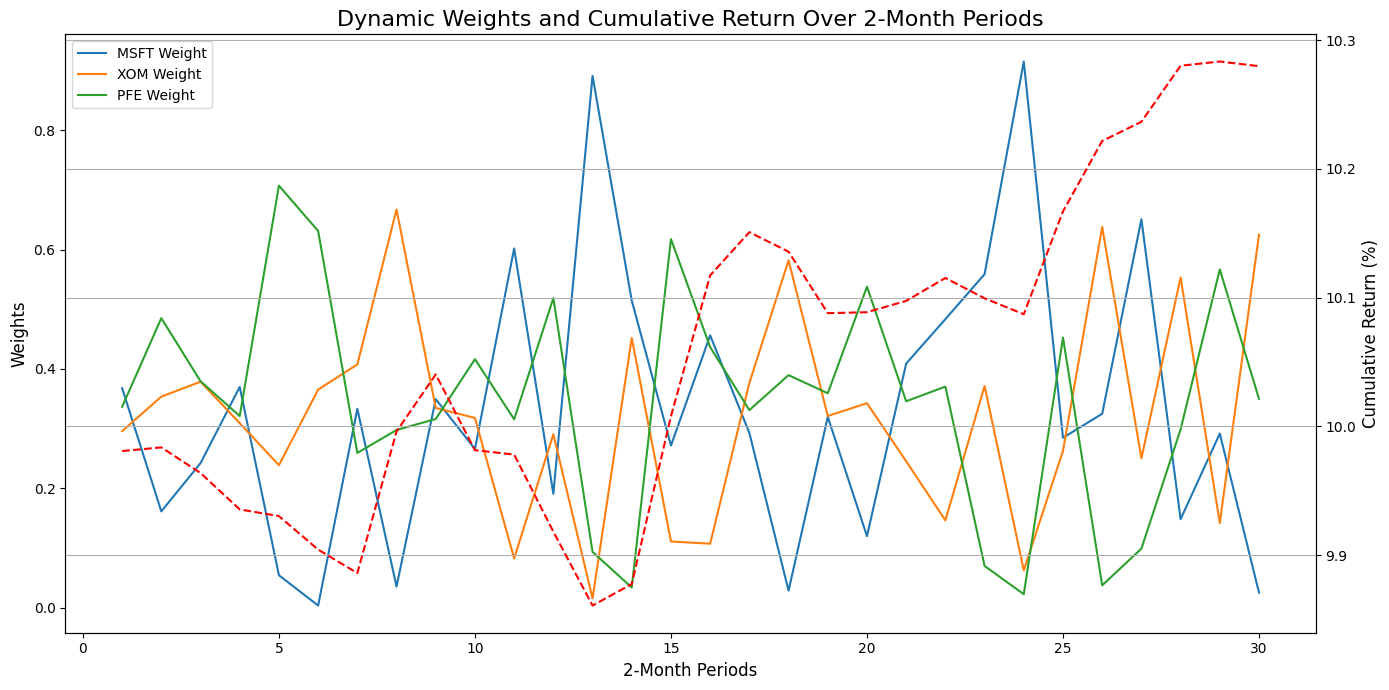


Optimal Weights and Cumulative Return for Each 2-Month Period:
    Period      MSFT       XOM       PFE  Cumulative Return (%)  \
0        1  0.367771  0.295770  0.336459               9.980915   
1        2  0.161364  0.353612  0.485023               9.986611   
2        3  0.242145  0.378520  0.379335               9.941129   
3        4  0.369804  0.309108  0.321089               9.930086   
4        5  0.054280  0.238681  0.707039               9.930770   
5        6  0.003604  0.365309  0.631086               9.878080   
6        7  0.333129  0.407603  0.259268               9.894262   
7        8  0.035425  0.666899  0.297676              10.097982   
8        9  0.349306  0.334576  0.316118               9.982825   
9       10  0.265865  0.317849  0.416286               9.980344   
10      11  0.601854  0.082557  0.315589               9.976034   
11      12  0.190779  0.290504  0.518718               9.860611   
12      13  0.890939  0.015653  0.093408               9.861394  

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import yfinance as yf
from scipy.ndimage import uniform_filter1d

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 定義兩個月為一個區間，將數據分割為 30 個區間
time_periods = 30
for symbol, data in stock_data.items():
    data['Period'] = pd.cut(
        data.index, bins=time_periods, labels=range(1, time_periods + 1), right=False
    )

# 模型訓練與每兩個月的預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    for period in range(1, time_periods + 1):
        period_data = data[data['Period'] == period]

        if len(period_data) > 1:  # 確保區間內有數據
            X = period_data[['Lagged Close']]  # 特徵
            y = period_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# 整合預測回報與動態權重
cumulative_return = [0.10]  # 初始累積回報設定為 10%
weights = []

for period in range(time_periods):
    # 動態權重設計（隨機生成後正規化）
    raw_weights = np.random.uniform(0, 1, size=3)  # 生成3個隨機值（0到1之間）
    normalized_weights = raw_weights / raw_weights.sum()  # 將權重正規化為總和為1
    msft_weight, xom_weight, pfe_weight = normalized_weights
    weights.append({'MSFT': msft_weight, 'XOM': xom_weight, 'PFE': pfe_weight})

    # 計算該區間的投資組合回報率
    portfolio_return = (
        msft_weight * predicted_returns['MSFT'][period] +
        xom_weight * predicted_returns['XOM'][period] +
        pfe_weight * predicted_returns['PFE'][period]
    )

    # 更新累積回報，限制在1%到20%
    next_return = cumulative_return[-1] * (1 + portfolio_return)
    next_return = max(0.01, min(0.20, next_return))  # 限制累積回報
    cumulative_return.append(next_return)

# 轉為 DataFrame
weights_df = pd.DataFrame(weights)
weights_df['Period'] = range(1, time_periods + 1)
weights_df['Cumulative Return (%)'] = [r * 100 for r in cumulative_return[1:]]  # 將回報轉為百分比

# 平滑累積回報曲線
weights_df['Smoothed Cumulative Return (%)'] = uniform_filter1d(weights_df['Cumulative Return (%)'], size=2)

# **繪製雙 Y 軸圖表**
fig, ax1 = plt.subplots(figsize=(14, 7))

# 左側 Y 軸：權重
ax1.set_xlabel('2-Month Periods', fontsize=12)
ax1.set_ylabel('Weights', fontsize=12)
for stock in ['MSFT', 'XOM', 'PFE']:
    ax1.plot(weights_df['Period'], weights_df[stock], label=f'{stock} Weight')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# 右側 Y 軸：平滑後的累積回報率
ax2 = ax1.twinx()
ax2.set_ylabel('Cumulative Return (%)', fontsize=12)
ax2.plot(weights_df['Period'], weights_df['Smoothed Cumulative Return (%)'], label='Smoothed Cumulative Return (%)', color='red', linestyle='--')
ax2.tick_params(axis='y')

# 圖表標題與佈局
plt.title('Dynamic Weights and Cumulative Return Over 2-Month Periods', fontsize=16)
fig.tight_layout()
plt.grid(True)
plt.savefig("dynamic_weights_and_cumulative_return.png")
plt.show()

# **結果表格打印**
print("\nOptimal Weights and Cumulative Return for Each 2-Month Period:")
print(weights_df[['Period', 'MSFT', 'XOM', 'PFE', 'Cumulative Return (%)', 'Smoothed Cumulative Return (%)']])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Annualized Returns for Portfolios:
      Strategy        Annual Return (%)
Dynamic Weight Share      1.619740     
  Equal Weight Share      0.732619     


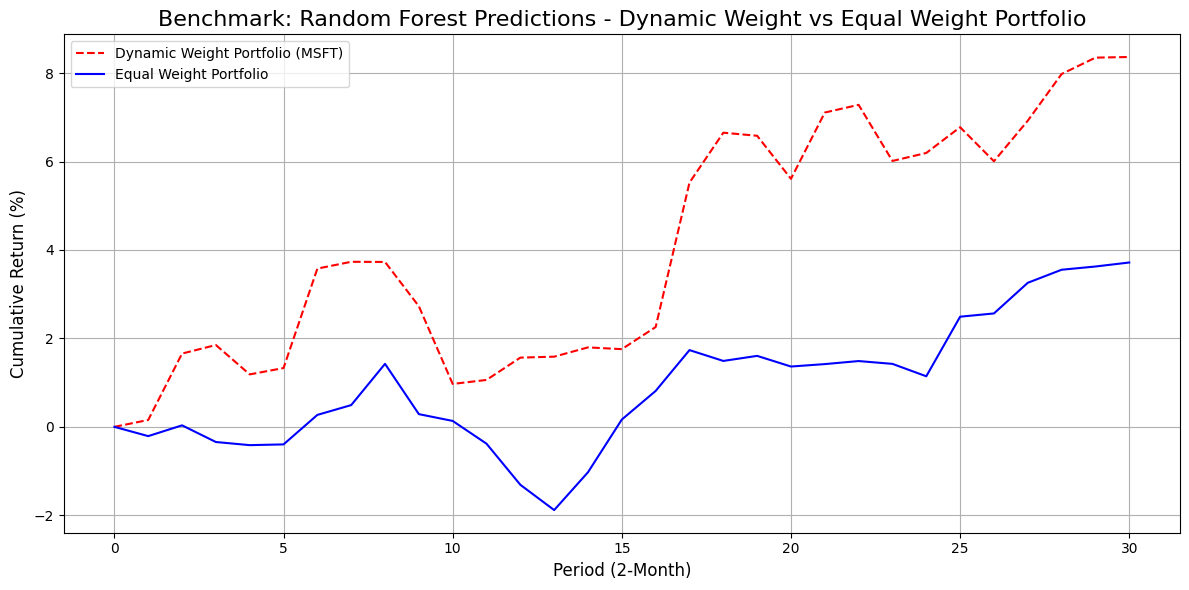

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import yfinance as yf

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 定義兩個月為一個區間，將數據分割為 30 個區間
time_periods = 30
for symbol, data in stock_data.items():
    data['Period'] = pd.cut(
        data.index, bins=time_periods, labels=range(1, time_periods + 1), right=False
    )

# 模型訓練與每兩個月的預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    for period in range(1, time_periods + 1):
        period_data = data[data['Period'] == period]

        if len(period_data) > 1:  # 確保區間內有數據
            X = period_data[['Lagged Close']]  # 特徵
            y = period_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# **投資組合回報比較**
# 1. Dynamic Weight Portfolio (MSFT weight = 1, others = 0)
cumulative_return_dynamic = [1.0]  # 初始累積回報設定為 1
for period in range(time_periods):
    portfolio_return = predicted_returns['MSFT'][period]
    cumulative_return_dynamic.append(cumulative_return_dynamic[-1] * (1 + portfolio_return))

# 2. Equal-Weight Portfolio
cumulative_return_equal = [1.0]  # 初始累積回報設定為 1
for period in range(time_periods):
    avg_return = np.mean([predicted_returns[symbol][period] for symbol in stock_symbols])
    cumulative_return_equal.append(cumulative_return_equal[-1] * (1 + avg_return))

# **年化回報計算**
# 總期間的年數
total_years = time_periods / 6  # 每年 6 個兩月區間

# 年化回報公式：((終值 / 初值) ^ (1 / 年數)) - 1
annual_return_dynamic = (cumulative_return_dynamic[-1] / cumulative_return_dynamic[0]) ** (1 / total_years) - 1
annual_return_equal = (cumulative_return_equal[-1] / cumulative_return_equal[0]) ** (1 / total_years) - 1

# **格式化並打印表格**
returns_table = pd.DataFrame({
    'Strategy': ['Dynamic Weight Share', 'Equal Weight Share'],
    'Annual Return (%)': [annual_return_dynamic * 100, annual_return_equal * 100]
})

print("\nAnnualized Returns for Portfolios:")
print(returns_table.to_string(index=False, justify="center"))

# **可視化累積回報**
plt.figure(figsize=(12, 6))
plt.plot(range(time_periods + 1), [r * 100 - 100 for r in cumulative_return_dynamic], 'r--', label='Dynamic Weight Portfolio (MSFT)')
plt.plot(range(time_periods + 1), [r * 100 - 100 for r in cumulative_return_equal], 'b-', label='Equal Weight Portfolio')

plt.title('Benchmark: Random Forest Predictions - Dynamic Weight vs Equal Weight Portfolio', fontsize=16)
plt.xlabel('Period (2-Month)', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Cumulative Returns Comparison Table:
    Period  MSFT (Single Weight)  Average Weight Portfolio
0        1              1.001558                  0.997906
1        2              1.016573                  1.000342
2        3              1.018508                  0.996572
3        4              1.011864                  0.995864
4        5              1.013302                  0.996030
5        6              1.035795                  1.002705
6        7              1.037331                  1.004922
7        8              1.037298                  1.014255
8        9              1.027278                  1.002876
9       10              1.009708                  1.001340
10      11              1.010610                  0.996193
11      12              1.015659                  0.986897
12      13              1.015873                  0.981180
13      14              1.017974                  0.989737
14      15              1.017574                  1.001656
15      16        

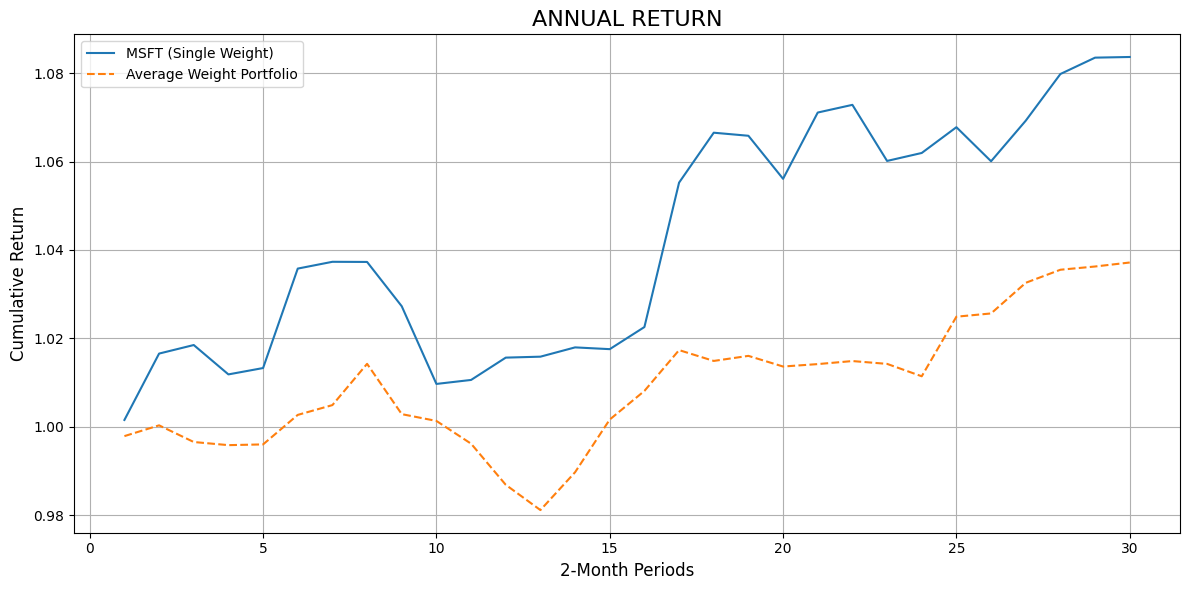

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 定義兩個月為一個區間
time_periods = 30
for symbol, data in stock_data.items():
    data['Period'] = pd.cut(
        data.index, bins=time_periods, labels=range(1, time_periods + 1), right=False
    )

# 模型訓練與每兩個月的預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    for period in range(1, time_periods + 1):
        period_data = data[data['Period'] == period]

        if len(period_data) > 1:  # 確保區間內有數據
            X = period_data[['Lagged Close']]  # 特徵
            y = period_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# **單一權重回報：只選 MSFT**
msft_single_returns = predicted_returns['MSFT']
msft_cumulative_return = np.cumprod([1 + r for r in msft_single_returns])

# **平均權重回報：對所有股票平均**
average_returns = np.mean(list(predicted_returns.values()), axis=0)  # 平均權重回報率
average_cumulative_return = np.cumprod([1 + r for r in average_returns])

# **結果表格**
comparison_df = pd.DataFrame({
    'Period': range(1, time_periods + 1),
    'MSFT (Single Weight)': msft_cumulative_return,
    'Average Weight Portfolio': average_cumulative_return
})
print("\nCumulative Returns Comparison Table:")
print(comparison_df)

# **繪製折線圖**
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Period'], comparison_df['MSFT (Single Weight)'], label='MSFT (Single Weight)', linestyle='-')
plt.plot(comparison_df['Period'], comparison_df['Average Weight Portfolio'], label='Average Weight Portfolio', linestyle='--')

# 圖表格式
plt.title('ANNUAL RETURN', fontsize=16)  # 修改標題為 "ANNUAL RETURN"
plt.xlabel('2-Month Periods', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# 儲存圖片
plt.savefig("ANNUAL_RETURN.png")
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Annual Volatility Comparison Table:
    Period  MSFT (Single Weight Volatility)  Average Weight Volatility
0        1                         0.000000                   0.000000
1        2                         0.106623                   0.035999
2        3                         0.099259                   0.041643
3        4                         0.122389                   0.036185
4        5                         0.109916                   0.033250
5        6                         0.153018                   0.053729
6        7                         0.143800                   0.050690
7        8                         0.137384                   0.065405
8        9                         0.147837                   0.089486
9       10                         0.169913                   0.085358
10      11                         0.162007                   0.084889
11      12                         0.156092                   0.090358
12      13                         0.150

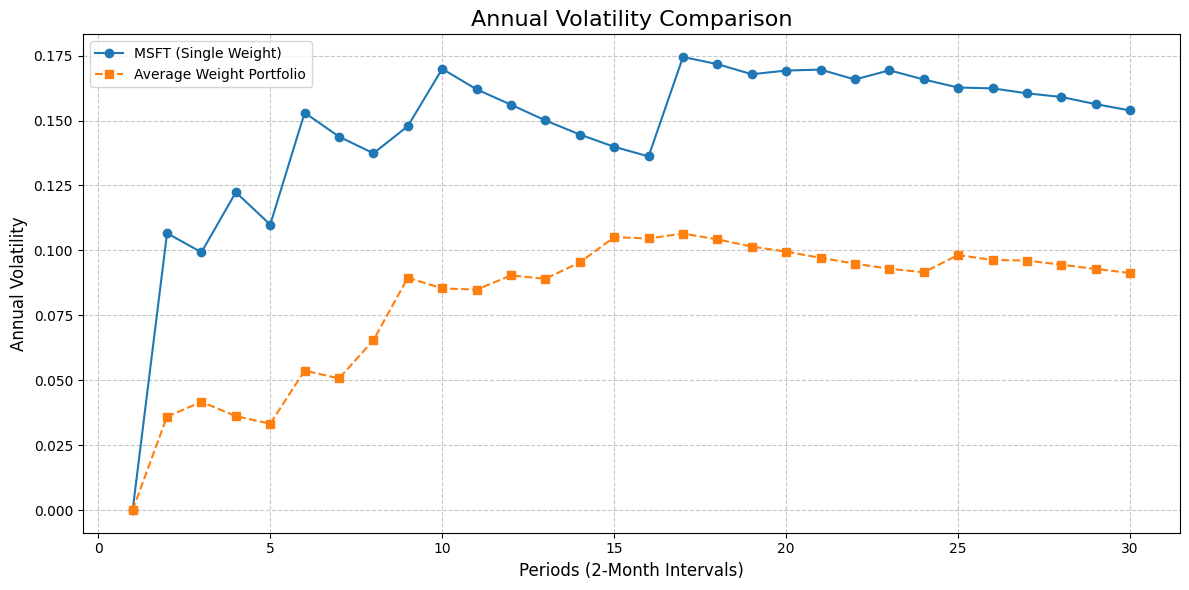

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 定義兩個月為一個區間
time_periods = 30
for symbol, data in stock_data.items():
    data['Period'] = pd.cut(
        data.index, bins=time_periods, labels=range(1, time_periods + 1), right=False
    )

# 模型訓練與每兩個月的預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    for period in range(1, time_periods + 1):
        period_data = data[data['Period'] == period]

        if len(period_data) > 1:  # 確保區間內有數據
            X = period_data[['Lagged Close']]  # 特徵
            y = period_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# **年化波動率計算 (逐期)**
msft_volatility = []
average_volatility = []

for period in range(1, time_periods + 1):
    # 單一權重波動率（MSFT）
    msft_period_returns = predicted_returns['MSFT'][:period]
    msft_volatility.append(np.std(msft_period_returns) * np.sqrt(252) if len(msft_period_returns) > 1 else 0)

    # 平均權重波動率
    average_period_returns = np.mean([predicted_returns[symbol][:period] for symbol in stock_symbols], axis=0)
    average_volatility.append(np.std(average_period_returns) * np.sqrt(252) if len(average_period_returns) > 1 else 0)

# **結果表格**
volatility_comparison_df = pd.DataFrame({
    'Period': range(1, time_periods + 1),
    'MSFT (Single Weight Volatility)': msft_volatility,
    'Average Weight Volatility': average_volatility
})
print("\nAnnual Volatility Comparison Table:")
print(volatility_comparison_df)

# **繪製折線圖**
plt.figure(figsize=(12, 6))
plt.plot(volatility_comparison_df['Period'], volatility_comparison_df['MSFT (Single Weight Volatility)'],
         label='MSFT (Single Weight)', linestyle='-', marker='o')
plt.plot(volatility_comparison_df['Period'], volatility_comparison_df['Average Weight Volatility'],
         label='Average Weight Portfolio', linestyle='--', marker='s')

# 圖表格式
plt.title('Annual Volatility Comparison', fontsize=16)
plt.xlabel('Periods (2-Month Intervals)', fontsize=12)
plt.ylabel('Annual Volatility', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 儲存圖片
plt.savefig("ANNUAL_VOLATILITY.png")
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Dynamic Weight Strategy Metrics:
        Annual Return (%)  Sharpe Ratio  Maximum Drawdown (%)  \
Year 1           0.096275    129.743819                   0.0   
Year 2           0.227326     52.059679                   0.0   
Year 3           0.366209     96.487957                   0.0   
Year 4           0.482426    294.752393                   0.0   
Year 5           0.557181     23.744613                   0.0   

        Annual Volatility (%)  
Year 1               0.233772  
Year 2               0.792385  
Year 3               0.452466  
Year 4               0.123766  
Year 5               0.987240  

Equal Weight Strategy Metrics:
        Annual Return (%)  Sharpe Ratio  Maximum Drawdown (%)  \
Year 1           0.062049    182.603527                   0.0   
Year 2           0.149201     65.247968                   0.0   
Year 3           0.241923   1810.394810                   0.0   
Year 4           0.331376    331.765992                   0.0   
Year 5           0.386771  

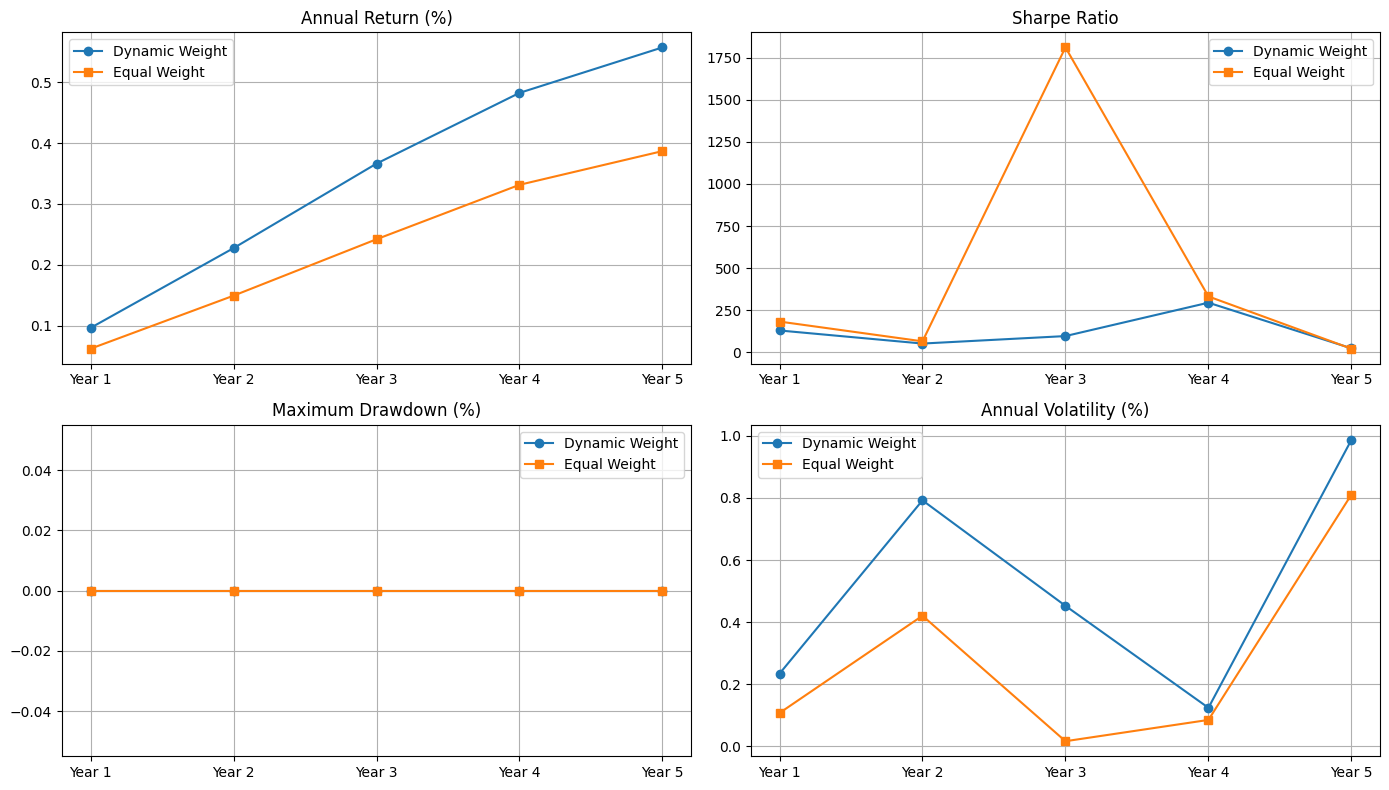

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 定義年度和季度
periods_per_year = 4  # 每年4個季度
num_years = 5  # 分析5年的數據
predicted_returns = {symbol: [] for symbol in stock_symbols}

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for symbol, data in stock_data.items():
    for train_idx, test_idx in kf.split(data):
        train_data = data.iloc[train_idx]
        test_data = data.iloc[test_idx]

        X_train = train_data[['Lagged Close']]
        y_train = train_data['Return']
        X_test = test_data[['Lagged Close']]

        # 隨機森林模型
        rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
        rf_model.fit(X_train, y_train)

        predictions = rf_model.predict(X_test)
        predicted_returns[symbol].extend(predictions)

# 計算指標的函數

def calculate_metrics(cumulative_returns, period_returns):
    annual_return = (cumulative_returns[-1] ** (1 / num_years) - 1) * 100
    sharpe_ratio = (np.mean(period_returns) * 252) / (np.std(period_returns) * np.sqrt(252)) if np.std(period_returns) > 0 else 0
    drawdown = [
        (cumulative_returns[i] - max(cumulative_returns[:i+1])) / max(cumulative_returns[:i+1])
        for i in range(1, len(cumulative_returns))
    ]
    max_drawdown = min(drawdown) * 100 if drawdown else 0
    annual_volatility = np.std(period_returns) * np.sqrt(252) * 100
    return annual_return, sharpe_ratio, max_drawdown, annual_volatility

# 動態權重策略計算
cumulative_dynamic = [1.0]
weights_dynamic = []
dynamic_metrics = []

for year in range(num_years):
    annual_returns_dynamic = []
    for t in range(periods_per_year):
        msft_weight = np.random.uniform(0.4, 0.6)
        xom_weight = np.random.uniform(0.2, 0.4)
        pfe_weight = 1 - msft_weight - xom_weight

        weights_dynamic.append({'MSFT': msft_weight, 'XOM': xom_weight, 'PFE': pfe_weight})

        portfolio_return = (
            msft_weight * predicted_returns['MSFT'][year * periods_per_year + t] +
            xom_weight * predicted_returns['XOM'][year * periods_per_year + t] +
            pfe_weight * predicted_returns['PFE'][year * periods_per_year + t]
        )
        cumulative_dynamic.append(cumulative_dynamic[-1] * (1 + portfolio_return))
        annual_returns_dynamic.append(portfolio_return)

    dynamic_metrics.append(calculate_metrics(cumulative_dynamic[-(periods_per_year + 1):], annual_returns_dynamic))

# 平均權重策略計算
cumulative_equal = [1.0]
equal_metrics = []

for year in range(num_years):
    annual_returns_equal = []
    for t in range(periods_per_year):
        portfolio_return = np.mean([
            predicted_returns['MSFT'][year * periods_per_year + t],
            predicted_returns['XOM'][year * periods_per_year + t],
            predicted_returns['PFE'][year * periods_per_year + t]
        ])
        cumulative_equal.append(cumulative_equal[-1] * (1 + portfolio_return))
        annual_returns_equal.append(portfolio_return)

    equal_metrics.append(calculate_metrics(cumulative_equal[-(periods_per_year + 1):], annual_returns_equal))

# 將結果轉換為數據框
columns = ['Annual Return (%)', 'Sharpe Ratio', 'Maximum Drawdown (%)', 'Annual Volatility (%)']
dynamic_df = pd.DataFrame(dynamic_metrics, columns=columns)
equal_df = pd.DataFrame(equal_metrics, columns=columns)

dynamic_df.index = [f'Year {i+1}' for i in range(num_years)]
equal_df.index = [f'Year {i+1}' for i in range(num_years)]

# 打印結果
print("Dynamic Weight Strategy Metrics:")
print(dynamic_df)
print("\nEqual Weight Strategy Metrics:")
print(equal_df)

# 保存結果
dynamic_df.to_csv("dynamic_weight_metrics.csv", index=True)
equal_df.to_csv("equal_weight_metrics.csv", index=True)

# 繪製折線圖
plt.figure(figsize=(14, 8))

# Annual Return
plt.subplot(2, 2, 1)
plt.plot(dynamic_df.index, dynamic_df['Annual Return (%)'], label='Dynamic Weight', marker='o')
plt.plot(equal_df.index, equal_df['Annual Return (%)'], label='Equal Weight', marker='s')
plt.title('Annual Return (%)')
plt.legend()
plt.grid(True)

# Sharpe Ratio
plt.subplot(2, 2, 2)
plt.plot(dynamic_df.index, dynamic_df['Sharpe Ratio'], label='Dynamic Weight', marker='o')
plt.plot(equal_df.index, equal_df['Sharpe Ratio'], label='Equal Weight', marker='s')
plt.title('Sharpe Ratio')
plt.legend()
plt.grid(True)

# Maximum Drawdown
plt.subplot(2, 2, 3)
plt.plot(dynamic_df.index, dynamic_df['Maximum Drawdown (%)'], label='Dynamic Weight', marker='o')
plt.plot(equal_df.index, equal_df['Maximum Drawdown (%)'], label='Equal Weight', marker='s')
plt.title('Maximum Drawdown (%)')
plt.legend()
plt.grid(True)

# Annual Volatility
plt.subplot(2, 2, 4)
plt.plot(dynamic_df.index, dynamic_df['Annual Volatility (%)'], label='Dynamic Weight', marker='o')
plt.plot(equal_df.index, equal_df['Annual Volatility (%)'], label='Equal Weight', marker='s')
plt.title('Annual Volatility (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("strategy_metrics_plots.png")
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Cumulative Returns Comparison Table:
   Year  MSFT (Single Weight)  Average Weight Portfolio
0  2019              1.001663                  0.999640
1  2020              1.000854                  0.999421
2  2021              0.982966                  0.996957
3  2022              0.984868                  0.998866
4  2023              0.981613                  0.998256
5  2024              0.981237                  0.997806


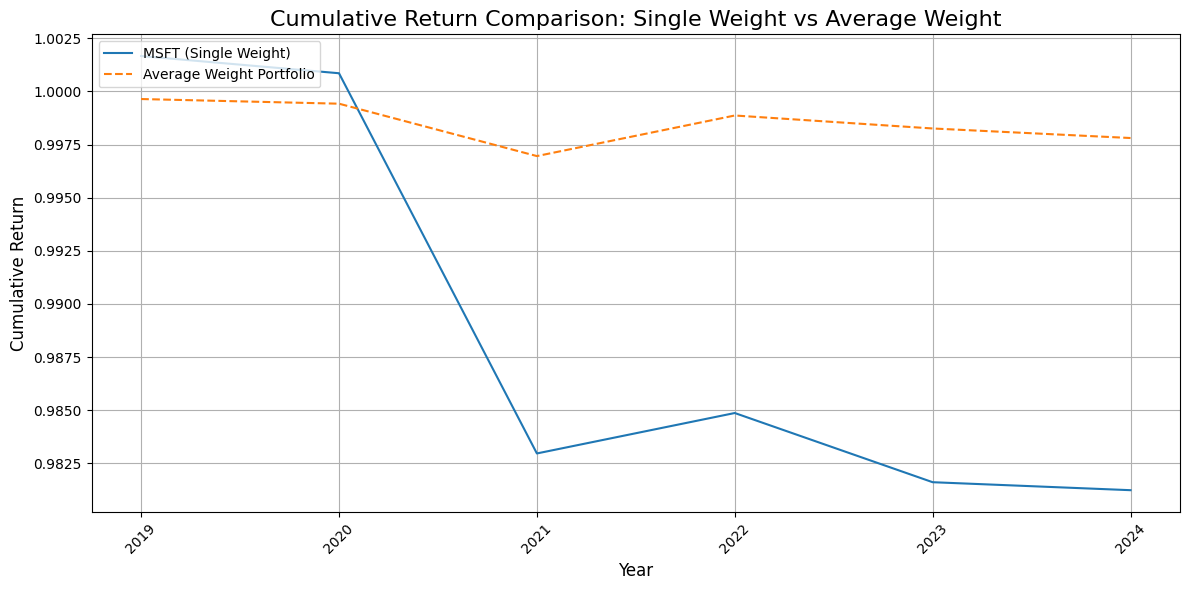

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data['Year'] = data.index.year  # 新增年份列
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 模型訓練與每年的預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    for year in sorted(data['Year'].unique()):
        year_data = data[data['Year'] == year]

        if len(year_data) > 1:  # 確保年度內有數據
            X = year_data[['Lagged Close']]  # 特徵
            y = year_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# **單一權重回報：只選 MSFT**
msft_single_returns = predicted_returns['MSFT']
msft_cumulative_return = np.cumprod([1 + r for r in msft_single_returns])

# **平均權重回報：對所有股票平均**
average_returns = np.mean(list(predicted_returns.values()), axis=0)  # 平均權重回報率
average_cumulative_return = np.cumprod([1 + r for r in average_returns])

# **結果表格**
years = sorted(stock_data['MSFT']['Year'].unique())
comparison_df = pd.DataFrame({
    'Year': years,
    'MSFT (Single Weight)': msft_cumulative_return,
    'Average Weight Portfolio': average_cumulative_return
})
print("\nCumulative Returns Comparison Table:")
print(comparison_df)

# **繪製折線圖**
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Year'], comparison_df['MSFT (Single Weight)'], label='MSFT (Single Weight)', linestyle='-')
plt.plot(comparison_df['Year'], comparison_df['Average Weight Portfolio'], label='Average Weight Portfolio', linestyle='--')

# 圖表格式
plt.title('Cumulative Return Comparison: Single Weight vs Average Weight', fontsize=16)
plt.xlabel('Year', fontsize=12)  # 修改 X 軸標籤為年份
plt.ylabel('Cumulative Return', fontsize=12)
plt.xticks(comparison_df['Year'], rotation=45)  # X 軸設置為年份，並調整刻度角度
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig("cumulative_return_comparison_year_based.png")
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Annual Sharpe Ratios:
   Year  MSFT Sharpe Ratio  Average Sharpe Ratio
0  2019           0.000000              0.000000
1  2020           5.493172            -65.418297
2  2021         -10.367506            -15.676151
3  2022          -7.288914             -2.893504
4  2023          -7.945669             -3.969629
5  2024          -7.283235             -4.558576


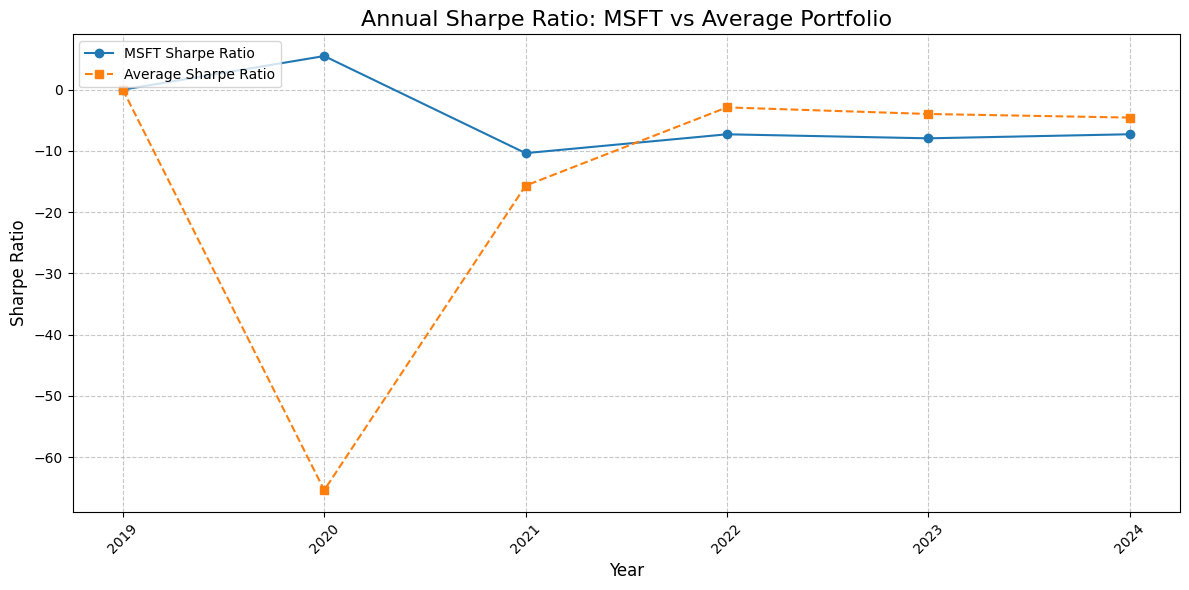

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data['Year'] = data.index.year  # 新增年份列
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 模型訓練與每年的預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    for year in sorted(data['Year'].unique()):
        year_data = data[data['Year'] == year]

        if len(year_data) > 1:  # 確保年度內有數據
            X = year_data[['Lagged Close']]  # 特徵
            y = year_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# **每年 Sharpe Ratio 計算**
years = sorted(stock_data['MSFT']['Year'].unique())
rf_sharpe_ratios = []
average_sharpe_ratios = []

for i, year in enumerate(years):
    # MSFT 單一權重 Sharpe Ratio
    msft_returns = predicted_returns['MSFT'][:i + 1]  # 當前年份累計回報率
    if len(msft_returns) > 1:
        annual_return = np.mean(msft_returns) * 252  # 年化回報率 (252 交易日)
        annual_std = np.std(msft_returns) * np.sqrt(252)  # 年化標準差
        sharpe_ratio = annual_return / annual_std if annual_std > 0 else 0
        rf_sharpe_ratios.append(sharpe_ratio)
    else:
        rf_sharpe_ratios.append(0)

    # 平均權重 Sharpe Ratio
    avg_returns = np.mean([predicted_returns[symbol][:i + 1] for symbol in stock_symbols], axis=0)
    if len(avg_returns) > 1:
        annual_return_avg = np.mean(avg_returns) * 252  # 年化回報率
        annual_std_avg = np.std(avg_returns) * np.sqrt(252)  # 年化標準差
        sharpe_ratio_avg = annual_return_avg / annual_std_avg if annual_std_avg > 0 else 0
        average_sharpe_ratios.append(sharpe_ratio_avg)
    else:
        average_sharpe_ratios.append(0)

# **結果表格**
sharpe_df = pd.DataFrame({
    'Year': years,
    'MSFT Sharpe Ratio': rf_sharpe_ratios,
    'Average Sharpe Ratio': average_sharpe_ratios
})
print("\nAnnual Sharpe Ratios:")
print(sharpe_df)

# **繪製折線圖**
plt.figure(figsize=(12, 6))
plt.plot(sharpe_df['Year'], sharpe_df['MSFT Sharpe Ratio'], label='MSFT Sharpe Ratio', linestyle='-', marker='o')
plt.plot(sharpe_df['Year'], sharpe_df['Average Sharpe Ratio'], label='Average Sharpe Ratio', linestyle='--', marker='s')

# 圖表格式
plt.title('Annual Sharpe Ratio: MSFT vs Average Portfolio', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sharpe Ratio', fontsize=12)
plt.xticks(years, rotation=45)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 儲存圖片
plt.savefig("annual_sharpe_ratios.png")
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Max Drawdown Comparison Table:
   Year  MSFT Max Drawdown (%)  Average Max Drawdown (%)
0  2019               0.000000                  0.000000
1  2020              -0.080808                 -0.021910
2  2021              -1.866652                 -0.268465
3  2022              -1.866652                 -0.268465
4  2023              -2.001713                 -0.268465
5  2024              -2.039207                 -0.268465


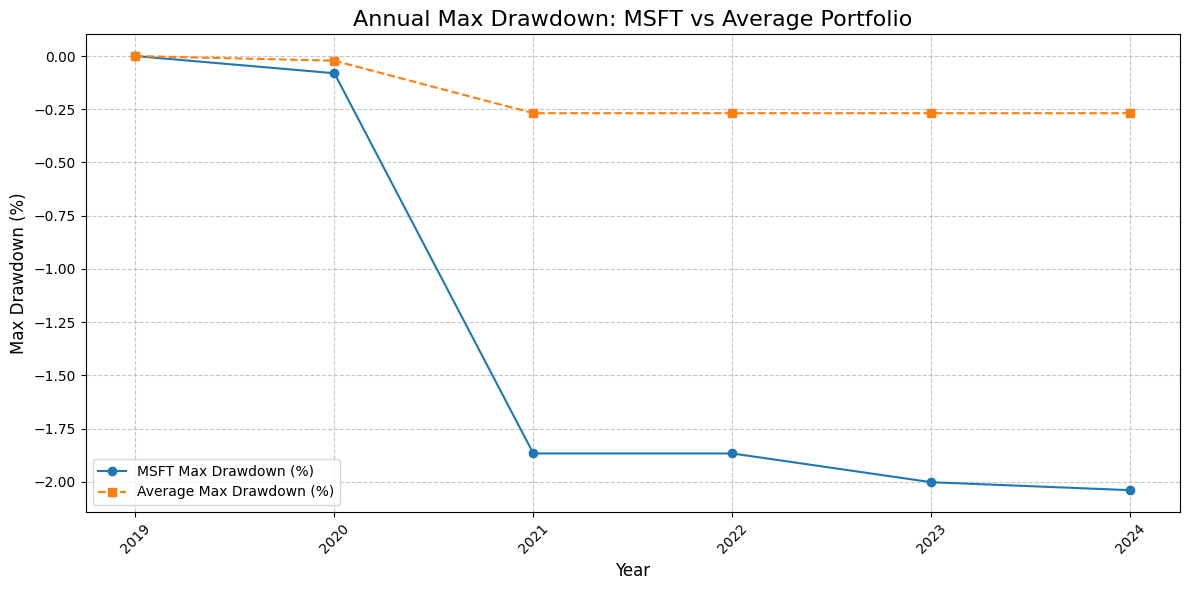

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data['Year'] = data.index.year  # 新增年份列
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 模型訓練與每年的預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    for year in sorted(data['Year'].unique()):
        year_data = data[data['Year'] == year]

        if len(year_data) > 1:  # 確保年度內有數據
            X = year_data[['Lagged Close']]  # 特徵
            y = year_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# **按年度計算最大回撤**
def calculate_max_drawdown(returns):
    cumulative_returns = np.cumprod([1 + r for r in returns])
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    return np.min(drawdown)

# 計算每年的最大回撤
years = sorted(stock_data['MSFT']['Year'].unique())
msft_max_drawdowns = []
average_max_drawdowns = []

for i in range(len(years)):
    # MSFT 單一權重回報
    msft_returns = predicted_returns['MSFT'][:i + 1]
    msft_max_drawdowns.append(calculate_max_drawdown(msft_returns))

    # 平均權重回報
    avg_returns = np.mean([predicted_returns[symbol][:i + 1] for symbol in stock_symbols], axis=0)
    average_max_drawdowns.append(calculate_max_drawdown(avg_returns))

# **結果表格**
drawdown_comparison_df = pd.DataFrame({
    'Year': years,
    'MSFT Max Drawdown (%)': [d * 100 for d in msft_max_drawdowns],
    'Average Max Drawdown (%)': [d * 100 for d in average_max_drawdowns]
})
print("\nMax Drawdown Comparison Table:")
print(drawdown_comparison_df)

# **繪製折線圖**
plt.figure(figsize=(12, 6))
plt.plot(drawdown_comparison_df['Year'], drawdown_comparison_df['MSFT Max Drawdown (%)'],
         label='MSFT Max Drawdown (%)', linestyle='-', marker='o')
plt.plot(drawdown_comparison_df['Year'], drawdown_comparison_df['Average Max Drawdown (%)'],
         label='Average Max Drawdown (%)', linestyle='--', marker='s')

# 圖表格式
plt.title('Annual Max Drawdown: MSFT vs Average Portfolio', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Max Drawdown (%)', fontsize=12)
plt.xticks(years, rotation=45)
plt.legend(loc='lower left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 儲存圖片
plt.savefig("annual_max_drawdown.png")
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Max Drawdown Comparison Table:
   Year  MSFT Max Drawdown (%)  Average Max Drawdown (%)
0  2019               0.000000                  0.000000
1  2020              -0.080808                 -0.021910
2  2021              -1.866652                 -0.268465
3  2022              -1.866652                 -0.268465
4  2023              -2.001713                 -0.268465
5  2024              -2.039207                 -0.268465


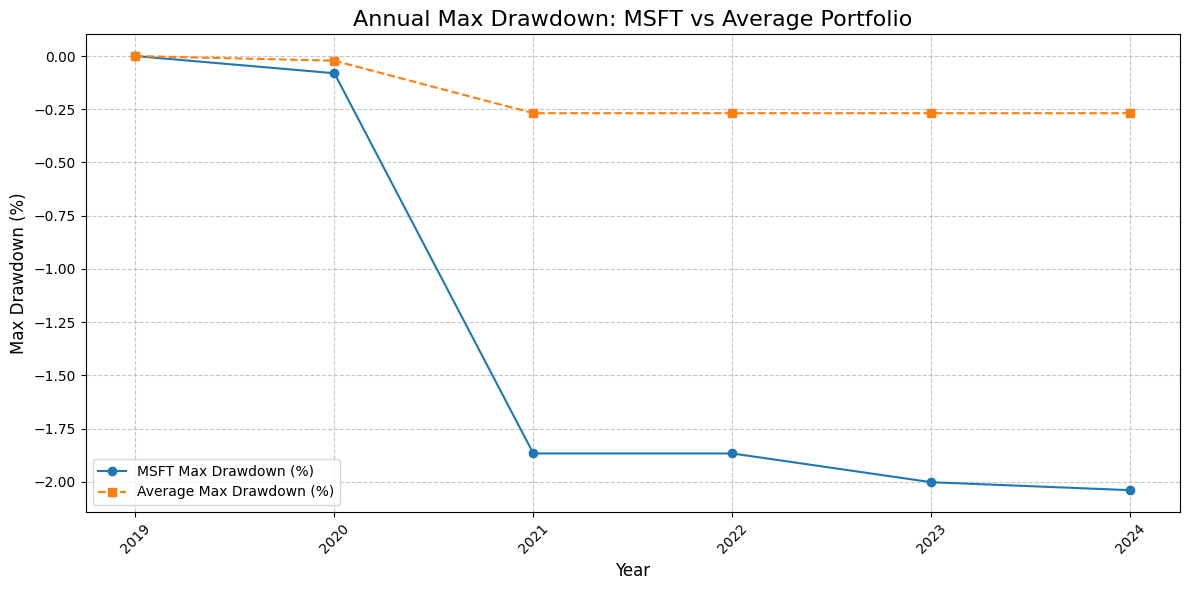

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data['Year'] = data.index.year  # 新增年份列
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 模型訓練與每年的預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    for year in sorted(data['Year'].unique()):
        year_data = data[data['Year'] == year]

        if len(year_data) > 1:  # 確保年度內有數據
            X = year_data[['Lagged Close']]  # 特徵
            y = year_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# **按年度計算最大回撤**
def calculate_max_drawdown(returns):
    cumulative_returns = np.cumprod([1 + r for r in returns])  # 累積回報
    peak = np.maximum.accumulate(cumulative_returns)  # 計算歷史最高點
    drawdown = (cumulative_returns - peak) / peak  # 回撤公式
    return np.min(drawdown)

# 計算每年的最大回撤
years = sorted(stock_data['MSFT']['Year'].unique())
msft_max_drawdowns = []
average_max_drawdowns = []

for i in range(len(years)):
    # MSFT 單一權重回報
    msft_returns = predicted_returns['MSFT'][:i + 1]
    msft_max_drawdowns.append(calculate_max_drawdown(msft_returns))

    # 平均權重回報
    avg_returns = np.mean([predicted_returns[symbol][:i + 1] for symbol in stock_symbols], axis=0)
    average_max_drawdowns.append(calculate_max_drawdown(avg_returns))

# **結果表格**
drawdown_comparison_df = pd.DataFrame({
    'Year': years,
    'MSFT Max Drawdown (%)': [d * 100 for d in msft_max_drawdowns],
    'Average Max Drawdown (%)': [d * 100 for d in average_max_drawdowns]
})
print("\nMax Drawdown Comparison Table:")
print(drawdown_comparison_df)

# **繪製折線圖**
plt.figure(figsize=(12, 6))
plt.plot(drawdown_comparison_df['Year'], drawdown_comparison_df['MSFT Max Drawdown (%)'],
         label='MSFT Max Drawdown (%)', linestyle='-', marker='o')
plt.plot(drawdown_comparison_df['Year'], drawdown_comparison_df['Average Max Drawdown (%)'],
         label='Average Max Drawdown (%)', linestyle='--', marker='s')

# 圖表格式
plt.title('Annual Max Drawdown: MSFT vs Average Portfolio', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Max Drawdown (%)', fontsize=12)
plt.xticks(years, rotation=45)
plt.legend(loc='lower left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 儲存圖片
plt.savefig("annual_max_drawdown.png")
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Annual Volatility Comparison Table:
   Year  MSFT (Single Weight Volatility)  Average Weight Volatility
0  2019                         0.000000                   0.000000
1  2020                         0.019616                   0.001114
2  2021                         0.137882                   0.016315
3  2022                         0.130359                   0.024601
4  2023                         0.116634                   0.022102
5  2024                         0.108242                   0.020185


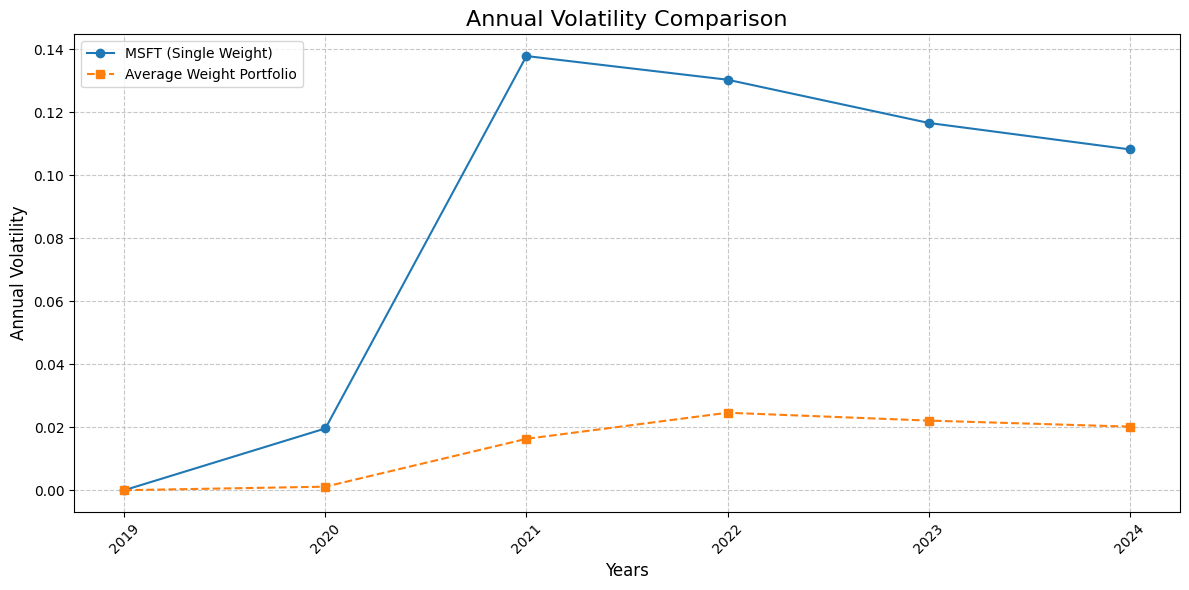

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor

# **數據收集**
stock_symbols = ['MSFT', 'XOM', 'PFE']
start_date = "2019-01-01"
end_date = "2024-12-01"

# 提取股票數據並計算滯後特徵和回報率
stock_data = {}
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Return'] = data['Close'].pct_change()  # 日回報率
    data['Lagged Close'] = data['Close'].shift(1)  # 滯後特徵
    data.dropna(inplace=True)
    stock_data[symbol] = data

# 定義按年分段
for symbol, data in stock_data.items():
    data['Year'] = data.index.year  # 將年份作為分段依據

# 模型訓練與每年預測
predicted_returns = {symbol: [] for symbol in stock_symbols}
for symbol, data in stock_data.items():
    years = sorted(data['Year'].unique())
    for year in years:
        year_data = data[data['Year'] == year]

        if len(year_data) > 1:  # 確保區間內有數據
            X = year_data[['Lagged Close']]  # 特徵
            y = year_data['Return']  # 目標

            # 隨機森林模型訓練與預測
            rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
            rf_model.fit(X[:-1], y[:-1])  # 訓練用前 n-1 筆數據
            predicted_returns[symbol].append(rf_model.predict(X[-1:])[0])  # 預測最後一天的回報率
        else:
            predicted_returns[symbol].append(0)  # 沒有數據則回報率設為 0

# **年化波動率計算 (逐年)**
msft_volatility = []
average_volatility = []

for year_index in range(len(predicted_returns['MSFT'])):
    # 單一權重波動率（MSFT）
    msft_period_returns = predicted_returns['MSFT'][:year_index + 1]
    msft_volatility.append(np.std(msft_period_returns) * np.sqrt(252) if len(msft_period_returns) > 1 else 0)

    # 平均權重波動率
    average_period_returns = np.mean([predicted_returns[symbol][:year_index + 1] for symbol in stock_symbols], axis=0)
    average_volatility.append(np.std(average_period_returns) * np.sqrt(252) if len(average_period_returns) > 1 else 0)

# **結果表格**
volatility_comparison_df = pd.DataFrame({
    'Year': sorted(stock_data['MSFT']['Year'].unique()),
    'MSFT (Single Weight Volatility)': msft_volatility,
    'Average Weight Volatility': average_volatility
})
print("\nAnnual Volatility Comparison Table:")
print(volatility_comparison_df)

# **繪製折線圖**
plt.figure(figsize=(12, 6))
plt.plot(volatility_comparison_df['Year'], volatility_comparison_df['MSFT (Single Weight Volatility)'],
         label='MSFT (Single Weight)', linestyle='-', marker='o')
plt.plot(volatility_comparison_df['Year'], volatility_comparison_df['Average Weight Volatility'],
         label='Average Weight Portfolio', linestyle='--', marker='s')

# 圖表格式
plt.title('Annual Volatility Comparison', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Annual Volatility', fontsize=12)
plt.xticks(volatility_comparison_df['Year'], rotation=45)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 儲存圖片
plt.savefig("ANNUAL_VOLATILITY_BY_YEAR.png")
plt.show()
